In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

In [2]:
df=pd.read_csv('car_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<b> dropping car name so that we can get a generalized model.

In [8]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [9]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
todays_date=date.today()
todays_date
todays_date.year

2021

In [11]:
final_dataset['Current_Year']=todays_date.year

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [13]:
final_dataset['no_year']=final_dataset['Current_Year']- final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [15]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [17]:
final_dataset=pd.get_dummies(final_dataset,drop_first=False)

Fuel_Type_Diesel

Seller_Type_Individual

Transmission_Automatic 

The above 3 attributes are droped as these attributes can be interpreted based on other attributes.

In [18]:
final_dataset.drop(columns = ['Seller_Type_Individual', 'Fuel_Type_Diesel', 'Transmission_Automatic'], inplace = True)

In [19]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,no_year,Fuel_Type_CNG,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,1,1
1,4.75,9.54,43000,0,2021,8,0,0,1,1
2,7.25,9.85,6900,0,2021,4,0,1,1,1
3,2.85,4.15,5200,0,2021,10,0,1,1,1
4,4.60,6.87,42450,0,2021,7,0,0,1,1


In [20]:
final_dataset=final_dataset.drop(['Current_Year'],axis=1)

In [21]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,1,1
1,4.75,9.54,43000,0,8,0,0,1,1
2,7.25,9.85,6900,0,4,0,1,1,1
3,2.85,4.15,5200,0,10,0,1,1,1
4,4.60,6.87,42450,0,7,0,0,1,1


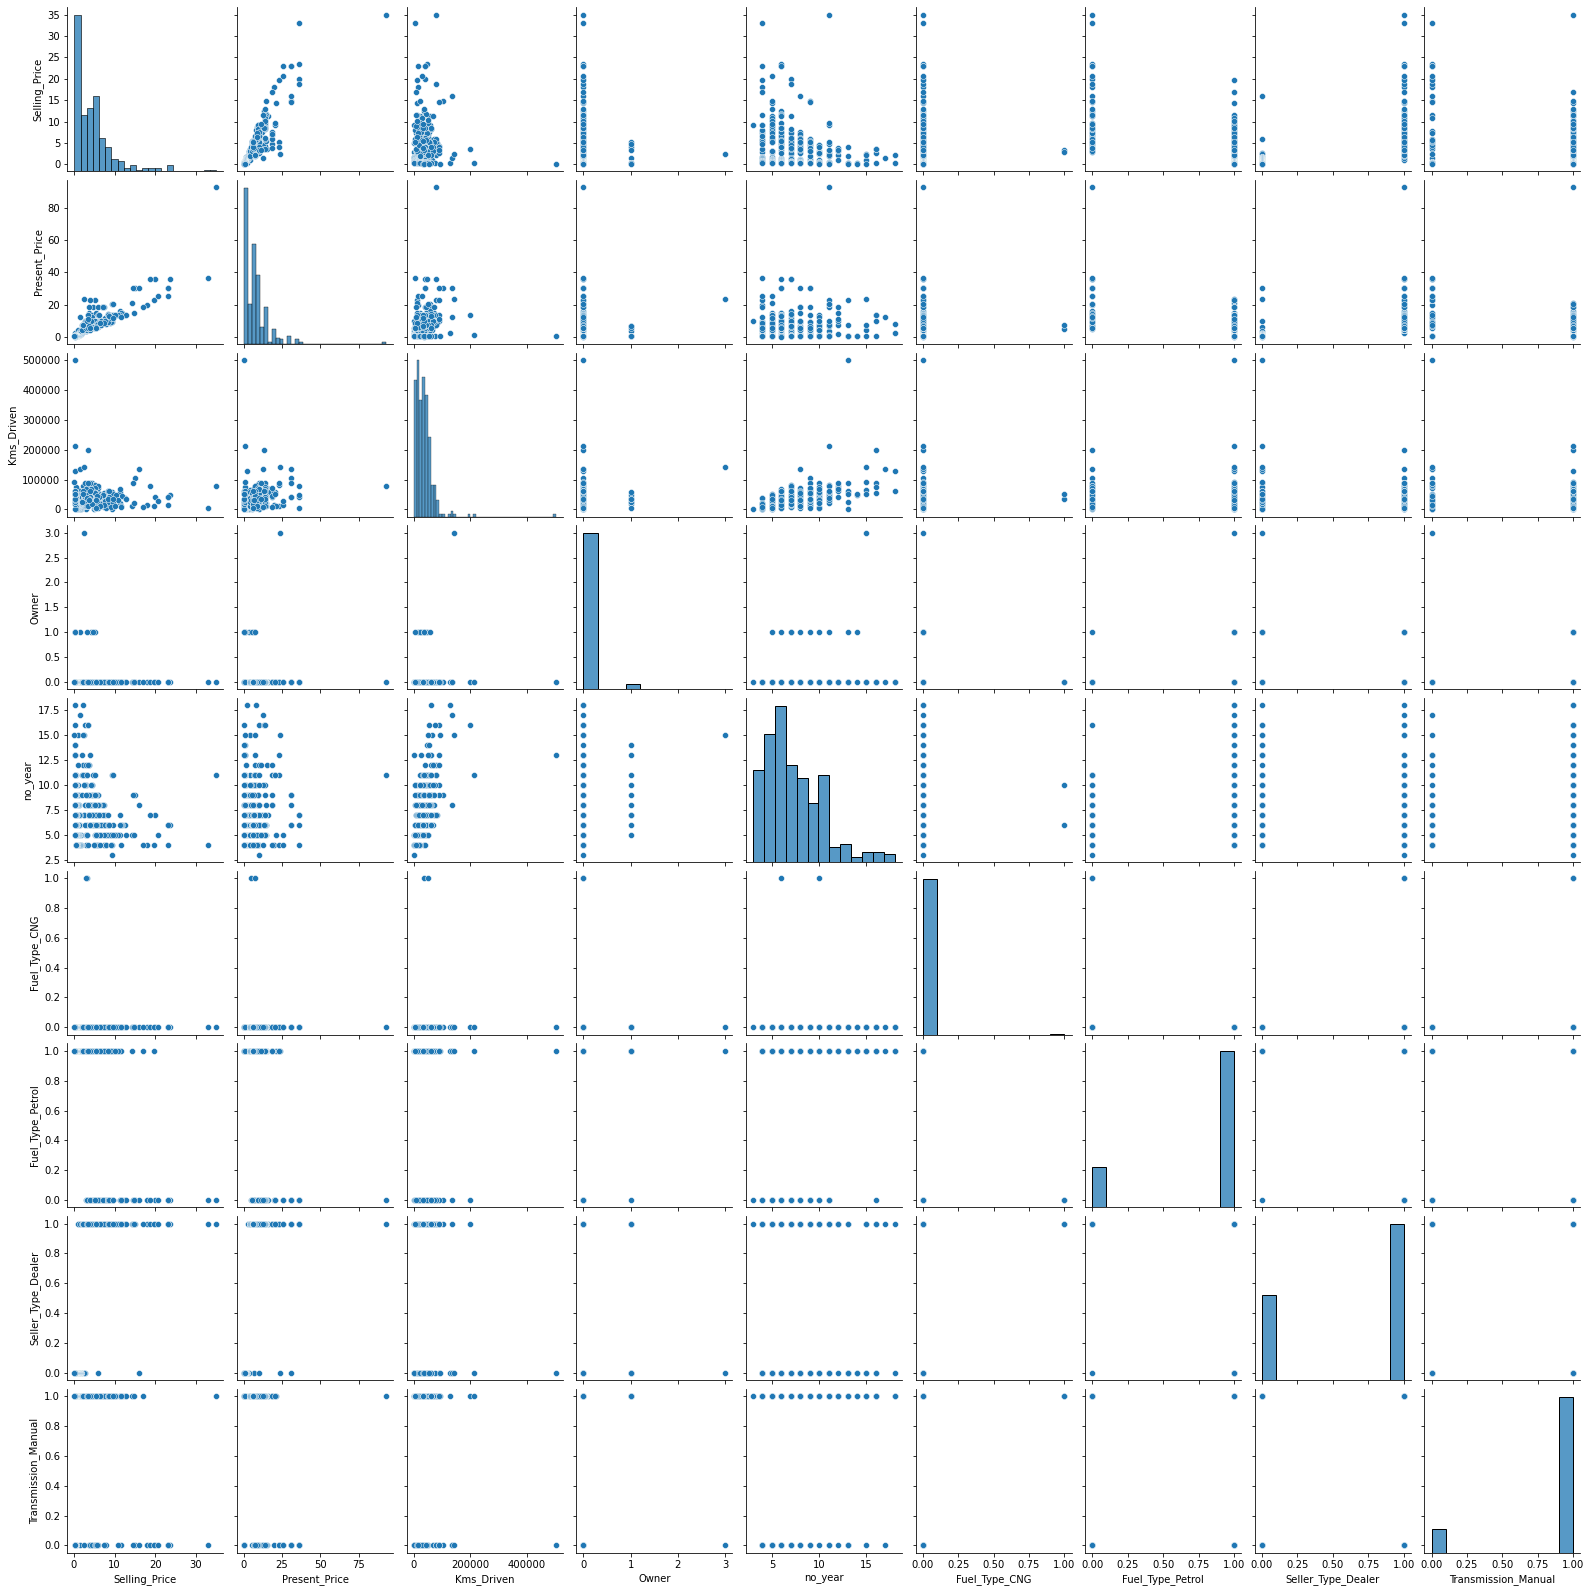

In [22]:
sns.pairplot(final_dataset)

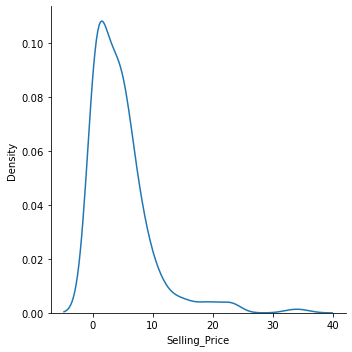

In [23]:
sns.displot(final_dataset['Selling_Price'], kind="kde")

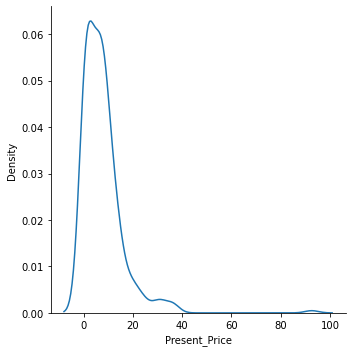

In [24]:
sns.displot(final_dataset['Present_Price'], kind="kde")

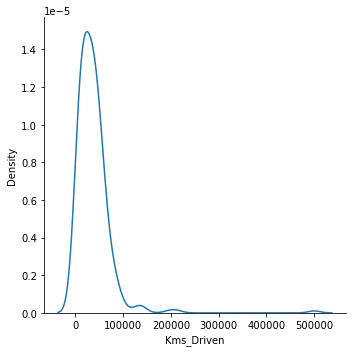

In [25]:
sns.displot(final_dataset['Kms_Driven'], kind="kde")

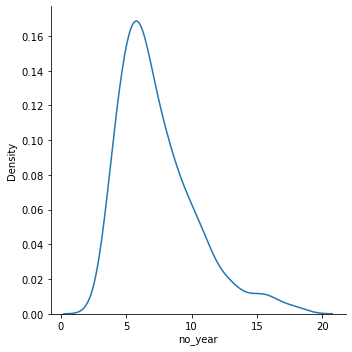

In [26]:
sns.displot(final_dataset['no_year'], kind="kde")

In [27]:
final_dataset.skew()

Selling_Price           2.493422
Present_Price           4.083150
Kms_Driven              6.436013
Owner                   7.616850
no_year                 1.246189
Fuel_Type_CNG          12.206146
Fuel_Type_Petrol       -1.461340
Seller_Type_Dealer     -0.622146
Transmission_Manual    -2.173776
dtype: float64

### Applying Transformation

log transformation on Selling_Price is transforming some values to negative values.

cbrt transformation works well for Selling_Price

cbrt transformation works well for Present_Price

cbrt transformation works well for Kms_Driven

In [28]:
#performing the log transformation using numpy

cbrt_Selling_Price = np.cbrt(final_dataset['Selling_Price'])
cbrt_Present_Price = np.cbrt(final_dataset['Present_Price'])
cbrt_Kms_Driven = np.cbrt(final_dataset['Kms_Driven'])

In [29]:
print(cbrt_Selling_Price.skew())
print(cbrt_Present_Price.skew())
print(cbrt_Kms_Driven.skew())

0.291219310671248
0.3364671896297539
0.35484395414639175


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

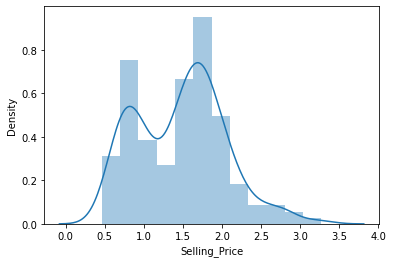

In [30]:
sns.distplot(cbrt_Selling_Price)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

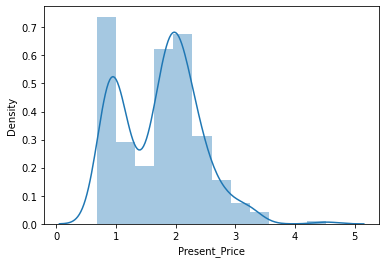

In [31]:
sns.distplot(cbrt_Present_Price)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Kms_Driven', ylabel='Density'>

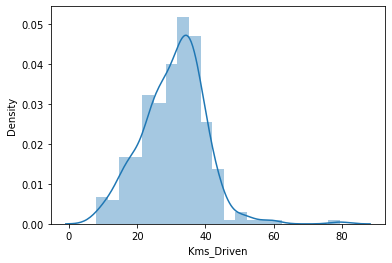

In [32]:
sns.distplot(cbrt_Kms_Driven)

In [33]:
final_dataset["T_Selling_Price"] = cbrt_Selling_Price
final_dataset["T_Present_Price"] = cbrt_Present_Price
final_dataset["T_Kms_Driven"] = cbrt_Kms_Driven

In [34]:
final_dataset.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Petrol,Seller_Type_Dealer,Transmission_Manual,T_Selling_Price,T_Present_Price,T_Kms_Driven
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,7.372093,0.006645,0.794020,0.647841,0.867110,1.472122,1.742398,30.691813
std,5.082812,8.644115,38886.883882,0.247915,2.891554,0.081378,0.405089,0.478439,0.340021,0.567634,0.656361,9.197168
min,0.100000,0.320000,500.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.464159,0.683990,7.937005
25%,0.900000,1.200000,15000.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.965489,1.062659,24.662121
50%,3.600000,6.400000,32000.000000,0.000000,7.000000,0.000000,1.000000,1.000000,1.000000,1.532619,1.856636,31.748021
75%,6.000000,9.900000,48767.000000,0.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.817121,2.147229,36.534964
max,35.000000,92.600000,500000.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,3.271066,4.524150,79.370053


### Applying scalling

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

df_scalling = final_dataset[["T_Present_Price", "T_Kms_Driven", "no_year"]]

scaled_df = scaler.fit_transform(df_scalling)
scaled_df

array([[0.28404027, 0.30886257, 0.26666667],
       [0.37417449, 0.37933388, 0.33333333],
       [0.38009301, 0.15540115, 0.06666667],
       [0.24035725, 0.13142064, 0.46666667],
       [0.31692036, 0.37723386, 0.26666667],
       [0.37971495, 0.0673297 , 0.        ],
       [0.34528774, 0.26109997, 0.2       ],
       [0.35561101, 0.33985297, 0.2       ],
       [0.36133505, 0.27060471, 0.13333333],
       [0.36194117, 0.37691538, 0.2       ],
       [0.22098782, 0.0691492 , 0.06666667],
       [0.38993048, 0.40803653, 0.2       ],
       [0.38178798, 0.23413695, 0.2       ],
       [0.33632584, 0.30361235, 0.2       ],
       [0.32495575, 0.48555536, 0.6       ],
       [0.39731319, 0.37933388, 0.13333333],
       [0.39731319, 0.37425537, 0.2       ],
       [0.39731319, 0.37933388, 0.13333333],
       [0.26982849, 0.34897975, 0.2       ],
       [0.34226222, 0.37333751, 0.53333333],
       [0.23352382, 0.29822572, 0.13333333],
       [0.2873239 , 0.07631837, 0.06666667],
       [0.

In [37]:
pp = []
kd = []
ny = []
for i in range(len(scaled_df)):
    #sp.append(scaled_df[i][0])
    pp.append(scaled_df[i][0])
    kd.append(scaled_df[i][1])
    ny.append(scaled_df[i][2])

In [38]:
#final_dataset["S_Selling_Price"] = sp
final_dataset["S_Present_Price"] = pp
final_dataset["S_Kms_Driven"] = kd
final_dataset["S_no_year"] = ny

ST_data = final_dataset[["T_Selling_Price", "S_Present_Price", "S_Kms_Driven","Owner", "S_no_year", "Fuel_Type_CNG", "Fuel_Type_Petrol", "Transmission_Manual"]]

### DataFrame after Transformation and scalling

In [39]:
ST_data

,T_Selling_Price,S_Present_Price,S_Kms_Driven,Owner,S_no_year,Fuel_Type_CNG,Fuel_Type_Petrol,Transmission_Manual
0,1.496287,0.284040,0.308863,0,0.266667,0,1,1
1,1.680988,0.374174,0.379334,0,0.333333,0,0,1
2,1.935438,0.380093,0.155401,0,0.066667,0,1,1
3,1.417800,0.240357,0.131421,0,0.466667,0,1,1
4,1.663103,0.316920,0.377234,0,0.266667,0,0,1
...,...,...,...,...,...,...,...,...
296,2.117912,0.411366,0.342353,0,0.133333,0,0,1
297,1.587401,0.292430,0.436936,0,0.200000,0,1,1
298,1.496287,0.401022,0.511409,0,0.600000,0,1,1
299,2.257179,0.426233,0.180082,0,0.066667,0,0,1


In [40]:
ST_data.corr()

,T_Selling_Price,S_Present_Price,S_Kms_Driven,Owner,S_no_year,Fuel_Type_CNG,Fuel_Type_Petrol,Transmission_Manual
T_Selling_Price,1.000000,0.934895,0.139736,-0.107640,-0.268790,-0.002079,-0.528231,-0.252426
S_Present_Price,0.934895,1.000000,0.348294,-0.013898,0.015640,0.013322,-0.490564,-0.272742
S_Kms_Driven,0.139736,0.348294,1.000000,0.089036,0.600478,0.037063,-0.270588,-0.073169
Owner,-0.107640,-0.013898,0.089036,1.000000,0.182104,-0.014272,0.055687,-0.050316
S_no_year,-0.268790,0.015640,0.600478,0.182104,1.000000,0.017790,0.059959,-0.000394
Fuel_Type_CNG,-0.002079,0.013322,0.037063,-0.014272,0.017790,1.000000,-0.160577,0.032018
Fuel_Type_Petrol,-0.528231,-0.490564,-0.270588,0.055687,0.059959,-0.160577,1.000000,0.091013
Transmission_Manual,-0.252426,-0.272742,-0.073169,-0.050316,-0.000394,0.032018,0.091013,1.000000


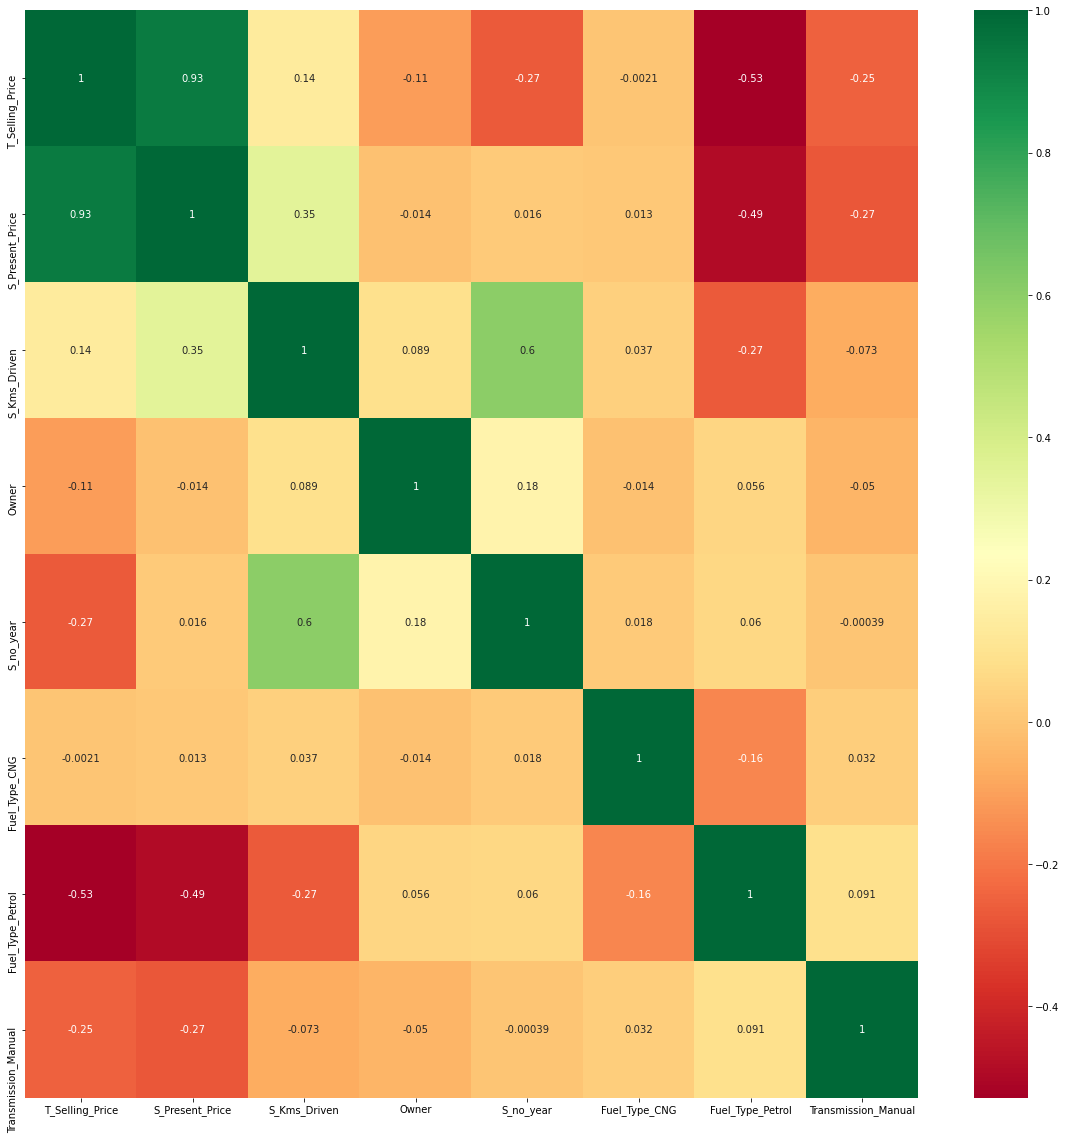

In [41]:
import seaborn as sns

plt.figure(figsize=(20,20))

g=sns.heatmap(ST_data.corr(),annot=True,cmap="RdYlGn")

In [42]:
X=ST_data.iloc[:,1:]
y=ST_data.iloc[:,0]

In [43]:
X['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [44]:
X.head()

,S_Present_Price,S_Kms_Driven,Owner,S_no_year,Fuel_Type_CNG,Fuel_Type_Petrol,Transmission_Manual
0,0.284040,0.308863,0,0.266667,0,1,1
1,0.374174,0.379334,0,0.333333,0,0,1
2,0.380093,0.155401,0,0.066667,0,1,1
3,0.240357,0.131421,0,0.466667,0,1,1
4,0.316920,0.377234,0,0.266667,0,0,1


In [47]:
y.head()

0    1.496287
1    1.680988
2    1.935438
3    1.417800
4    1.663103
Name: T_Selling_Price, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Using Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
regressor=RandomForestRegressor()

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [53]:
 #Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


In [54]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [55]:
rf = RandomForestRegressor()

In [56]:
# Use the random grid to search for best hyperparameters
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [57]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [59]:
rf.best_score_

-0.02049729694993619

In [60]:
predictions=rf.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T_Selling_Price', ylabel='Density'>

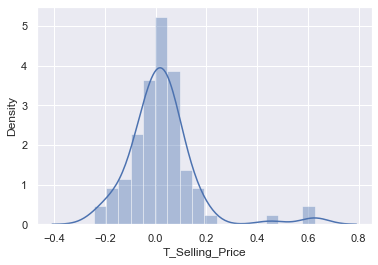

In [61]:
sns.distplot(y_test-predictions)

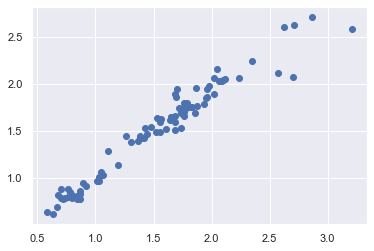

In [62]:
plt.scatter(y_test,predictions)

In [63]:
from sklearn import metrics

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0860047763592242
MSE: 0.01858523585282445
RMSE: 0.13632767823455533


## Using XGBoost Regressor

In [65]:
!pip install xgboost
import xgboost as xgb
from scipy.stats import uniform, randint

In [66]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

In [67]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [68]:
xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [69]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[08:12:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   1.2s
[08:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[08:12:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsamp

[CV] END gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.0s
[08:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.0s
[08:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.0s
[08:12:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020BD144AD60>,
                                        'max_depth': <sci

In [70]:
xgb.best_score_

-0.012907373008615539

In [71]:
xgb.best_params_

{'gamma': 0.0453032172664104,
 'learning_rate': 0.2155158027999262,
 'max_depth': 5,
 'n_estimators': 102,
 'subsample': 0.9439761626945282}

In [72]:
predictions=xgb.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T_Selling_Price', ylabel='Density'>

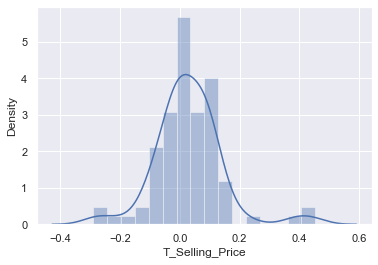

In [73]:
sns.distplot(y_test-predictions)

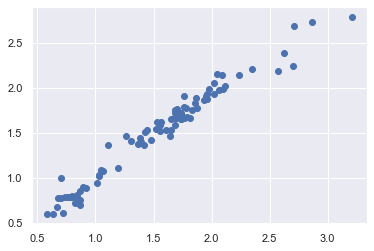

In [74]:
plt.scatter(y_test,predictions)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.07996345233088357
MSE: 0.013534961925223967
RMSE: 0.1163398552742093


## Using Catboost Regresssor

In [102]:
from catboost import CatBoostRegressor

In [103]:
cb=CatBoostRegressor()

In [104]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [105]:
cb = RandomizedSearchCV(estimator = cb, param_distributions = grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [106]:
cb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.5474543	total: 317us	remaining: 317ms
1:	learn: 0.5178553	total: 3.17ms	remaining: 1.58s
2:	learn: 0.4953821	total: 7.98ms	remaining: 2.65s
3:	learn: 0.4725783	total: 13.3ms	remaining: 3.31s
4:	learn: 0.4467124	total: 14.1ms	remaining: 2.8s
5:	learn: 0.4292154	total: 19.6ms	remaining: 3.24s
6:	learn: 0.4131954	total: 20.7ms	remaining: 2.94s
7:	learn: 0.3974896	total: 26.1ms	remaining: 3.24s
8:	learn: 0.3822677	total: 27.6ms	remaining: 3.04s
9:	learn: 0.3637267	total: 28ms	remaining: 2.77s
10:	learn: 0.3452947	total: 28.8ms	remaining: 2.59s
11:	learn: 0.3345838	total: 31.3ms	remaining: 2.58s
12:	learn: 0.3176993	total: 32.2ms	remaining: 2.44s
13:	learn: 0.3042311	total: 34.6ms	remaining: 2.43s
14:	learn: 0.2946805	total: 35.9ms	remaining: 2.35s
15:	learn: 0.2825643	total: 36.8ms	remaining: 2.26s
16:	learn: 0.2704458	total: 37.5ms	remaining: 2.17s
17:	learn: 0.2595396	total: 37.8ms	remaining: 2.06s
18:	learn: 0.2505

163:	learn: 0.0515497	total: 510ms	remaining: 2.6s
164:	learn: 0.0514738	total: 515ms	remaining: 2.61s
165:	learn: 0.0513987	total: 520ms	remaining: 2.61s
166:	learn: 0.0505256	total: 525ms	remaining: 2.62s
167:	learn: 0.0498793	total: 529ms	remaining: 2.62s
168:	learn: 0.0491317	total: 534ms	remaining: 2.63s
169:	learn: 0.0490641	total: 538ms	remaining: 2.63s
170:	learn: 0.0487326	total: 542ms	remaining: 2.63s
171:	learn: 0.0486667	total: 547ms	remaining: 2.63s
172:	learn: 0.0486006	total: 551ms	remaining: 2.63s
173:	learn: 0.0480694	total: 555ms	remaining: 2.64s
174:	learn: 0.0480039	total: 560ms	remaining: 2.64s
175:	learn: 0.0473235	total: 564ms	remaining: 2.64s
176:	learn: 0.0466784	total: 568ms	remaining: 2.64s
177:	learn: 0.0466209	total: 572ms	remaining: 2.64s
178:	learn: 0.0461341	total: 576ms	remaining: 2.64s
179:	learn: 0.0460769	total: 580ms	remaining: 2.64s
180:	learn: 0.0458808	total: 582ms	remaining: 2.63s
181:	learn: 0.0458189	total: 584ms	remaining: 2.63s
182:	learn: 0

339:	learn: 0.0222529	total: 1.23s	remaining: 2.38s
340:	learn: 0.0221926	total: 1.23s	remaining: 2.38s
341:	learn: 0.0219770	total: 1.24s	remaining: 2.38s
342:	learn: 0.0219002	total: 1.24s	remaining: 2.38s
343:	learn: 0.0217180	total: 1.25s	remaining: 2.39s
344:	learn: 0.0217078	total: 1.26s	remaining: 2.39s
345:	learn: 0.0217003	total: 1.27s	remaining: 2.39s
346:	learn: 0.0216439	total: 1.27s	remaining: 2.39s
347:	learn: 0.0216333	total: 1.28s	remaining: 2.4s
348:	learn: 0.0216096	total: 1.29s	remaining: 2.4s
349:	learn: 0.0214747	total: 1.29s	remaining: 2.4s
350:	learn: 0.0214311	total: 1.3s	remaining: 2.4s
351:	learn: 0.0214233	total: 1.3s	remaining: 2.4s
352:	learn: 0.0212624	total: 1.31s	remaining: 2.4s
353:	learn: 0.0211877	total: 1.32s	remaining: 2.4s
354:	learn: 0.0210226	total: 1.32s	remaining: 2.4s
355:	learn: 0.0209276	total: 1.33s	remaining: 2.4s
356:	learn: 0.0208056	total: 1.33s	remaining: 2.4s
357:	learn: 0.0206785	total: 1.34s	remaining: 2.41s
358:	learn: 0.0206696	to

536:	learn: 0.0110235	total: 2.11s	remaining: 1.82s
537:	learn: 0.0110163	total: 2.11s	remaining: 1.81s
538:	learn: 0.0110132	total: 2.12s	remaining: 1.81s
539:	learn: 0.0109809	total: 2.12s	remaining: 1.81s
540:	learn: 0.0109761	total: 2.12s	remaining: 1.8s
541:	learn: 0.0109013	total: 2.13s	remaining: 1.8s
542:	learn: 0.0108984	total: 2.13s	remaining: 1.79s
543:	learn: 0.0108867	total: 2.14s	remaining: 1.79s
544:	learn: 0.0108761	total: 2.14s	remaining: 1.79s
545:	learn: 0.0108482	total: 2.15s	remaining: 1.78s
546:	learn: 0.0108229	total: 2.15s	remaining: 1.78s
547:	learn: 0.0107979	total: 2.15s	remaining: 1.78s
548:	learn: 0.0107448	total: 2.16s	remaining: 1.77s
549:	learn: 0.0106630	total: 2.16s	remaining: 1.77s
550:	learn: 0.0106246	total: 2.17s	remaining: 1.76s
551:	learn: 0.0105484	total: 2.17s	remaining: 1.76s
552:	learn: 0.0105456	total: 2.17s	remaining: 1.75s
553:	learn: 0.0105421	total: 2.18s	remaining: 1.75s
554:	learn: 0.0104998	total: 2.18s	remaining: 1.75s
555:	learn: 0.

712:	learn: 0.0065227	total: 2.82s	remaining: 1.14s
713:	learn: 0.0064844	total: 2.83s	remaining: 1.13s
714:	learn: 0.0064835	total: 2.83s	remaining: 1.13s
715:	learn: 0.0064393	total: 2.83s	remaining: 1.12s
716:	learn: 0.0064162	total: 2.84s	remaining: 1.12s
717:	learn: 0.0063871	total: 2.84s	remaining: 1.12s
718:	learn: 0.0063557	total: 2.85s	remaining: 1.11s
719:	learn: 0.0063406	total: 2.85s	remaining: 1.11s
720:	learn: 0.0063133	total: 2.85s	remaining: 1.1s
721:	learn: 0.0062937	total: 2.86s	remaining: 1.1s
722:	learn: 0.0062831	total: 2.86s	remaining: 1.1s
723:	learn: 0.0062715	total: 2.87s	remaining: 1.09s
724:	learn: 0.0062426	total: 2.87s	remaining: 1.09s
725:	learn: 0.0062086	total: 2.88s	remaining: 1.08s
726:	learn: 0.0061837	total: 2.88s	remaining: 1.08s
727:	learn: 0.0061637	total: 2.88s	remaining: 1.08s
728:	learn: 0.0061259	total: 2.89s	remaining: 1.07s
729:	learn: 0.0061246	total: 2.89s	remaining: 1.07s
730:	learn: 0.0061082	total: 2.9s	remaining: 1.06s
731:	learn: 0.00

886:	learn: 0.0040665	total: 3.54s	remaining: 451ms
887:	learn: 0.0040423	total: 3.54s	remaining: 447ms
888:	learn: 0.0040415	total: 3.55s	remaining: 443ms
889:	learn: 0.0040378	total: 3.55s	remaining: 439ms
890:	learn: 0.0040369	total: 3.56s	remaining: 435ms
891:	learn: 0.0040319	total: 3.56s	remaining: 431ms
892:	learn: 0.0040218	total: 3.56s	remaining: 427ms
893:	learn: 0.0040108	total: 3.57s	remaining: 423ms
894:	learn: 0.0040101	total: 3.57s	remaining: 419ms
895:	learn: 0.0040004	total: 3.58s	remaining: 415ms
896:	learn: 0.0039989	total: 3.58s	remaining: 411ms
897:	learn: 0.0039973	total: 3.59s	remaining: 407ms
898:	learn: 0.0039857	total: 3.59s	remaining: 403ms
899:	learn: 0.0039581	total: 3.59s	remaining: 399ms
900:	learn: 0.0039416	total: 3.6s	remaining: 395ms
901:	learn: 0.0039293	total: 3.6s	remaining: 391ms
902:	learn: 0.0039277	total: 3.6s	remaining: 387ms
903:	learn: 0.0039175	total: 3.61s	remaining: 383ms
904:	learn: 0.0039165	total: 3.61s	remaining: 379ms
905:	learn: 0.0

67:	learn: 0.0719805	total: 168ms	remaining: 2.3s
68:	learn: 0.0712216	total: 172ms	remaining: 2.32s
69:	learn: 0.0705143	total: 177ms	remaining: 2.35s
70:	learn: 0.0693874	total: 181ms	remaining: 2.37s
71:	learn: 0.0683825	total: 186ms	remaining: 2.4s
72:	learn: 0.0674036	total: 187ms	remaining: 2.37s
73:	learn: 0.0666718	total: 191ms	remaining: 2.39s
74:	learn: 0.0660367	total: 193ms	remaining: 2.38s
75:	learn: 0.0650994	total: 197ms	remaining: 2.4s
76:	learn: 0.0644567	total: 201ms	remaining: 2.41s
77:	learn: 0.0635499	total: 205ms	remaining: 2.42s
78:	learn: 0.0631183	total: 209ms	remaining: 2.44s
79:	learn: 0.0625208	total: 213ms	remaining: 2.45s
80:	learn: 0.0614183	total: 217ms	remaining: 2.46s
81:	learn: 0.0605382	total: 221ms	remaining: 2.48s
82:	learn: 0.0600200	total: 225ms	remaining: 2.49s
83:	learn: 0.0590714	total: 230ms	remaining: 2.51s
84:	learn: 0.0585958	total: 234ms	remaining: 2.52s
85:	learn: 0.0579936	total: 239ms	remaining: 2.54s
86:	learn: 0.0572525	total: 243ms	

253:	learn: 0.0223696	total: 881ms	remaining: 2.59s
254:	learn: 0.0223455	total: 882ms	remaining: 2.58s
255:	learn: 0.0223368	total: 883ms	remaining: 2.56s
256:	learn: 0.0223262	total: 887ms	remaining: 2.56s
257:	learn: 0.0222165	total: 892ms	remaining: 2.56s
258:	learn: 0.0220570	total: 899ms	remaining: 2.57s
259:	learn: 0.0220335	total: 904ms	remaining: 2.57s
260:	learn: 0.0220085	total: 909ms	remaining: 2.57s
261:	learn: 0.0219865	total: 914ms	remaining: 2.57s
262:	learn: 0.0218971	total: 918ms	remaining: 2.57s
263:	learn: 0.0218598	total: 924ms	remaining: 2.58s
264:	learn: 0.0218312	total: 925ms	remaining: 2.56s
265:	learn: 0.0216084	total: 930ms	remaining: 2.56s
266:	learn: 0.0215955	total: 934ms	remaining: 2.56s
267:	learn: 0.0215879	total: 938ms	remaining: 2.56s
268:	learn: 0.0215720	total: 942ms	remaining: 2.56s
269:	learn: 0.0214836	total: 946ms	remaining: 2.56s
270:	learn: 0.0213429	total: 950ms	remaining: 2.56s
271:	learn: 0.0212290	total: 954ms	remaining: 2.55s
272:	learn: 

440:	learn: 0.0114247	total: 1.59s	remaining: 2.02s
441:	learn: 0.0113564	total: 1.59s	remaining: 2.01s
442:	learn: 0.0112753	total: 1.6s	remaining: 2.01s
443:	learn: 0.0112309	total: 1.6s	remaining: 2.01s
444:	learn: 0.0112272	total: 1.61s	remaining: 2s
445:	learn: 0.0111735	total: 1.61s	remaining: 2s
446:	learn: 0.0110775	total: 1.61s	remaining: 2s
447:	learn: 0.0110406	total: 1.62s	remaining: 2s
448:	learn: 0.0110207	total: 1.62s	remaining: 1.99s
449:	learn: 0.0109679	total: 1.63s	remaining: 1.99s
450:	learn: 0.0109267	total: 1.63s	remaining: 1.98s
451:	learn: 0.0109091	total: 1.63s	remaining: 1.98s
452:	learn: 0.0109027	total: 1.64s	remaining: 1.97s
453:	learn: 0.0108565	total: 1.64s	remaining: 1.97s
454:	learn: 0.0108497	total: 1.64s	remaining: 1.97s
455:	learn: 0.0108398	total: 1.65s	remaining: 1.97s
456:	learn: 0.0108077	total: 1.65s	remaining: 1.96s
457:	learn: 0.0108009	total: 1.65s	remaining: 1.96s
458:	learn: 0.0107841	total: 1.65s	remaining: 1.95s
459:	learn: 0.0107304	tota

629:	learn: 0.0066172	total: 2.3s	remaining: 1.35s
630:	learn: 0.0065800	total: 2.31s	remaining: 1.35s
631:	learn: 0.0065661	total: 2.31s	remaining: 1.35s
632:	learn: 0.0065559	total: 2.32s	remaining: 1.34s
633:	learn: 0.0065211	total: 2.33s	remaining: 1.34s
634:	learn: 0.0065072	total: 2.33s	remaining: 1.34s
635:	learn: 0.0065031	total: 2.33s	remaining: 1.34s
636:	learn: 0.0064765	total: 2.34s	remaining: 1.33s
637:	learn: 0.0064726	total: 2.34s	remaining: 1.33s
638:	learn: 0.0064575	total: 2.35s	remaining: 1.33s
639:	learn: 0.0064510	total: 2.35s	remaining: 1.32s
640:	learn: 0.0064435	total: 2.36s	remaining: 1.32s
641:	learn: 0.0064187	total: 2.36s	remaining: 1.32s
642:	learn: 0.0064042	total: 2.37s	remaining: 1.31s
643:	learn: 0.0063869	total: 2.37s	remaining: 1.31s
644:	learn: 0.0063616	total: 2.38s	remaining: 1.31s
645:	learn: 0.0063603	total: 2.38s	remaining: 1.3s
646:	learn: 0.0063522	total: 2.38s	remaining: 1.3s
647:	learn: 0.0063356	total: 2.39s	remaining: 1.3s
648:	learn: 0.00

806:	learn: 0.0041600	total: 3.01s	remaining: 721ms
807:	learn: 0.0041465	total: 3.02s	remaining: 717ms
808:	learn: 0.0041334	total: 3.02s	remaining: 714ms
809:	learn: 0.0041239	total: 3.03s	remaining: 710ms
810:	learn: 0.0041228	total: 3.03s	remaining: 706ms
811:	learn: 0.0041059	total: 3.04s	remaining: 703ms
812:	learn: 0.0040938	total: 3.04s	remaining: 699ms
813:	learn: 0.0040913	total: 3.04s	remaining: 695ms
814:	learn: 0.0040834	total: 3.05s	remaining: 692ms
815:	learn: 0.0040765	total: 3.05s	remaining: 688ms
816:	learn: 0.0040686	total: 3.05s	remaining: 684ms
817:	learn: 0.0040622	total: 3.06s	remaining: 681ms
818:	learn: 0.0040423	total: 3.06s	remaining: 677ms
819:	learn: 0.0040280	total: 3.07s	remaining: 673ms
820:	learn: 0.0040270	total: 3.07s	remaining: 669ms
821:	learn: 0.0040006	total: 3.07s	remaining: 666ms
822:	learn: 0.0039754	total: 3.08s	remaining: 662ms
823:	learn: 0.0039525	total: 3.08s	remaining: 658ms
824:	learn: 0.0039502	total: 3.09s	remaining: 655ms
825:	learn: 

[CV] END .........depth=10, l2_leaf_reg=7, learning_rate=0.1; total time=   3.9s
0:	learn: 0.5444656	total: 348us	remaining: 348ms
1:	learn: 0.5179963	total: 5.69ms	remaining: 2.84s
2:	learn: 0.4956817	total: 10.9ms	remaining: 3.64s
3:	learn: 0.4729015	total: 16.6ms	remaining: 4.13s
4:	learn: 0.4471293	total: 17.3ms	remaining: 3.45s
5:	learn: 0.4265313	total: 22.1ms	remaining: 3.66s
6:	learn: 0.4062886	total: 26.9ms	remaining: 3.81s
7:	learn: 0.3889261	total: 32.5ms	remaining: 4.03s
8:	learn: 0.3716137	total: 33.8ms	remaining: 3.72s
9:	learn: 0.3558606	total: 34.9ms	remaining: 3.46s
10:	learn: 0.3435325	total: 39.6ms	remaining: 3.56s
11:	learn: 0.3269931	total: 44.3ms	remaining: 3.65s
12:	learn: 0.3162280	total: 49.9ms	remaining: 3.79s
13:	learn: 0.3002702	total: 54.9ms	remaining: 3.87s
14:	learn: 0.2862482	total: 59.9ms	remaining: 3.94s
15:	learn: 0.2767073	total: 62.8ms	remaining: 3.86s
16:	learn: 0.2652037	total: 63.9ms	remaining: 3.69s
17:	learn: 0.2551643	total: 68.4ms	remaining: 

203:	learn: 0.0395778	total: 701ms	remaining: 2.74s
204:	learn: 0.0395476	total: 702ms	remaining: 2.72s
205:	learn: 0.0391909	total: 707ms	remaining: 2.72s
206:	learn: 0.0391603	total: 708ms	remaining: 2.71s
207:	learn: 0.0388522	total: 713ms	remaining: 2.71s
208:	learn: 0.0388228	total: 714ms	remaining: 2.7s
209:	learn: 0.0387965	total: 715ms	remaining: 2.69s
210:	learn: 0.0387695	total: 716ms	remaining: 2.68s
211:	learn: 0.0387400	total: 720ms	remaining: 2.68s
212:	learn: 0.0384027	total: 724ms	remaining: 2.68s
213:	learn: 0.0380165	total: 729ms	remaining: 2.68s
214:	learn: 0.0379854	total: 733ms	remaining: 2.68s
215:	learn: 0.0379500	total: 737ms	remaining: 2.67s
216:	learn: 0.0376018	total: 741ms	remaining: 2.67s
217:	learn: 0.0375764	total: 743ms	remaining: 2.66s
218:	learn: 0.0372541	total: 747ms	remaining: 2.66s
219:	learn: 0.0368818	total: 751ms	remaining: 2.66s
220:	learn: 0.0367911	total: 755ms	remaining: 2.66s
221:	learn: 0.0367463	total: 759ms	remaining: 2.66s
222:	learn: 0

387:	learn: 0.0191161	total: 1.42s	remaining: 2.23s
388:	learn: 0.0190239	total: 1.42s	remaining: 2.23s
389:	learn: 0.0190050	total: 1.43s	remaining: 2.23s
390:	learn: 0.0189827	total: 1.43s	remaining: 2.23s
391:	learn: 0.0188965	total: 1.44s	remaining: 2.23s
392:	learn: 0.0188875	total: 1.44s	remaining: 2.22s
393:	learn: 0.0188110	total: 1.44s	remaining: 2.22s
394:	learn: 0.0187666	total: 1.45s	remaining: 2.22s
395:	learn: 0.0186883	total: 1.45s	remaining: 2.21s
396:	learn: 0.0186031	total: 1.46s	remaining: 2.21s
397:	learn: 0.0185967	total: 1.46s	remaining: 2.21s
398:	learn: 0.0185011	total: 1.47s	remaining: 2.21s
399:	learn: 0.0184972	total: 1.47s	remaining: 2.2s
400:	learn: 0.0183452	total: 1.47s	remaining: 2.2s
401:	learn: 0.0182426	total: 1.47s	remaining: 2.19s
402:	learn: 0.0182327	total: 1.48s	remaining: 2.19s
403:	learn: 0.0181946	total: 1.48s	remaining: 2.19s
404:	learn: 0.0180931	total: 1.49s	remaining: 2.19s
405:	learn: 0.0179952	total: 1.49s	remaining: 2.18s
406:	learn: 0.

558:	learn: 0.0113317	total: 2.13s	remaining: 1.68s
559:	learn: 0.0113185	total: 2.14s	remaining: 1.68s
560:	learn: 0.0112604	total: 2.14s	remaining: 1.68s
561:	learn: 0.0112136	total: 2.15s	remaining: 1.67s
562:	learn: 0.0111700	total: 2.15s	remaining: 1.67s
563:	learn: 0.0111502	total: 2.15s	remaining: 1.67s
564:	learn: 0.0111079	total: 2.16s	remaining: 1.66s
565:	learn: 0.0110756	total: 2.16s	remaining: 1.66s
566:	learn: 0.0110622	total: 2.17s	remaining: 1.66s
567:	learn: 0.0110319	total: 2.17s	remaining: 1.65s
568:	learn: 0.0109792	total: 2.18s	remaining: 1.65s
569:	learn: 0.0109518	total: 2.18s	remaining: 1.65s
570:	learn: 0.0109158	total: 2.19s	remaining: 1.64s
571:	learn: 0.0108647	total: 2.19s	remaining: 1.64s
572:	learn: 0.0108080	total: 2.19s	remaining: 1.63s
573:	learn: 0.0107679	total: 2.2s	remaining: 1.63s
574:	learn: 0.0107553	total: 2.2s	remaining: 1.63s
575:	learn: 0.0107211	total: 2.21s	remaining: 1.62s
576:	learn: 0.0106712	total: 2.21s	remaining: 1.62s
577:	learn: 0.

727:	learn: 0.0069687	total: 2.85s	remaining: 1.06s
728:	learn: 0.0069510	total: 2.85s	remaining: 1.06s
729:	learn: 0.0069410	total: 2.86s	remaining: 1.06s
730:	learn: 0.0068922	total: 2.87s	remaining: 1.05s
731:	learn: 0.0068603	total: 2.87s	remaining: 1.05s
732:	learn: 0.0068231	total: 2.88s	remaining: 1.05s
733:	learn: 0.0068084	total: 2.88s	remaining: 1.04s
734:	learn: 0.0067936	total: 2.89s	remaining: 1.04s
735:	learn: 0.0067615	total: 2.89s	remaining: 1.04s
736:	learn: 0.0067154	total: 2.9s	remaining: 1.03s
737:	learn: 0.0066710	total: 2.9s	remaining: 1.03s
738:	learn: 0.0066346	total: 2.9s	remaining: 1.03s
739:	learn: 0.0066096	total: 2.91s	remaining: 1.02s
740:	learn: 0.0066009	total: 2.91s	remaining: 1.02s
741:	learn: 0.0065892	total: 2.92s	remaining: 1.01s
742:	learn: 0.0065749	total: 2.92s	remaining: 1.01s
743:	learn: 0.0065545	total: 2.93s	remaining: 1.01s
744:	learn: 0.0065379	total: 2.93s	remaining: 1s
745:	learn: 0.0065152	total: 2.94s	remaining: 1s
746:	learn: 0.0065072

898:	learn: 0.0043883	total: 3.56s	remaining: 401ms
899:	learn: 0.0043747	total: 3.57s	remaining: 397ms
900:	learn: 0.0043635	total: 3.58s	remaining: 393ms
901:	learn: 0.0043485	total: 3.58s	remaining: 389ms
902:	learn: 0.0043432	total: 3.58s	remaining: 385ms
903:	learn: 0.0043283	total: 3.59s	remaining: 381ms
904:	learn: 0.0043011	total: 3.59s	remaining: 377ms
905:	learn: 0.0042965	total: 3.6s	remaining: 373ms
906:	learn: 0.0042844	total: 3.6s	remaining: 369ms
907:	learn: 0.0042787	total: 3.6s	remaining: 365ms
908:	learn: 0.0042775	total: 3.61s	remaining: 361ms
909:	learn: 0.0042499	total: 3.61s	remaining: 357ms
910:	learn: 0.0042363	total: 3.61s	remaining: 353ms
911:	learn: 0.0042229	total: 3.62s	remaining: 349ms
912:	learn: 0.0042101	total: 3.62s	remaining: 345ms
913:	learn: 0.0041985	total: 3.63s	remaining: 341ms
914:	learn: 0.0041898	total: 3.63s	remaining: 337ms
915:	learn: 0.0041770	total: 3.63s	remaining: 333ms
916:	learn: 0.0041578	total: 3.64s	remaining: 329ms
917:	learn: 0.0

80:	learn: 0.0898741	total: 176ms	remaining: 2s
81:	learn: 0.0895897	total: 177ms	remaining: 1.98s
82:	learn: 0.0891791	total: 181ms	remaining: 2s
83:	learn: 0.0888813	total: 184ms	remaining: 2s
84:	learn: 0.0886124	total: 184ms	remaining: 1.98s
85:	learn: 0.0881996	total: 189ms	remaining: 2.01s
86:	learn: 0.0865678	total: 193ms	remaining: 2.03s
87:	learn: 0.0861914	total: 198ms	remaining: 2.05s
88:	learn: 0.0858613	total: 199ms	remaining: 2.04s
89:	learn: 0.0855306	total: 203ms	remaining: 2.05s
90:	learn: 0.0852934	total: 204ms	remaining: 2.04s
91:	learn: 0.0850237	total: 208ms	remaining: 2.05s
92:	learn: 0.0847115	total: 212ms	remaining: 2.07s
93:	learn: 0.0844238	total: 213ms	remaining: 2.05s
94:	learn: 0.0840984	total: 217ms	remaining: 2.07s
95:	learn: 0.0838831	total: 218ms	remaining: 2.06s
96:	learn: 0.0823629	total: 223ms	remaining: 2.07s
97:	learn: 0.0820840	total: 225ms	remaining: 2.07s
98:	learn: 0.0818147	total: 226ms	remaining: 2.06s
99:	learn: 0.0815885	total: 230ms	remain

265:	learn: 0.0308061	total: 893ms	remaining: 2.46s
266:	learn: 0.0304704	total: 897ms	remaining: 2.46s
267:	learn: 0.0302466	total: 904ms	remaining: 2.47s
268:	learn: 0.0299806	total: 908ms	remaining: 2.47s
269:	learn: 0.0299660	total: 913ms	remaining: 2.47s
270:	learn: 0.0299516	total: 917ms	remaining: 2.47s
271:	learn: 0.0299375	total: 921ms	remaining: 2.46s
272:	learn: 0.0298751	total: 925ms	remaining: 2.46s
273:	learn: 0.0296272	total: 929ms	remaining: 2.46s
274:	learn: 0.0294511	total: 934ms	remaining: 2.46s
275:	learn: 0.0292811	total: 938ms	remaining: 2.46s
276:	learn: 0.0290896	total: 942ms	remaining: 2.46s
277:	learn: 0.0290579	total: 946ms	remaining: 2.46s
278:	learn: 0.0290454	total: 951ms	remaining: 2.46s
279:	learn: 0.0288709	total: 955ms	remaining: 2.45s
280:	learn: 0.0285933	total: 959ms	remaining: 2.45s
281:	learn: 0.0285813	total: 964ms	remaining: 2.45s
282:	learn: 0.0283160	total: 968ms	remaining: 2.45s
283:	learn: 0.0283034	total: 972ms	remaining: 2.45s
284:	learn: 

435:	learn: 0.0152176	total: 1.61s	remaining: 2.08s
436:	learn: 0.0152052	total: 1.62s	remaining: 2.08s
437:	learn: 0.0151357	total: 1.62s	remaining: 2.08s
438:	learn: 0.0150689	total: 1.63s	remaining: 2.08s
439:	learn: 0.0149819	total: 1.64s	remaining: 2.08s
440:	learn: 0.0149729	total: 1.64s	remaining: 2.08s
441:	learn: 0.0149058	total: 1.65s	remaining: 2.08s
442:	learn: 0.0148519	total: 1.65s	remaining: 2.08s
443:	learn: 0.0148134	total: 1.66s	remaining: 2.07s
444:	learn: 0.0147397	total: 1.66s	remaining: 2.07s
445:	learn: 0.0147078	total: 1.67s	remaining: 2.07s
446:	learn: 0.0146370	total: 1.67s	remaining: 2.07s
447:	learn: 0.0146117	total: 1.67s	remaining: 2.06s
448:	learn: 0.0145729	total: 1.68s	remaining: 2.06s
449:	learn: 0.0144944	total: 1.68s	remaining: 2.05s
450:	learn: 0.0143898	total: 1.69s	remaining: 2.05s
451:	learn: 0.0143442	total: 1.69s	remaining: 2.05s
452:	learn: 0.0143292	total: 1.69s	remaining: 2.04s
453:	learn: 0.0143072	total: 1.7s	remaining: 2.04s
454:	learn: 0

609:	learn: 0.0086234	total: 2.33s	remaining: 1.49s
610:	learn: 0.0086191	total: 2.33s	remaining: 1.49s
611:	learn: 0.0085895	total: 2.34s	remaining: 1.48s
612:	learn: 0.0085516	total: 2.34s	remaining: 1.48s
613:	learn: 0.0085131	total: 2.35s	remaining: 1.48s
614:	learn: 0.0085075	total: 2.35s	remaining: 1.47s
615:	learn: 0.0084780	total: 2.35s	remaining: 1.47s
616:	learn: 0.0084761	total: 2.36s	remaining: 1.46s
617:	learn: 0.0084639	total: 2.36s	remaining: 1.46s
618:	learn: 0.0084370	total: 2.37s	remaining: 1.46s
619:	learn: 0.0083937	total: 2.37s	remaining: 1.45s
620:	learn: 0.0083448	total: 2.38s	remaining: 1.45s
621:	learn: 0.0082718	total: 2.38s	remaining: 1.45s
622:	learn: 0.0082679	total: 2.38s	remaining: 1.44s
623:	learn: 0.0082663	total: 2.38s	remaining: 1.44s
624:	learn: 0.0082504	total: 2.39s	remaining: 1.43s
625:	learn: 0.0082464	total: 2.39s	remaining: 1.43s
626:	learn: 0.0082318	total: 2.4s	remaining: 1.43s
627:	learn: 0.0082235	total: 2.4s	remaining: 1.42s
628:	learn: 0.

780:	learn: 0.0049883	total: 3.04s	remaining: 854ms
781:	learn: 0.0049702	total: 3.05s	remaining: 850ms
782:	learn: 0.0049690	total: 3.05s	remaining: 847ms
783:	learn: 0.0049552	total: 3.06s	remaining: 842ms
784:	learn: 0.0049250	total: 3.06s	remaining: 838ms
785:	learn: 0.0049224	total: 3.06s	remaining: 834ms
786:	learn: 0.0049104	total: 3.06s	remaining: 830ms
787:	learn: 0.0048738	total: 3.07s	remaining: 826ms
788:	learn: 0.0048497	total: 3.07s	remaining: 822ms
789:	learn: 0.0048393	total: 3.08s	remaining: 818ms
790:	learn: 0.0048282	total: 3.08s	remaining: 814ms
791:	learn: 0.0048099	total: 3.09s	remaining: 810ms
792:	learn: 0.0048037	total: 3.09s	remaining: 807ms
793:	learn: 0.0047959	total: 3.09s	remaining: 803ms
794:	learn: 0.0047747	total: 3.1s	remaining: 799ms
795:	learn: 0.0047679	total: 3.1s	remaining: 795ms
796:	learn: 0.0047472	total: 3.11s	remaining: 791ms
797:	learn: 0.0047367	total: 3.11s	remaining: 787ms
798:	learn: 0.0047212	total: 3.12s	remaining: 784ms
799:	learn: 0.

951:	learn: 0.0028488	total: 3.76s	remaining: 190ms
952:	learn: 0.0028335	total: 3.76s	remaining: 186ms
953:	learn: 0.0028215	total: 3.77s	remaining: 182ms
954:	learn: 0.0028115	total: 3.77s	remaining: 178ms
955:	learn: 0.0028025	total: 3.78s	remaining: 174ms
956:	learn: 0.0027919	total: 3.78s	remaining: 170ms
957:	learn: 0.0027843	total: 3.79s	remaining: 166ms
958:	learn: 0.0027789	total: 3.79s	remaining: 162ms
959:	learn: 0.0027611	total: 3.8s	remaining: 158ms
960:	learn: 0.0027510	total: 3.8s	remaining: 154ms
961:	learn: 0.0027450	total: 3.81s	remaining: 150ms
962:	learn: 0.0027362	total: 3.81s	remaining: 146ms
963:	learn: 0.0027335	total: 3.81s	remaining: 142ms
964:	learn: 0.0027236	total: 3.82s	remaining: 138ms
965:	learn: 0.0027135	total: 3.82s	remaining: 135ms
966:	learn: 0.0027072	total: 3.83s	remaining: 131ms
967:	learn: 0.0027013	total: 3.83s	remaining: 127ms
968:	learn: 0.0026869	total: 3.83s	remaining: 123ms
969:	learn: 0.0026814	total: 3.83s	remaining: 119ms
970:	learn: 0.

142:	learn: 0.0611838	total: 404ms	remaining: 2.42s
143:	learn: 0.0609865	total: 409ms	remaining: 2.43s
144:	learn: 0.0601469	total: 415ms	remaining: 2.45s
145:	learn: 0.0600538	total: 416ms	remaining: 2.43s
146:	learn: 0.0591368	total: 423ms	remaining: 2.45s
147:	learn: 0.0589446	total: 428ms	remaining: 2.46s
148:	learn: 0.0588424	total: 433ms	remaining: 2.47s
149:	learn: 0.0587282	total: 439ms	remaining: 2.49s
150:	learn: 0.0586491	total: 440ms	remaining: 2.47s
151:	learn: 0.0585488	total: 445ms	remaining: 2.48s
152:	learn: 0.0584739	total: 446ms	remaining: 2.47s
153:	learn: 0.0576896	total: 451ms	remaining: 2.48s
154:	learn: 0.0571001	total: 457ms	remaining: 2.49s
155:	learn: 0.0570020	total: 462ms	remaining: 2.5s
156:	learn: 0.0567184	total: 467ms	remaining: 2.51s
157:	learn: 0.0566437	total: 473ms	remaining: 2.52s
158:	learn: 0.0565665	total: 478ms	remaining: 2.53s
159:	learn: 0.0562219	total: 483ms	remaining: 2.54s
160:	learn: 0.0559678	total: 488ms	remaining: 2.54s
161:	learn: 0

326:	learn: 0.0238985	total: 1.11s	remaining: 2.28s
327:	learn: 0.0237560	total: 1.11s	remaining: 2.28s
328:	learn: 0.0235946	total: 1.12s	remaining: 2.28s
329:	learn: 0.0235826	total: 1.12s	remaining: 2.28s
330:	learn: 0.0234084	total: 1.13s	remaining: 2.28s
331:	learn: 0.0233982	total: 1.13s	remaining: 2.27s
332:	learn: 0.0232497	total: 1.14s	remaining: 2.27s
333:	learn: 0.0230877	total: 1.14s	remaining: 2.27s
334:	learn: 0.0229340	total: 1.14s	remaining: 2.27s
335:	learn: 0.0226932	total: 1.15s	remaining: 2.27s
336:	learn: 0.0226618	total: 1.15s	remaining: 2.27s
337:	learn: 0.0224559	total: 1.16s	remaining: 2.26s
338:	learn: 0.0224196	total: 1.16s	remaining: 2.26s
339:	learn: 0.0223904	total: 1.16s	remaining: 2.26s
340:	learn: 0.0223618	total: 1.17s	remaining: 2.26s
341:	learn: 0.0223075	total: 1.17s	remaining: 2.25s
342:	learn: 0.0222976	total: 1.17s	remaining: 2.24s
343:	learn: 0.0222845	total: 1.17s	remaining: 2.23s
344:	learn: 0.0221207	total: 1.17s	remaining: 2.23s
345:	learn: 

519:	learn: 0.0109246	total: 1.82s	remaining: 1.68s
520:	learn: 0.0108952	total: 1.83s	remaining: 1.68s
521:	learn: 0.0108776	total: 1.83s	remaining: 1.68s
522:	learn: 0.0108269	total: 1.83s	remaining: 1.67s
523:	learn: 0.0107912	total: 1.84s	remaining: 1.67s
524:	learn: 0.0107643	total: 1.84s	remaining: 1.67s
525:	learn: 0.0107200	total: 1.85s	remaining: 1.67s
526:	learn: 0.0106802	total: 1.85s	remaining: 1.66s
527:	learn: 0.0106580	total: 1.85s	remaining: 1.66s
528:	learn: 0.0106421	total: 1.86s	remaining: 1.65s
529:	learn: 0.0106258	total: 1.86s	remaining: 1.65s
530:	learn: 0.0105688	total: 1.86s	remaining: 1.65s
531:	learn: 0.0105343	total: 1.87s	remaining: 1.64s
532:	learn: 0.0105194	total: 1.87s	remaining: 1.64s
533:	learn: 0.0105027	total: 1.87s	remaining: 1.63s
534:	learn: 0.0104422	total: 1.88s	remaining: 1.63s
535:	learn: 0.0104200	total: 1.88s	remaining: 1.63s
536:	learn: 0.0103999	total: 1.88s	remaining: 1.62s
537:	learn: 0.0103475	total: 1.89s	remaining: 1.62s
538:	learn: 

709:	learn: 0.0059808	total: 2.53s	remaining: 1.03s
710:	learn: 0.0059631	total: 2.54s	remaining: 1.03s
711:	learn: 0.0059574	total: 2.54s	remaining: 1.03s
712:	learn: 0.0059271	total: 2.55s	remaining: 1.02s
713:	learn: 0.0058953	total: 2.55s	remaining: 1.02s
714:	learn: 0.0058869	total: 2.56s	remaining: 1.02s
715:	learn: 0.0058851	total: 2.56s	remaining: 1.01s
716:	learn: 0.0058452	total: 2.56s	remaining: 1.01s
717:	learn: 0.0058364	total: 2.56s	remaining: 1.01s
718:	learn: 0.0057987	total: 2.57s	remaining: 1s
719:	learn: 0.0057858	total: 2.57s	remaining: 1s
720:	learn: 0.0057810	total: 2.58s	remaining: 997ms
721:	learn: 0.0057606	total: 2.58s	remaining: 994ms
722:	learn: 0.0057456	total: 2.58s	remaining: 990ms
723:	learn: 0.0057253	total: 2.59s	remaining: 987ms
724:	learn: 0.0057221	total: 2.59s	remaining: 983ms
725:	learn: 0.0057017	total: 2.6s	remaining: 980ms
726:	learn: 0.0056921	total: 2.6s	remaining: 976ms
727:	learn: 0.0056794	total: 2.6s	remaining: 973ms
728:	learn: 0.0056732

895:	learn: 0.0035330	total: 3.25s	remaining: 378ms
896:	learn: 0.0035260	total: 3.25s	remaining: 374ms
897:	learn: 0.0035141	total: 3.26s	remaining: 370ms
898:	learn: 0.0035064	total: 3.27s	remaining: 367ms
899:	learn: 0.0034907	total: 3.27s	remaining: 363ms
900:	learn: 0.0034836	total: 3.27s	remaining: 360ms
901:	learn: 0.0034685	total: 3.28s	remaining: 356ms
902:	learn: 0.0034596	total: 3.28s	remaining: 352ms
903:	learn: 0.0034486	total: 3.29s	remaining: 349ms
904:	learn: 0.0034318	total: 3.29s	remaining: 345ms
905:	learn: 0.0034298	total: 3.29s	remaining: 342ms
906:	learn: 0.0034277	total: 3.3s	remaining: 338ms
907:	learn: 0.0034145	total: 3.3s	remaining: 335ms
908:	learn: 0.0033998	total: 3.31s	remaining: 331ms
909:	learn: 0.0033852	total: 3.31s	remaining: 328ms
910:	learn: 0.0033830	total: 3.32s	remaining: 324ms
911:	learn: 0.0033745	total: 3.32s	remaining: 320ms
912:	learn: 0.0033632	total: 3.32s	remaining: 317ms
913:	learn: 0.0033522	total: 3.33s	remaining: 313ms
914:	learn: 0.

285:	learn: 0.0300998	total: 153ms	remaining: 383ms
286:	learn: 0.0300727	total: 154ms	remaining: 382ms
287:	learn: 0.0298609	total: 154ms	remaining: 381ms
288:	learn: 0.0297733	total: 155ms	remaining: 381ms
289:	learn: 0.0296588	total: 155ms	remaining: 380ms
290:	learn: 0.0294288	total: 156ms	remaining: 380ms
291:	learn: 0.0293957	total: 156ms	remaining: 379ms
292:	learn: 0.0293859	total: 157ms	remaining: 378ms
293:	learn: 0.0293165	total: 157ms	remaining: 378ms
294:	learn: 0.0292186	total: 158ms	remaining: 377ms
295:	learn: 0.0290564	total: 158ms	remaining: 376ms
296:	learn: 0.0288802	total: 159ms	remaining: 376ms
297:	learn: 0.0288560	total: 159ms	remaining: 375ms
298:	learn: 0.0288473	total: 160ms	remaining: 374ms
299:	learn: 0.0288321	total: 160ms	remaining: 374ms
300:	learn: 0.0287354	total: 161ms	remaining: 373ms
301:	learn: 0.0285408	total: 161ms	remaining: 373ms
302:	learn: 0.0284441	total: 162ms	remaining: 372ms
303:	learn: 0.0283592	total: 162ms	remaining: 371ms
304:	learn: 

586:	learn: 0.0126393	total: 302ms	remaining: 213ms
587:	learn: 0.0125942	total: 303ms	remaining: 212ms
588:	learn: 0.0125789	total: 303ms	remaining: 212ms
589:	learn: 0.0125650	total: 304ms	remaining: 211ms
590:	learn: 0.0125135	total: 304ms	remaining: 211ms
591:	learn: 0.0125098	total: 305ms	remaining: 210ms
592:	learn: 0.0124833	total: 305ms	remaining: 210ms
593:	learn: 0.0124658	total: 306ms	remaining: 209ms
594:	learn: 0.0124407	total: 306ms	remaining: 209ms
595:	learn: 0.0123998	total: 307ms	remaining: 208ms
596:	learn: 0.0123714	total: 307ms	remaining: 208ms
597:	learn: 0.0123627	total: 308ms	remaining: 207ms
598:	learn: 0.0123352	total: 308ms	remaining: 206ms
599:	learn: 0.0123021	total: 309ms	remaining: 206ms
600:	learn: 0.0122585	total: 309ms	remaining: 205ms
601:	learn: 0.0122214	total: 310ms	remaining: 205ms
602:	learn: 0.0122190	total: 310ms	remaining: 204ms
603:	learn: 0.0121885	total: 311ms	remaining: 204ms
604:	learn: 0.0121740	total: 311ms	remaining: 203ms
605:	learn: 

884:	learn: 0.0070049	total: 451ms	remaining: 58.7ms
885:	learn: 0.0070022	total: 452ms	remaining: 58.1ms
886:	learn: 0.0069858	total: 452ms	remaining: 57.6ms
887:	learn: 0.0069789	total: 453ms	remaining: 57.1ms
888:	learn: 0.0069545	total: 454ms	remaining: 56.6ms
889:	learn: 0.0069425	total: 454ms	remaining: 56.1ms
890:	learn: 0.0069292	total: 455ms	remaining: 55.6ms
891:	learn: 0.0069189	total: 455ms	remaining: 55.1ms
892:	learn: 0.0069102	total: 456ms	remaining: 54.6ms
893:	learn: 0.0069034	total: 456ms	remaining: 54.1ms
894:	learn: 0.0068869	total: 457ms	remaining: 53.6ms
895:	learn: 0.0068853	total: 457ms	remaining: 53.1ms
896:	learn: 0.0068790	total: 458ms	remaining: 52.5ms
897:	learn: 0.0068785	total: 458ms	remaining: 52ms
898:	learn: 0.0068563	total: 459ms	remaining: 51.5ms
899:	learn: 0.0068547	total: 459ms	remaining: 51ms
900:	learn: 0.0068488	total: 460ms	remaining: 50.5ms
901:	learn: 0.0068430	total: 460ms	remaining: 50ms
902:	learn: 0.0068320	total: 461ms	remaining: 49.5ms

145:	learn: 0.0425231	total: 69.4ms	remaining: 406ms
146:	learn: 0.0423600	total: 69.9ms	remaining: 406ms
147:	learn: 0.0422197	total: 70.5ms	remaining: 406ms
148:	learn: 0.0418646	total: 71ms	remaining: 405ms
149:	learn: 0.0417036	total: 71.5ms	remaining: 405ms
150:	learn: 0.0416861	total: 72ms	remaining: 405ms
151:	learn: 0.0415816	total: 72.5ms	remaining: 404ms
152:	learn: 0.0411283	total: 73ms	remaining: 404ms
153:	learn: 0.0410857	total: 73.5ms	remaining: 404ms
154:	learn: 0.0410686	total: 74ms	remaining: 403ms
155:	learn: 0.0409165	total: 74.4ms	remaining: 403ms
156:	learn: 0.0409006	total: 74.9ms	remaining: 402ms
157:	learn: 0.0406216	total: 75.4ms	remaining: 402ms
158:	learn: 0.0403790	total: 75.9ms	remaining: 401ms
159:	learn: 0.0400239	total: 76.4ms	remaining: 401ms
160:	learn: 0.0396581	total: 76.9ms	remaining: 401ms
161:	learn: 0.0393064	total: 77.4ms	remaining: 400ms
162:	learn: 0.0392340	total: 77.9ms	remaining: 400ms
163:	learn: 0.0388777	total: 78.4ms	remaining: 400ms
1

449:	learn: 0.0155321	total: 218ms	remaining: 267ms
450:	learn: 0.0155076	total: 219ms	remaining: 266ms
451:	learn: 0.0154555	total: 219ms	remaining: 266ms
452:	learn: 0.0154357	total: 220ms	remaining: 265ms
453:	learn: 0.0153413	total: 220ms	remaining: 265ms
454:	learn: 0.0153115	total: 221ms	remaining: 264ms
455:	learn: 0.0153026	total: 221ms	remaining: 264ms
456:	learn: 0.0152518	total: 222ms	remaining: 263ms
457:	learn: 0.0151903	total: 222ms	remaining: 263ms
458:	learn: 0.0151355	total: 223ms	remaining: 262ms
459:	learn: 0.0151175	total: 223ms	remaining: 262ms
460:	learn: 0.0151100	total: 224ms	remaining: 261ms
461:	learn: 0.0150749	total: 224ms	remaining: 261ms
462:	learn: 0.0150396	total: 225ms	remaining: 261ms
463:	learn: 0.0149759	total: 225ms	remaining: 260ms
464:	learn: 0.0149054	total: 226ms	remaining: 260ms
465:	learn: 0.0148511	total: 226ms	remaining: 259ms
466:	learn: 0.0147832	total: 227ms	remaining: 259ms
467:	learn: 0.0147646	total: 227ms	remaining: 258ms
468:	learn: 

754:	learn: 0.0078323	total: 367ms	remaining: 119ms
755:	learn: 0.0078113	total: 367ms	remaining: 119ms
756:	learn: 0.0078063	total: 368ms	remaining: 118ms
757:	learn: 0.0077924	total: 368ms	remaining: 118ms
758:	learn: 0.0077664	total: 369ms	remaining: 117ms
759:	learn: 0.0077531	total: 369ms	remaining: 117ms
760:	learn: 0.0077365	total: 370ms	remaining: 116ms
761:	learn: 0.0077086	total: 370ms	remaining: 116ms
762:	learn: 0.0077048	total: 371ms	remaining: 115ms
763:	learn: 0.0076867	total: 371ms	remaining: 115ms
764:	learn: 0.0076694	total: 372ms	remaining: 114ms
765:	learn: 0.0076594	total: 372ms	remaining: 114ms
766:	learn: 0.0076462	total: 373ms	remaining: 113ms
767:	learn: 0.0076268	total: 373ms	remaining: 113ms
768:	learn: 0.0076261	total: 374ms	remaining: 112ms
769:	learn: 0.0076244	total: 374ms	remaining: 112ms
770:	learn: 0.0076045	total: 375ms	remaining: 111ms
771:	learn: 0.0075677	total: 375ms	remaining: 111ms
772:	learn: 0.0075564	total: 376ms	remaining: 110ms
773:	learn: 

6:	learn: 0.3891471	total: 3.66ms	remaining: 520ms
7:	learn: 0.3710547	total: 4.16ms	remaining: 516ms
8:	learn: 0.3511700	total: 4.67ms	remaining: 514ms
9:	learn: 0.3316170	total: 5.14ms	remaining: 509ms
10:	learn: 0.3148369	total: 5.65ms	remaining: 508ms
11:	learn: 0.2990890	total: 6.19ms	remaining: 510ms
12:	learn: 0.2840661	total: 6.69ms	remaining: 508ms
13:	learn: 0.2727344	total: 7.19ms	remaining: 507ms
14:	learn: 0.2595901	total: 7.71ms	remaining: 506ms
15:	learn: 0.2481843	total: 8.25ms	remaining: 508ms
16:	learn: 0.2376607	total: 8.75ms	remaining: 506ms
17:	learn: 0.2269968	total: 9.26ms	remaining: 505ms
18:	learn: 0.2169748	total: 9.76ms	remaining: 504ms
19:	learn: 0.2075952	total: 10.3ms	remaining: 503ms
20:	learn: 0.2003608	total: 10.8ms	remaining: 501ms
21:	learn: 0.1932197	total: 11.3ms	remaining: 500ms
22:	learn: 0.1873856	total: 11.7ms	remaining: 499ms
23:	learn: 0.1797467	total: 12.3ms	remaining: 500ms
24:	learn: 0.1738604	total: 12.8ms	remaining: 498ms
25:	learn: 0.167

320:	learn: 0.0265235	total: 152ms	remaining: 322ms
321:	learn: 0.0264215	total: 153ms	remaining: 321ms
322:	learn: 0.0263055	total: 153ms	remaining: 321ms
323:	learn: 0.0262977	total: 154ms	remaining: 321ms
324:	learn: 0.0261491	total: 154ms	remaining: 320ms
325:	learn: 0.0259935	total: 155ms	remaining: 320ms
326:	learn: 0.0258898	total: 155ms	remaining: 320ms
327:	learn: 0.0258633	total: 156ms	remaining: 319ms
328:	learn: 0.0257489	total: 156ms	remaining: 319ms
329:	learn: 0.0257316	total: 157ms	remaining: 318ms
330:	learn: 0.0255778	total: 157ms	remaining: 318ms
331:	learn: 0.0254697	total: 158ms	remaining: 317ms
332:	learn: 0.0254525	total: 158ms	remaining: 317ms
333:	learn: 0.0253426	total: 159ms	remaining: 316ms
334:	learn: 0.0252310	total: 159ms	remaining: 316ms
335:	learn: 0.0251477	total: 160ms	remaining: 315ms
336:	learn: 0.0250689	total: 160ms	remaining: 315ms
337:	learn: 0.0249626	total: 161ms	remaining: 315ms
338:	learn: 0.0248777	total: 161ms	remaining: 314ms
339:	learn: 

627:	learn: 0.0119669	total: 301ms	remaining: 178ms
628:	learn: 0.0119414	total: 301ms	remaining: 178ms
629:	learn: 0.0119029	total: 302ms	remaining: 177ms
630:	learn: 0.0118955	total: 302ms	remaining: 177ms
631:	learn: 0.0118696	total: 303ms	remaining: 176ms
632:	learn: 0.0118313	total: 304ms	remaining: 176ms
633:	learn: 0.0117933	total: 304ms	remaining: 175ms
634:	learn: 0.0117732	total: 304ms	remaining: 175ms
635:	learn: 0.0117588	total: 305ms	remaining: 175ms
636:	learn: 0.0117377	total: 305ms	remaining: 174ms
637:	learn: 0.0116867	total: 306ms	remaining: 174ms
638:	learn: 0.0116681	total: 306ms	remaining: 173ms
639:	learn: 0.0116198	total: 307ms	remaining: 173ms
640:	learn: 0.0116168	total: 307ms	remaining: 172ms
641:	learn: 0.0116089	total: 308ms	remaining: 172ms
642:	learn: 0.0115894	total: 308ms	remaining: 171ms
643:	learn: 0.0115505	total: 309ms	remaining: 171ms
644:	learn: 0.0115076	total: 309ms	remaining: 170ms
645:	learn: 0.0114820	total: 310ms	remaining: 170ms
646:	learn: 

936:	learn: 0.0066152	total: 450ms	remaining: 30.3ms
937:	learn: 0.0065952	total: 451ms	remaining: 29.8ms
938:	learn: 0.0065939	total: 451ms	remaining: 29.3ms
939:	learn: 0.0065796	total: 452ms	remaining: 28.8ms
940:	learn: 0.0065597	total: 452ms	remaining: 28.4ms
941:	learn: 0.0065374	total: 453ms	remaining: 27.9ms
942:	learn: 0.0065197	total: 453ms	remaining: 27.4ms
943:	learn: 0.0064992	total: 454ms	remaining: 26.9ms
944:	learn: 0.0064860	total: 454ms	remaining: 26.4ms
945:	learn: 0.0064843	total: 455ms	remaining: 26ms
946:	learn: 0.0064663	total: 455ms	remaining: 25.5ms
947:	learn: 0.0064287	total: 456ms	remaining: 25ms
948:	learn: 0.0064265	total: 456ms	remaining: 24.5ms
949:	learn: 0.0064253	total: 457ms	remaining: 24ms
950:	learn: 0.0064230	total: 457ms	remaining: 23.6ms
951:	learn: 0.0064075	total: 458ms	remaining: 23.1ms
952:	learn: 0.0064050	total: 458ms	remaining: 22.6ms
953:	learn: 0.0063946	total: 459ms	remaining: 22.1ms
954:	learn: 0.0063932	total: 459ms	remaining: 21.6ms

205:	learn: 0.0430260	total: 95.5ms	remaining: 368ms
206:	learn: 0.0426882	total: 96.1ms	remaining: 368ms
207:	learn: 0.0425970	total: 96.7ms	remaining: 368ms
208:	learn: 0.0424976	total: 97.2ms	remaining: 368ms
209:	learn: 0.0423380	total: 97.7ms	remaining: 367ms
210:	learn: 0.0420511	total: 98.1ms	remaining: 367ms
211:	learn: 0.0417392	total: 98.7ms	remaining: 367ms
212:	learn: 0.0413768	total: 99.2ms	remaining: 366ms
213:	learn: 0.0413601	total: 99.7ms	remaining: 366ms
214:	learn: 0.0412606	total: 100ms	remaining: 366ms
215:	learn: 0.0410074	total: 101ms	remaining: 365ms
216:	learn: 0.0409443	total: 101ms	remaining: 365ms
217:	learn: 0.0408558	total: 102ms	remaining: 365ms
218:	learn: 0.0405878	total: 102ms	remaining: 364ms
219:	learn: 0.0405704	total: 103ms	remaining: 364ms
220:	learn: 0.0403641	total: 103ms	remaining: 364ms
221:	learn: 0.0403368	total: 104ms	remaining: 363ms
222:	learn: 0.0400485	total: 104ms	remaining: 363ms
223:	learn: 0.0399655	total: 105ms	remaining: 363ms
224

507:	learn: 0.0154245	total: 245ms	remaining: 237ms
508:	learn: 0.0153631	total: 245ms	remaining: 237ms
509:	learn: 0.0153445	total: 246ms	remaining: 236ms
510:	learn: 0.0153032	total: 246ms	remaining: 236ms
511:	learn: 0.0152215	total: 247ms	remaining: 235ms
512:	learn: 0.0151498	total: 247ms	remaining: 235ms
513:	learn: 0.0150998	total: 248ms	remaining: 234ms
514:	learn: 0.0150505	total: 248ms	remaining: 234ms
515:	learn: 0.0149762	total: 249ms	remaining: 233ms
516:	learn: 0.0149002	total: 249ms	remaining: 233ms
517:	learn: 0.0148388	total: 250ms	remaining: 232ms
518:	learn: 0.0148004	total: 250ms	remaining: 232ms
519:	learn: 0.0147779	total: 251ms	remaining: 232ms
520:	learn: 0.0146973	total: 251ms	remaining: 231ms
521:	learn: 0.0146536	total: 252ms	remaining: 231ms
522:	learn: 0.0146003	total: 252ms	remaining: 230ms
523:	learn: 0.0145925	total: 253ms	remaining: 230ms
524:	learn: 0.0145874	total: 253ms	remaining: 229ms
525:	learn: 0.0145225	total: 254ms	remaining: 229ms
526:	learn: 

808:	learn: 0.0073614	total: 394ms	remaining: 93ms
809:	learn: 0.0073561	total: 394ms	remaining: 92.5ms
810:	learn: 0.0073486	total: 395ms	remaining: 92ms
811:	learn: 0.0073265	total: 395ms	remaining: 91.5ms
812:	learn: 0.0073097	total: 396ms	remaining: 91ms
813:	learn: 0.0073038	total: 396ms	remaining: 90.6ms
814:	learn: 0.0073019	total: 397ms	remaining: 90.1ms
815:	learn: 0.0072803	total: 397ms	remaining: 89.6ms
816:	learn: 0.0072689	total: 398ms	remaining: 89.1ms
817:	learn: 0.0072421	total: 398ms	remaining: 88.6ms
818:	learn: 0.0072341	total: 399ms	remaining: 88.1ms
819:	learn: 0.0072298	total: 399ms	remaining: 87.6ms
820:	learn: 0.0072284	total: 400ms	remaining: 87.2ms
821:	learn: 0.0072098	total: 400ms	remaining: 86.7ms
822:	learn: 0.0072083	total: 401ms	remaining: 86.2ms
823:	learn: 0.0072065	total: 401ms	remaining: 85.7ms
824:	learn: 0.0071996	total: 402ms	remaining: 85.2ms
825:	learn: 0.0071811	total: 402ms	remaining: 84.8ms
826:	learn: 0.0071721	total: 403ms	remaining: 84.2ms

72:	learn: 0.0890537	total: 32.4ms	remaining: 411ms
73:	learn: 0.0887276	total: 32.9ms	remaining: 412ms
74:	learn: 0.0884025	total: 33.4ms	remaining: 412ms
75:	learn: 0.0880950	total: 33.8ms	remaining: 411ms
76:	learn: 0.0878056	total: 34ms	remaining: 408ms
77:	learn: 0.0859795	total: 34.5ms	remaining: 408ms
78:	learn: 0.0856830	total: 35ms	remaining: 408ms
79:	learn: 0.0843631	total: 35.5ms	remaining: 408ms
80:	learn: 0.0840644	total: 36ms	remaining: 408ms
81:	learn: 0.0837692	total: 36.5ms	remaining: 408ms
82:	learn: 0.0835036	total: 37ms	remaining: 409ms
83:	learn: 0.0831917	total: 37.5ms	remaining: 409ms
84:	learn: 0.0809492	total: 38ms	remaining: 409ms
85:	learn: 0.0792764	total: 38.5ms	remaining: 409ms
86:	learn: 0.0790269	total: 39ms	remaining: 409ms
87:	learn: 0.0787542	total: 39.5ms	remaining: 409ms
88:	learn: 0.0785211	total: 39.9ms	remaining: 409ms
89:	learn: 0.0782716	total: 40.4ms	remaining: 409ms
90:	learn: 0.0780366	total: 40.9ms	remaining: 409ms
91:	learn: 0.0778299	tot

379:	learn: 0.0227014	total: 181ms	remaining: 296ms
380:	learn: 0.0226420	total: 182ms	remaining: 295ms
381:	learn: 0.0226321	total: 182ms	remaining: 295ms
382:	learn: 0.0225378	total: 183ms	remaining: 294ms
383:	learn: 0.0225086	total: 183ms	remaining: 294ms
384:	learn: 0.0224989	total: 184ms	remaining: 294ms
385:	learn: 0.0223596	total: 184ms	remaining: 293ms
386:	learn: 0.0222644	total: 185ms	remaining: 293ms
387:	learn: 0.0222241	total: 185ms	remaining: 292ms
388:	learn: 0.0221838	total: 186ms	remaining: 292ms
389:	learn: 0.0221615	total: 186ms	remaining: 291ms
390:	learn: 0.0220785	total: 187ms	remaining: 291ms
391:	learn: 0.0218980	total: 187ms	remaining: 290ms
392:	learn: 0.0218707	total: 188ms	remaining: 290ms
393:	learn: 0.0218189	total: 188ms	remaining: 289ms
394:	learn: 0.0218104	total: 189ms	remaining: 289ms
395:	learn: 0.0217557	total: 189ms	remaining: 289ms
396:	learn: 0.0217167	total: 190ms	remaining: 288ms
397:	learn: 0.0216295	total: 190ms	remaining: 288ms
398:	learn: 

685:	learn: 0.0098567	total: 330ms	remaining: 151ms
686:	learn: 0.0098434	total: 330ms	remaining: 151ms
687:	learn: 0.0098326	total: 331ms	remaining: 150ms
688:	learn: 0.0098129	total: 331ms	remaining: 150ms
689:	learn: 0.0097739	total: 332ms	remaining: 149ms
690:	learn: 0.0097613	total: 332ms	remaining: 149ms
691:	learn: 0.0096856	total: 333ms	remaining: 148ms
692:	learn: 0.0096697	total: 333ms	remaining: 148ms
693:	learn: 0.0096562	total: 334ms	remaining: 147ms
694:	learn: 0.0096366	total: 334ms	remaining: 147ms
695:	learn: 0.0095971	total: 335ms	remaining: 146ms
696:	learn: 0.0095782	total: 335ms	remaining: 146ms
697:	learn: 0.0095226	total: 336ms	remaining: 145ms
698:	learn: 0.0095125	total: 336ms	remaining: 145ms
699:	learn: 0.0094861	total: 337ms	remaining: 144ms
700:	learn: 0.0094776	total: 337ms	remaining: 144ms
701:	learn: 0.0094610	total: 338ms	remaining: 143ms
702:	learn: 0.0094231	total: 338ms	remaining: 143ms
703:	learn: 0.0093965	total: 339ms	remaining: 142ms
704:	learn: 

992:	learn: 0.0047156	total: 479ms	remaining: 3.38ms
993:	learn: 0.0046974	total: 479ms	remaining: 2.89ms
994:	learn: 0.0046963	total: 480ms	remaining: 2.41ms
995:	learn: 0.0046869	total: 480ms	remaining: 1.93ms
996:	learn: 0.0046705	total: 481ms	remaining: 1.45ms
997:	learn: 0.0046640	total: 481ms	remaining: 964us
998:	learn: 0.0046393	total: 482ms	remaining: 482us
999:	learn: 0.0046379	total: 482ms	remaining: 0us
[CV] END ..........depth=6, l2_leaf_reg=5, learning_rate=0.1; total time=   0.5s
0:	learn: 0.5456060	total: 273us	remaining: 274ms
1:	learn: 0.5081947	total: 2.4ms	remaining: 1.2s
2:	learn: 0.4812383	total: 6.5ms	remaining: 2.16s
3:	learn: 0.4508478	total: 10.5ms	remaining: 2.62s
4:	learn: 0.4230382	total: 11ms	remaining: 2.19s
5:	learn: 0.4003399	total: 15.1ms	remaining: 2.5s
6:	learn: 0.3748311	total: 15.8ms	remaining: 2.24s
7:	learn: 0.3558526	total: 19.8ms	remaining: 2.46s
8:	learn: 0.3387574	total: 20.9ms	remaining: 2.3s
9:	learn: 0.3210644	total: 21.2ms	remaining: 2.1s

164:	learn: 0.0260993	total: 506ms	remaining: 2.56s
165:	learn: 0.0256964	total: 510ms	remaining: 2.56s
166:	learn: 0.0255918	total: 514ms	remaining: 2.56s
167:	learn: 0.0255694	total: 519ms	remaining: 2.57s
168:	learn: 0.0252015	total: 524ms	remaining: 2.57s
169:	learn: 0.0247606	total: 528ms	remaining: 2.58s
170:	learn: 0.0244698	total: 532ms	remaining: 2.58s
171:	learn: 0.0242619	total: 536ms	remaining: 2.58s
172:	learn: 0.0238462	total: 540ms	remaining: 2.58s
173:	learn: 0.0237808	total: 544ms	remaining: 2.58s
174:	learn: 0.0237550	total: 548ms	remaining: 2.58s
175:	learn: 0.0234602	total: 553ms	remaining: 2.59s
176:	learn: 0.0230824	total: 557ms	remaining: 2.59s
177:	learn: 0.0230624	total: 561ms	remaining: 2.59s
178:	learn: 0.0227144	total: 565ms	remaining: 2.59s
179:	learn: 0.0224270	total: 569ms	remaining: 2.59s
180:	learn: 0.0222884	total: 573ms	remaining: 2.59s
181:	learn: 0.0220786	total: 577ms	remaining: 2.59s
182:	learn: 0.0218304	total: 581ms	remaining: 2.59s
183:	learn: 

346:	learn: 0.0071914	total: 1.23s	remaining: 2.31s
347:	learn: 0.0070958	total: 1.23s	remaining: 2.31s
348:	learn: 0.0070773	total: 1.24s	remaining: 2.31s
349:	learn: 0.0070383	total: 1.24s	remaining: 2.31s
350:	learn: 0.0069775	total: 1.24s	remaining: 2.3s
351:	learn: 0.0069569	total: 1.25s	remaining: 2.3s
352:	learn: 0.0069317	total: 1.25s	remaining: 2.3s
353:	learn: 0.0068592	total: 1.26s	remaining: 2.3s
354:	learn: 0.0068526	total: 1.26s	remaining: 2.3s
355:	learn: 0.0067979	total: 1.27s	remaining: 2.3s
356:	learn: 0.0067669	total: 1.27s	remaining: 2.29s
357:	learn: 0.0067008	total: 1.28s	remaining: 2.29s
358:	learn: 0.0066986	total: 1.28s	remaining: 2.29s
359:	learn: 0.0066779	total: 1.28s	remaining: 2.29s
360:	learn: 0.0066660	total: 1.29s	remaining: 2.28s
361:	learn: 0.0066063	total: 1.3s	remaining: 2.29s
362:	learn: 0.0065952	total: 1.3s	remaining: 2.29s
363:	learn: 0.0065556	total: 1.31s	remaining: 2.29s
364:	learn: 0.0065449	total: 1.32s	remaining: 2.29s
365:	learn: 0.006486

527:	learn: 0.0026980	total: 1.94s	remaining: 1.73s
528:	learn: 0.0026876	total: 1.94s	remaining: 1.73s
529:	learn: 0.0026717	total: 1.95s	remaining: 1.73s
530:	learn: 0.0026689	total: 1.95s	remaining: 1.73s
531:	learn: 0.0026604	total: 1.96s	remaining: 1.72s
532:	learn: 0.0026377	total: 1.96s	remaining: 1.72s
533:	learn: 0.0026114	total: 1.97s	remaining: 1.72s
534:	learn: 0.0025968	total: 1.97s	remaining: 1.71s
535:	learn: 0.0025832	total: 1.98s	remaining: 1.71s
536:	learn: 0.0025750	total: 1.98s	remaining: 1.7s
537:	learn: 0.0025717	total: 1.98s	remaining: 1.7s
538:	learn: 0.0025647	total: 1.98s	remaining: 1.7s
539:	learn: 0.0025518	total: 1.99s	remaining: 1.69s
540:	learn: 0.0025330	total: 1.99s	remaining: 1.69s
541:	learn: 0.0025150	total: 2s	remaining: 1.69s
542:	learn: 0.0025075	total: 2s	remaining: 1.68s
543:	learn: 0.0024995	total: 2s	remaining: 1.68s
544:	learn: 0.0024975	total: 2.01s	remaining: 1.68s
545:	learn: 0.0024902	total: 2.01s	remaining: 1.67s
546:	learn: 0.0024770	to

705:	learn: 0.0012056	total: 2.66s	remaining: 1.11s
706:	learn: 0.0012003	total: 2.66s	remaining: 1.1s
707:	learn: 0.0011981	total: 2.67s	remaining: 1.1s
708:	learn: 0.0011976	total: 2.67s	remaining: 1.09s
709:	learn: 0.0011913	total: 2.67s	remaining: 1.09s
710:	learn: 0.0011898	total: 2.67s	remaining: 1.09s
711:	learn: 0.0011862	total: 2.68s	remaining: 1.08s
712:	learn: 0.0011768	total: 2.68s	remaining: 1.08s
713:	learn: 0.0011645	total: 2.69s	remaining: 1.07s
714:	learn: 0.0011577	total: 2.69s	remaining: 1.07s
715:	learn: 0.0011558	total: 2.69s	remaining: 1.07s
716:	learn: 0.0011512	total: 2.7s	remaining: 1.06s
717:	learn: 0.0011408	total: 2.7s	remaining: 1.06s
718:	learn: 0.0011383	total: 2.71s	remaining: 1.06s
719:	learn: 0.0011323	total: 2.71s	remaining: 1.05s
720:	learn: 0.0011251	total: 2.71s	remaining: 1.05s
721:	learn: 0.0011187	total: 2.72s	remaining: 1.05s
722:	learn: 0.0011180	total: 2.72s	remaining: 1.04s
723:	learn: 0.0011169	total: 2.73s	remaining: 1.04s
724:	learn: 0.00

877:	learn: 0.0005335	total: 3.37s	remaining: 469ms
878:	learn: 0.0005303	total: 3.38s	remaining: 465ms
879:	learn: 0.0005286	total: 3.38s	remaining: 461ms
880:	learn: 0.0005283	total: 3.39s	remaining: 458ms
881:	learn: 0.0005271	total: 3.39s	remaining: 454ms
882:	learn: 0.0005233	total: 3.4s	remaining: 450ms
883:	learn: 0.0005178	total: 3.4s	remaining: 446ms
884:	learn: 0.0005154	total: 3.41s	remaining: 443ms
885:	learn: 0.0005116	total: 3.41s	remaining: 439ms
886:	learn: 0.0005094	total: 3.42s	remaining: 435ms
887:	learn: 0.0005064	total: 3.42s	remaining: 431ms
888:	learn: 0.0005039	total: 3.42s	remaining: 428ms
889:	learn: 0.0005007	total: 3.43s	remaining: 424ms
890:	learn: 0.0004990	total: 3.44s	remaining: 420ms
891:	learn: 0.0004954	total: 3.44s	remaining: 417ms
892:	learn: 0.0004916	total: 3.44s	remaining: 413ms
893:	learn: 0.0004877	total: 3.45s	remaining: 409ms
894:	learn: 0.0004854	total: 3.45s	remaining: 405ms
895:	learn: 0.0004828	total: 3.46s	remaining: 401ms
896:	learn: 0.

63:	learn: 0.0518890	total: 167ms	remaining: 2.45s
64:	learn: 0.0510461	total: 172ms	remaining: 2.47s
65:	learn: 0.0502610	total: 177ms	remaining: 2.5s
66:	learn: 0.0495387	total: 182ms	remaining: 2.54s
67:	learn: 0.0486934	total: 186ms	remaining: 2.55s
68:	learn: 0.0478206	total: 191ms	remaining: 2.57s
69:	learn: 0.0469233	total: 195ms	remaining: 2.59s
70:	learn: 0.0459809	total: 199ms	remaining: 2.6s
71:	learn: 0.0453976	total: 203ms	remaining: 2.61s
72:	learn: 0.0446101	total: 207ms	remaining: 2.62s
73:	learn: 0.0439448	total: 211ms	remaining: 2.64s
74:	learn: 0.0431404	total: 215ms	remaining: 2.65s
75:	learn: 0.0425900	total: 218ms	remaining: 2.66s
76:	learn: 0.0419824	total: 222ms	remaining: 2.66s
77:	learn: 0.0414123	total: 226ms	remaining: 2.67s
78:	learn: 0.0407962	total: 230ms	remaining: 2.68s
79:	learn: 0.0401875	total: 234ms	remaining: 2.69s
80:	learn: 0.0393528	total: 238ms	remaining: 2.7s
81:	learn: 0.0389766	total: 242ms	remaining: 2.7s
82:	learn: 0.0385844	total: 245ms	r

253:	learn: 0.0110756	total: 883ms	remaining: 2.59s
254:	learn: 0.0110593	total: 887ms	remaining: 2.59s
255:	learn: 0.0109439	total: 892ms	remaining: 2.59s
256:	learn: 0.0108764	total: 897ms	remaining: 2.59s
257:	learn: 0.0107946	total: 902ms	remaining: 2.59s
258:	learn: 0.0107050	total: 906ms	remaining: 2.59s
259:	learn: 0.0106299	total: 911ms	remaining: 2.59s
260:	learn: 0.0105411	total: 915ms	remaining: 2.59s
261:	learn: 0.0105200	total: 918ms	remaining: 2.58s
262:	learn: 0.0104662	total: 922ms	remaining: 2.58s
263:	learn: 0.0103952	total: 926ms	remaining: 2.58s
264:	learn: 0.0103125	total: 931ms	remaining: 2.58s
265:	learn: 0.0102645	total: 935ms	remaining: 2.58s
266:	learn: 0.0102383	total: 939ms	remaining: 2.58s
267:	learn: 0.0101523	total: 943ms	remaining: 2.58s
268:	learn: 0.0101005	total: 948ms	remaining: 2.58s
269:	learn: 0.0100619	total: 952ms	remaining: 2.57s
270:	learn: 0.0100018	total: 956ms	remaining: 2.57s
271:	learn: 0.0099211	total: 960ms	remaining: 2.57s
272:	learn: 

443:	learn: 0.0036364	total: 1.59s	remaining: 2s
444:	learn: 0.0036090	total: 1.6s	remaining: 2s
445:	learn: 0.0035777	total: 1.6s	remaining: 1.99s
446:	learn: 0.0035585	total: 1.61s	remaining: 1.99s
447:	learn: 0.0035543	total: 1.61s	remaining: 1.99s
448:	learn: 0.0035189	total: 1.61s	remaining: 1.98s
449:	learn: 0.0034884	total: 1.62s	remaining: 1.98s
450:	learn: 0.0034698	total: 1.62s	remaining: 1.98s
451:	learn: 0.0034437	total: 1.63s	remaining: 1.97s
452:	learn: 0.0034296	total: 1.63s	remaining: 1.97s
453:	learn: 0.0034089	total: 1.64s	remaining: 1.97s
454:	learn: 0.0033881	total: 1.64s	remaining: 1.96s
455:	learn: 0.0033704	total: 1.64s	remaining: 1.96s
456:	learn: 0.0033580	total: 1.64s	remaining: 1.95s
457:	learn: 0.0033498	total: 1.65s	remaining: 1.95s
458:	learn: 0.0033302	total: 1.65s	remaining: 1.95s
459:	learn: 0.0033249	total: 1.66s	remaining: 1.94s
460:	learn: 0.0033161	total: 1.66s	remaining: 1.94s
461:	learn: 0.0032996	total: 1.66s	remaining: 1.94s
462:	learn: 0.003278

636:	learn: 0.0014099	total: 2.31s	remaining: 1.32s
637:	learn: 0.0014005	total: 2.31s	remaining: 1.31s
638:	learn: 0.0013907	total: 2.32s	remaining: 1.31s
639:	learn: 0.0013864	total: 2.32s	remaining: 1.3s
640:	learn: 0.0013809	total: 2.33s	remaining: 1.3s
641:	learn: 0.0013790	total: 2.33s	remaining: 1.3s
642:	learn: 0.0013709	total: 2.33s	remaining: 1.29s
643:	learn: 0.0013638	total: 2.34s	remaining: 1.29s
644:	learn: 0.0013561	total: 2.34s	remaining: 1.29s
645:	learn: 0.0013525	total: 2.35s	remaining: 1.28s
646:	learn: 0.0013432	total: 2.35s	remaining: 1.28s
647:	learn: 0.0013371	total: 2.35s	remaining: 1.28s
648:	learn: 0.0013300	total: 2.36s	remaining: 1.27s
649:	learn: 0.0013283	total: 2.36s	remaining: 1.27s
650:	learn: 0.0013210	total: 2.37s	remaining: 1.27s
651:	learn: 0.0013076	total: 2.37s	remaining: 1.26s
652:	learn: 0.0013013	total: 2.37s	remaining: 1.26s
653:	learn: 0.0012931	total: 2.38s	remaining: 1.26s
654:	learn: 0.0012901	total: 2.38s	remaining: 1.25s
655:	learn: 0.0

825:	learn: 0.0006157	total: 3.02s	remaining: 637ms
826:	learn: 0.0006137	total: 3.03s	remaining: 634ms
827:	learn: 0.0006129	total: 3.03s	remaining: 630ms
828:	learn: 0.0006073	total: 3.04s	remaining: 627ms
829:	learn: 0.0006045	total: 3.04s	remaining: 624ms
830:	learn: 0.0006018	total: 3.04s	remaining: 619ms
831:	learn: 0.0005996	total: 3.05s	remaining: 616ms
832:	learn: 0.0005991	total: 3.05s	remaining: 612ms
833:	learn: 0.0005982	total: 3.06s	remaining: 609ms
834:	learn: 0.0005961	total: 3.06s	remaining: 605ms
835:	learn: 0.0005953	total: 3.07s	remaining: 602ms
836:	learn: 0.0005911	total: 3.07s	remaining: 598ms
837:	learn: 0.0005882	total: 3.07s	remaining: 594ms
838:	learn: 0.0005857	total: 3.08s	remaining: 591ms
839:	learn: 0.0005829	total: 3.08s	remaining: 587ms
840:	learn: 0.0005785	total: 3.09s	remaining: 584ms
841:	learn: 0.0005750	total: 3.09s	remaining: 580ms
842:	learn: 0.0005706	total: 3.09s	remaining: 576ms
843:	learn: 0.0005681	total: 3.1s	remaining: 573ms
844:	learn: 0

[CV] END .........depth=10, l2_leaf_reg=3, learning_rate=0.1; total time=   3.9s
0:	learn: 0.5381521	total: 5.21ms	remaining: 5.21s
1:	learn: 0.4975474	total: 5.59ms	remaining: 2.79s
2:	learn: 0.4712302	total: 10.6ms	remaining: 3.52s
3:	learn: 0.4428826	total: 15.3ms	remaining: 3.8s
4:	learn: 0.4160206	total: 20.6ms	remaining: 4.09s
5:	learn: 0.3921601	total: 21.8ms	remaining: 3.62s
6:	learn: 0.3705803	total: 26.1ms	remaining: 3.7s
7:	learn: 0.3500290	total: 30.2ms	remaining: 3.75s
8:	learn: 0.3279500	total: 30.9ms	remaining: 3.4s
9:	learn: 0.3112335	total: 35ms	remaining: 3.46s
10:	learn: 0.2938616	total: 39.1ms	remaining: 3.52s
11:	learn: 0.2796136	total: 41.3ms	remaining: 3.4s
12:	learn: 0.2651768	total: 45.4ms	remaining: 3.45s
13:	learn: 0.2515116	total: 49.6ms	remaining: 3.5s
14:	learn: 0.2405474	total: 54.1ms	remaining: 3.55s
15:	learn: 0.2283857	total: 58.7ms	remaining: 3.61s
16:	learn: 0.2170351	total: 59.8ms	remaining: 3.46s
17:	learn: 0.2084592	total: 60ms	remaining: 3.27s
18

189:	learn: 0.0214011	total: 693ms	remaining: 2.96s
190:	learn: 0.0211774	total: 698ms	remaining: 2.96s
191:	learn: 0.0208994	total: 703ms	remaining: 2.96s
192:	learn: 0.0206173	total: 708ms	remaining: 2.96s
193:	learn: 0.0204354	total: 712ms	remaining: 2.96s
194:	learn: 0.0203213	total: 716ms	remaining: 2.96s
195:	learn: 0.0200595	total: 721ms	remaining: 2.96s
196:	learn: 0.0200442	total: 722ms	remaining: 2.94s
197:	learn: 0.0197727	total: 726ms	remaining: 2.94s
198:	learn: 0.0196152	total: 730ms	remaining: 2.94s
199:	learn: 0.0194197	total: 734ms	remaining: 2.94s
200:	learn: 0.0193944	total: 735ms	remaining: 2.92s
201:	learn: 0.0193463	total: 739ms	remaining: 2.92s
202:	learn: 0.0192758	total: 744ms	remaining: 2.92s
203:	learn: 0.0190734	total: 748ms	remaining: 2.92s
204:	learn: 0.0189437	total: 752ms	remaining: 2.92s
205:	learn: 0.0189308	total: 756ms	remaining: 2.92s
206:	learn: 0.0189050	total: 761ms	remaining: 2.91s
207:	learn: 0.0187722	total: 765ms	remaining: 2.91s
208:	learn: 

360:	learn: 0.0071356	total: 1.41s	remaining: 2.5s
361:	learn: 0.0071251	total: 1.42s	remaining: 2.5s
362:	learn: 0.0070983	total: 1.42s	remaining: 2.49s
363:	learn: 0.0070538	total: 1.42s	remaining: 2.49s
364:	learn: 0.0070099	total: 1.43s	remaining: 2.49s
365:	learn: 0.0069609	total: 1.43s	remaining: 2.48s
366:	learn: 0.0069389	total: 1.44s	remaining: 2.48s
367:	learn: 0.0069346	total: 1.44s	remaining: 2.48s
368:	learn: 0.0069193	total: 1.45s	remaining: 2.47s
369:	learn: 0.0068966	total: 1.45s	remaining: 2.47s
370:	learn: 0.0068768	total: 1.46s	remaining: 2.47s
371:	learn: 0.0068534	total: 1.46s	remaining: 2.46s
372:	learn: 0.0068466	total: 1.46s	remaining: 2.46s
373:	learn: 0.0068345	total: 1.47s	remaining: 2.45s
374:	learn: 0.0068308	total: 1.47s	remaining: 2.44s
375:	learn: 0.0068149	total: 1.47s	remaining: 2.44s
376:	learn: 0.0067764	total: 1.48s	remaining: 2.44s
377:	learn: 0.0067269	total: 1.48s	remaining: 2.43s
378:	learn: 0.0066752	total: 1.48s	remaining: 2.43s
379:	learn: 0.

537:	learn: 0.0032562	total: 2.13s	remaining: 1.83s
538:	learn: 0.0032434	total: 2.13s	remaining: 1.82s
539:	learn: 0.0032260	total: 2.13s	remaining: 1.82s
540:	learn: 0.0032247	total: 2.14s	remaining: 1.82s
541:	learn: 0.0032174	total: 2.14s	remaining: 1.81s
542:	learn: 0.0031986	total: 2.15s	remaining: 1.81s
543:	learn: 0.0031874	total: 2.15s	remaining: 1.8s
544:	learn: 0.0031802	total: 2.15s	remaining: 1.8s
545:	learn: 0.0031583	total: 2.16s	remaining: 1.79s
546:	learn: 0.0031454	total: 2.16s	remaining: 1.79s
547:	learn: 0.0031382	total: 2.17s	remaining: 1.79s
548:	learn: 0.0031244	total: 2.17s	remaining: 1.78s
549:	learn: 0.0031035	total: 2.18s	remaining: 1.78s
550:	learn: 0.0030867	total: 2.18s	remaining: 1.78s
551:	learn: 0.0030718	total: 2.19s	remaining: 1.77s
552:	learn: 0.0030639	total: 2.19s	remaining: 1.77s
553:	learn: 0.0030518	total: 2.19s	remaining: 1.77s
554:	learn: 0.0030306	total: 2.2s	remaining: 1.76s
555:	learn: 0.0030141	total: 2.2s	remaining: 1.76s
556:	learn: 0.00

708:	learn: 0.0015391	total: 2.85s	remaining: 1.17s
709:	learn: 0.0015360	total: 2.85s	remaining: 1.16s
710:	learn: 0.0015272	total: 2.86s	remaining: 1.16s
711:	learn: 0.0015212	total: 2.86s	remaining: 1.16s
712:	learn: 0.0015184	total: 2.87s	remaining: 1.15s
713:	learn: 0.0015017	total: 2.87s	remaining: 1.15s
714:	learn: 0.0014956	total: 2.88s	remaining: 1.15s
715:	learn: 0.0014887	total: 2.88s	remaining: 1.14s
716:	learn: 0.0014876	total: 2.88s	remaining: 1.14s
717:	learn: 0.0014801	total: 2.89s	remaining: 1.13s
718:	learn: 0.0014713	total: 2.89s	remaining: 1.13s
719:	learn: 0.0014615	total: 2.9s	remaining: 1.13s
720:	learn: 0.0014607	total: 2.9s	remaining: 1.12s
721:	learn: 0.0014562	total: 2.9s	remaining: 1.12s
722:	learn: 0.0014488	total: 2.91s	remaining: 1.11s
723:	learn: 0.0014477	total: 2.91s	remaining: 1.11s
724:	learn: 0.0014430	total: 2.91s	remaining: 1.1s
725:	learn: 0.0014332	total: 2.92s	remaining: 1.1s
726:	learn: 0.0014298	total: 2.92s	remaining: 1.1s
727:	learn: 0.0014

886:	learn: 0.0007410	total: 3.56s	remaining: 454ms
887:	learn: 0.0007339	total: 3.56s	remaining: 450ms
888:	learn: 0.0007315	total: 3.57s	remaining: 446ms
889:	learn: 0.0007250	total: 3.58s	remaining: 442ms
890:	learn: 0.0007209	total: 3.58s	remaining: 438ms
891:	learn: 0.0007165	total: 3.58s	remaining: 434ms
892:	learn: 0.0007136	total: 3.59s	remaining: 430ms
893:	learn: 0.0007126	total: 3.59s	remaining: 426ms
894:	learn: 0.0007113	total: 3.6s	remaining: 422ms
895:	learn: 0.0007087	total: 3.6s	remaining: 418ms
896:	learn: 0.0007064	total: 3.61s	remaining: 414ms
897:	learn: 0.0007045	total: 3.61s	remaining: 410ms
898:	learn: 0.0007036	total: 3.61s	remaining: 406ms
899:	learn: 0.0007002	total: 3.62s	remaining: 402ms
900:	learn: 0.0006977	total: 3.62s	remaining: 398ms
901:	learn: 0.0006936	total: 3.63s	remaining: 394ms
902:	learn: 0.0006902	total: 3.63s	remaining: 390ms
903:	learn: 0.0006889	total: 3.63s	remaining: 386ms
904:	learn: 0.0006855	total: 3.63s	remaining: 382ms
905:	learn: 0.

73:	learn: 0.0577546	total: 166ms	remaining: 2.08s
74:	learn: 0.0574400	total: 171ms	remaining: 2.1s
75:	learn: 0.0570344	total: 175ms	remaining: 2.13s
76:	learn: 0.0565022	total: 176ms	remaining: 2.11s
77:	learn: 0.0562469	total: 177ms	remaining: 2.09s
78:	learn: 0.0558899	total: 181ms	remaining: 2.11s
79:	learn: 0.0553334	total: 186ms	remaining: 2.14s
80:	learn: 0.0550228	total: 187ms	remaining: 2.12s
81:	learn: 0.0544156	total: 188ms	remaining: 2.1s
82:	learn: 0.0540952	total: 192ms	remaining: 2.12s
83:	learn: 0.0536697	total: 196ms	remaining: 2.14s
84:	learn: 0.0533761	total: 201ms	remaining: 2.16s
85:	learn: 0.0521267	total: 205ms	remaining: 2.17s
86:	learn: 0.0518492	total: 207ms	remaining: 2.17s
87:	learn: 0.0515229	total: 211ms	remaining: 2.19s
88:	learn: 0.0504749	total: 216ms	remaining: 2.21s
89:	learn: 0.0502477	total: 220ms	remaining: 2.22s
90:	learn: 0.0499693	total: 220ms	remaining: 2.2s
91:	learn: 0.0496207	total: 225ms	remaining: 2.22s
92:	learn: 0.0483816	total: 229ms	

253:	learn: 0.0119062	total: 881ms	remaining: 2.59s
254:	learn: 0.0118112	total: 885ms	remaining: 2.59s
255:	learn: 0.0117172	total: 890ms	remaining: 2.58s
256:	learn: 0.0116229	total: 894ms	remaining: 2.58s
257:	learn: 0.0116096	total: 899ms	remaining: 2.59s
258:	learn: 0.0115233	total: 904ms	remaining: 2.59s
259:	learn: 0.0114259	total: 908ms	remaining: 2.58s
260:	learn: 0.0113849	total: 913ms	remaining: 2.58s
261:	learn: 0.0112577	total: 917ms	remaining: 2.58s
262:	learn: 0.0111970	total: 922ms	remaining: 2.58s
263:	learn: 0.0110607	total: 926ms	remaining: 2.58s
264:	learn: 0.0110145	total: 930ms	remaining: 2.58s
265:	learn: 0.0109996	total: 934ms	remaining: 2.58s
266:	learn: 0.0109862	total: 936ms	remaining: 2.57s
267:	learn: 0.0109008	total: 941ms	remaining: 2.57s
268:	learn: 0.0108177	total: 945ms	remaining: 2.57s
269:	learn: 0.0108093	total: 949ms	remaining: 2.56s
270:	learn: 0.0108002	total: 950ms	remaining: 2.56s
271:	learn: 0.0107271	total: 954ms	remaining: 2.55s
272:	learn: 

416:	learn: 0.0046145	total: 1.6s	remaining: 2.23s
417:	learn: 0.0045841	total: 1.6s	remaining: 2.23s
418:	learn: 0.0045775	total: 1.61s	remaining: 2.23s
419:	learn: 0.0045616	total: 1.61s	remaining: 2.22s
420:	learn: 0.0045247	total: 1.61s	remaining: 2.22s
421:	learn: 0.0045033	total: 1.62s	remaining: 2.22s
422:	learn: 0.0044496	total: 1.62s	remaining: 2.21s
423:	learn: 0.0044092	total: 1.63s	remaining: 2.21s
424:	learn: 0.0043810	total: 1.63s	remaining: 2.21s
425:	learn: 0.0043482	total: 1.64s	remaining: 2.21s
426:	learn: 0.0043290	total: 1.64s	remaining: 2.21s
427:	learn: 0.0043066	total: 1.65s	remaining: 2.2s
428:	learn: 0.0042993	total: 1.65s	remaining: 2.2s
429:	learn: 0.0042649	total: 1.66s	remaining: 2.19s
430:	learn: 0.0042448	total: 1.66s	remaining: 2.19s
431:	learn: 0.0042026	total: 1.67s	remaining: 2.19s
432:	learn: 0.0041628	total: 1.67s	remaining: 2.19s
433:	learn: 0.0041526	total: 1.67s	remaining: 2.18s
434:	learn: 0.0041480	total: 1.68s	remaining: 2.18s
435:	learn: 0.00

591:	learn: 0.0018588	total: 2.31s	remaining: 1.59s
592:	learn: 0.0018569	total: 2.32s	remaining: 1.59s
593:	learn: 0.0018534	total: 2.32s	remaining: 1.58s
594:	learn: 0.0018446	total: 2.32s	remaining: 1.58s
595:	learn: 0.0018403	total: 2.33s	remaining: 1.58s
596:	learn: 0.0018262	total: 2.33s	remaining: 1.57s
597:	learn: 0.0018175	total: 2.33s	remaining: 1.57s
598:	learn: 0.0018069	total: 2.34s	remaining: 1.56s
599:	learn: 0.0017888	total: 2.34s	remaining: 1.56s
600:	learn: 0.0017820	total: 2.35s	remaining: 1.56s
601:	learn: 0.0017727	total: 2.35s	remaining: 1.55s
602:	learn: 0.0017624	total: 2.36s	remaining: 1.55s
603:	learn: 0.0017556	total: 2.36s	remaining: 1.55s
604:	learn: 0.0017548	total: 2.36s	remaining: 1.54s
605:	learn: 0.0017417	total: 2.37s	remaining: 1.54s
606:	learn: 0.0017378	total: 2.37s	remaining: 1.54s
607:	learn: 0.0017275	total: 2.38s	remaining: 1.53s
608:	learn: 0.0017228	total: 2.38s	remaining: 1.53s
609:	learn: 0.0017134	total: 2.38s	remaining: 1.52s
610:	learn: 

763:	learn: 0.0008208	total: 3.03s	remaining: 936ms
764:	learn: 0.0008191	total: 3.03s	remaining: 932ms
765:	learn: 0.0008171	total: 3.04s	remaining: 928ms
766:	learn: 0.0008119	total: 3.04s	remaining: 925ms
767:	learn: 0.0008114	total: 3.05s	remaining: 921ms
768:	learn: 0.0008062	total: 3.05s	remaining: 917ms
769:	learn: 0.0008005	total: 3.06s	remaining: 913ms
770:	learn: 0.0007961	total: 3.06s	remaining: 909ms
771:	learn: 0.0007911	total: 3.06s	remaining: 905ms
772:	learn: 0.0007891	total: 3.07s	remaining: 901ms
773:	learn: 0.0007822	total: 3.07s	remaining: 897ms
774:	learn: 0.0007797	total: 3.08s	remaining: 893ms
775:	learn: 0.0007747	total: 3.08s	remaining: 889ms
776:	learn: 0.0007705	total: 3.08s	remaining: 885ms
777:	learn: 0.0007669	total: 3.09s	remaining: 881ms
778:	learn: 0.0007661	total: 3.09s	remaining: 877ms
779:	learn: 0.0007614	total: 3.1s	remaining: 873ms
780:	learn: 0.0007609	total: 3.1s	remaining: 869ms
781:	learn: 0.0007569	total: 3.1s	remaining: 865ms
782:	learn: 0.0

939:	learn: 0.0003570	total: 3.75s	remaining: 239ms
940:	learn: 0.0003559	total: 3.75s	remaining: 235ms
941:	learn: 0.0003535	total: 3.75s	remaining: 231ms
942:	learn: 0.0003513	total: 3.76s	remaining: 227ms
943:	learn: 0.0003497	total: 3.76s	remaining: 223ms
944:	learn: 0.0003495	total: 3.77s	remaining: 219ms
945:	learn: 0.0003470	total: 3.77s	remaining: 215ms
946:	learn: 0.0003459	total: 3.78s	remaining: 211ms
947:	learn: 0.0003437	total: 3.78s	remaining: 207ms
948:	learn: 0.0003414	total: 3.79s	remaining: 203ms
949:	learn: 0.0003400	total: 3.79s	remaining: 199ms
950:	learn: 0.0003390	total: 3.79s	remaining: 196ms
951:	learn: 0.0003363	total: 3.8s	remaining: 192ms
952:	learn: 0.0003357	total: 3.8s	remaining: 188ms
953:	learn: 0.0003335	total: 3.81s	remaining: 184ms
954:	learn: 0.0003318	total: 3.81s	remaining: 180ms
955:	learn: 0.0003307	total: 3.81s	remaining: 176ms
956:	learn: 0.0003294	total: 3.82s	remaining: 172ms
957:	learn: 0.0003265	total: 3.82s	remaining: 168ms
958:	learn: 0.

133:	learn: 0.0346865	total: 354ms	remaining: 2.29s
134:	learn: 0.0343530	total: 358ms	remaining: 2.29s
135:	learn: 0.0339511	total: 362ms	remaining: 2.3s
136:	learn: 0.0337437	total: 363ms	remaining: 2.29s
137:	learn: 0.0334025	total: 368ms	remaining: 2.3s
138:	learn: 0.0330364	total: 372ms	remaining: 2.31s
139:	learn: 0.0327755	total: 377ms	remaining: 2.31s
140:	learn: 0.0324738	total: 381ms	remaining: 2.32s
141:	learn: 0.0322612	total: 385ms	remaining: 2.33s
142:	learn: 0.0318883	total: 389ms	remaining: 2.33s
143:	learn: 0.0315422	total: 393ms	remaining: 2.34s
144:	learn: 0.0311551	total: 398ms	remaining: 2.35s
145:	learn: 0.0308244	total: 402ms	remaining: 2.35s
146:	learn: 0.0305589	total: 406ms	remaining: 2.35s
147:	learn: 0.0303002	total: 410ms	remaining: 2.36s
148:	learn: 0.0299792	total: 414ms	remaining: 2.36s
149:	learn: 0.0298568	total: 418ms	remaining: 2.37s
150:	learn: 0.0297498	total: 421ms	remaining: 2.37s
151:	learn: 0.0295613	total: 426ms	remaining: 2.37s
152:	learn: 0.

320:	learn: 0.0083822	total: 1.07s	remaining: 2.25s
321:	learn: 0.0083043	total: 1.07s	remaining: 2.25s
322:	learn: 0.0082112	total: 1.07s	remaining: 2.25s
323:	learn: 0.0081276	total: 1.08s	remaining: 2.25s
324:	learn: 0.0080539	total: 1.08s	remaining: 2.25s
325:	learn: 0.0079801	total: 1.09s	remaining: 2.25s
326:	learn: 0.0079127	total: 1.09s	remaining: 2.25s
327:	learn: 0.0078591	total: 1.09s	remaining: 2.25s
328:	learn: 0.0078317	total: 1.1s	remaining: 2.24s
329:	learn: 0.0077888	total: 1.1s	remaining: 2.24s
330:	learn: 0.0077756	total: 1.11s	remaining: 2.24s
331:	learn: 0.0077206	total: 1.11s	remaining: 2.24s
332:	learn: 0.0076818	total: 1.12s	remaining: 2.25s
333:	learn: 0.0076029	total: 1.13s	remaining: 2.25s
334:	learn: 0.0075755	total: 1.13s	remaining: 2.25s
335:	learn: 0.0075448	total: 1.14s	remaining: 2.25s
336:	learn: 0.0074835	total: 1.14s	remaining: 2.24s
337:	learn: 0.0074241	total: 1.14s	remaining: 2.24s
338:	learn: 0.0073769	total: 1.15s	remaining: 2.24s
339:	learn: 0.

498:	learn: 0.0027825	total: 1.78s	remaining: 1.79s
499:	learn: 0.0027797	total: 1.78s	remaining: 1.78s
500:	learn: 0.0027619	total: 1.79s	remaining: 1.78s
501:	learn: 0.0027347	total: 1.79s	remaining: 1.78s
502:	learn: 0.0027177	total: 1.8s	remaining: 1.78s
503:	learn: 0.0027036	total: 1.8s	remaining: 1.77s
504:	learn: 0.0026948	total: 1.81s	remaining: 1.77s
505:	learn: 0.0026761	total: 1.81s	remaining: 1.77s
506:	learn: 0.0026717	total: 1.81s	remaining: 1.76s
507:	learn: 0.0026583	total: 1.81s	remaining: 1.76s
508:	learn: 0.0026558	total: 1.82s	remaining: 1.75s
509:	learn: 0.0026315	total: 1.82s	remaining: 1.75s
510:	learn: 0.0026099	total: 1.83s	remaining: 1.75s
511:	learn: 0.0026035	total: 1.83s	remaining: 1.75s
512:	learn: 0.0025893	total: 1.83s	remaining: 1.74s
513:	learn: 0.0025842	total: 1.84s	remaining: 1.74s
514:	learn: 0.0025729	total: 1.84s	remaining: 1.73s
515:	learn: 0.0025486	total: 1.84s	remaining: 1.73s
516:	learn: 0.0025412	total: 1.84s	remaining: 1.72s
517:	learn: 0.

688:	learn: 0.0010534	total: 2.49s	remaining: 1.13s
689:	learn: 0.0010476	total: 2.5s	remaining: 1.12s
690:	learn: 0.0010454	total: 2.5s	remaining: 1.12s
691:	learn: 0.0010402	total: 2.51s	remaining: 1.11s
692:	learn: 0.0010338	total: 2.51s	remaining: 1.11s
693:	learn: 0.0010284	total: 2.52s	remaining: 1.11s
694:	learn: 0.0010237	total: 2.52s	remaining: 1.1s
695:	learn: 0.0010171	total: 2.52s	remaining: 1.1s
696:	learn: 0.0010101	total: 2.53s	remaining: 1.1s
697:	learn: 0.0010038	total: 2.53s	remaining: 1.09s
698:	learn: 0.0009950	total: 2.53s	remaining: 1.09s
699:	learn: 0.0009906	total: 2.54s	remaining: 1.09s
700:	learn: 0.0009881	total: 2.54s	remaining: 1.08s
701:	learn: 0.0009825	total: 2.54s	remaining: 1.08s
702:	learn: 0.0009814	total: 2.55s	remaining: 1.08s
703:	learn: 0.0009766	total: 2.55s	remaining: 1.07s
704:	learn: 0.0009739	total: 2.56s	remaining: 1.07s
705:	learn: 0.0009709	total: 2.56s	remaining: 1.06s
706:	learn: 0.0009613	total: 2.56s	remaining: 1.06s
707:	learn: 0.000

879:	learn: 0.0003959	total: 3.21s	remaining: 438ms
880:	learn: 0.0003947	total: 3.21s	remaining: 434ms
881:	learn: 0.0003922	total: 3.22s	remaining: 430ms
882:	learn: 0.0003904	total: 3.22s	remaining: 427ms
883:	learn: 0.0003885	total: 3.23s	remaining: 423ms
884:	learn: 0.0003850	total: 3.23s	remaining: 420ms
885:	learn: 0.0003839	total: 3.23s	remaining: 416ms
886:	learn: 0.0003816	total: 3.24s	remaining: 413ms
887:	learn: 0.0003807	total: 3.24s	remaining: 409ms
888:	learn: 0.0003799	total: 3.25s	remaining: 405ms
889:	learn: 0.0003794	total: 3.25s	remaining: 402ms
890:	learn: 0.0003791	total: 3.25s	remaining: 398ms
891:	learn: 0.0003758	total: 3.26s	remaining: 395ms
892:	learn: 0.0003755	total: 3.26s	remaining: 391ms
893:	learn: 0.0003729	total: 3.27s	remaining: 387ms
894:	learn: 0.0003701	total: 3.27s	remaining: 384ms
895:	learn: 0.0003677	total: 3.27s	remaining: 380ms
896:	learn: 0.0003668	total: 3.28s	remaining: 377ms
897:	learn: 0.0003651	total: 3.28s	remaining: 373ms
898:	learn: 

277:	learn: 0.0404722	total: 131ms	remaining: 341ms
278:	learn: 0.0402350	total: 132ms	remaining: 340ms
279:	learn: 0.0402223	total: 132ms	remaining: 340ms
280:	learn: 0.0400420	total: 133ms	remaining: 340ms
281:	learn: 0.0400305	total: 133ms	remaining: 339ms
282:	learn: 0.0400197	total: 134ms	remaining: 339ms
283:	learn: 0.0397060	total: 134ms	remaining: 338ms
284:	learn: 0.0396947	total: 135ms	remaining: 338ms
285:	learn: 0.0396833	total: 135ms	remaining: 338ms
286:	learn: 0.0394192	total: 136ms	remaining: 337ms
287:	learn: 0.0392355	total: 136ms	remaining: 337ms
288:	learn: 0.0389825	total: 137ms	remaining: 337ms
289:	learn: 0.0389392	total: 137ms	remaining: 336ms
290:	learn: 0.0386839	total: 138ms	remaining: 336ms
291:	learn: 0.0386466	total: 138ms	remaining: 335ms
292:	learn: 0.0383894	total: 139ms	remaining: 335ms
293:	learn: 0.0383785	total: 139ms	remaining: 334ms
294:	learn: 0.0381545	total: 140ms	remaining: 334ms
295:	learn: 0.0379181	total: 140ms	remaining: 334ms
296:	learn: 

580:	learn: 0.0176511	total: 281ms	remaining: 202ms
581:	learn: 0.0175775	total: 281ms	remaining: 202ms
582:	learn: 0.0175413	total: 282ms	remaining: 202ms
583:	learn: 0.0175293	total: 282ms	remaining: 201ms
584:	learn: 0.0175070	total: 283ms	remaining: 201ms
585:	learn: 0.0174593	total: 283ms	remaining: 200ms
586:	learn: 0.0174457	total: 284ms	remaining: 200ms
587:	learn: 0.0173868	total: 284ms	remaining: 199ms
588:	learn: 0.0173573	total: 285ms	remaining: 199ms
589:	learn: 0.0173100	total: 285ms	remaining: 198ms
590:	learn: 0.0173046	total: 286ms	remaining: 198ms
591:	learn: 0.0173008	total: 286ms	remaining: 197ms
592:	learn: 0.0172594	total: 287ms	remaining: 197ms
593:	learn: 0.0172522	total: 287ms	remaining: 196ms
594:	learn: 0.0172330	total: 288ms	remaining: 196ms
595:	learn: 0.0172108	total: 288ms	remaining: 195ms
596:	learn: 0.0171515	total: 289ms	remaining: 195ms
597:	learn: 0.0171246	total: 289ms	remaining: 194ms
598:	learn: 0.0170896	total: 290ms	remaining: 194ms
599:	learn: 

880:	learn: 0.0104628	total: 430ms	remaining: 58.1ms
881:	learn: 0.0104495	total: 431ms	remaining: 57.6ms
882:	learn: 0.0104184	total: 431ms	remaining: 57.1ms
883:	learn: 0.0104004	total: 432ms	remaining: 56.6ms
884:	learn: 0.0103793	total: 432ms	remaining: 56.1ms
885:	learn: 0.0103780	total: 433ms	remaining: 55.7ms
886:	learn: 0.0103568	total: 433ms	remaining: 55.2ms
887:	learn: 0.0103489	total: 434ms	remaining: 54.7ms
888:	learn: 0.0103393	total: 434ms	remaining: 54.2ms
889:	learn: 0.0103380	total: 435ms	remaining: 53.7ms
890:	learn: 0.0103361	total: 435ms	remaining: 53.2ms
891:	learn: 0.0103211	total: 435ms	remaining: 52.7ms
892:	learn: 0.0103093	total: 436ms	remaining: 52.2ms
893:	learn: 0.0103086	total: 436ms	remaining: 51.7ms
894:	learn: 0.0103015	total: 437ms	remaining: 51.3ms
895:	learn: 0.0102817	total: 437ms	remaining: 50.8ms
896:	learn: 0.0102664	total: 438ms	remaining: 50.3ms
897:	learn: 0.0102449	total: 438ms	remaining: 49.8ms
898:	learn: 0.0102190	total: 439ms	remaining: 

144:	learn: 0.0469718	total: 68ms	remaining: 401ms
145:	learn: 0.0469436	total: 68.5ms	remaining: 401ms
146:	learn: 0.0469186	total: 69ms	remaining: 400ms
147:	learn: 0.0468944	total: 69.5ms	remaining: 400ms
148:	learn: 0.0464811	total: 69.9ms	remaining: 399ms
149:	learn: 0.0464385	total: 70.4ms	remaining: 399ms
150:	learn: 0.0463851	total: 70.9ms	remaining: 398ms
151:	learn: 0.0459920	total: 71.4ms	remaining: 398ms
152:	learn: 0.0459722	total: 71.8ms	remaining: 398ms
153:	learn: 0.0457155	total: 72.3ms	remaining: 397ms
154:	learn: 0.0456819	total: 72.8ms	remaining: 397ms
155:	learn: 0.0456577	total: 73.3ms	remaining: 396ms
156:	learn: 0.0456143	total: 73.8ms	remaining: 396ms
157:	learn: 0.0453591	total: 74.3ms	remaining: 396ms
158:	learn: 0.0453413	total: 74.8ms	remaining: 396ms
159:	learn: 0.0452091	total: 75.3ms	remaining: 395ms
160:	learn: 0.0448224	total: 75.7ms	remaining: 395ms
161:	learn: 0.0447341	total: 76.2ms	remaining: 394ms
162:	learn: 0.0447045	total: 76.7ms	remaining: 394

452:	learn: 0.0208742	total: 217ms	remaining: 262ms
453:	learn: 0.0208015	total: 217ms	remaining: 261ms
454:	learn: 0.0207031	total: 218ms	remaining: 261ms
455:	learn: 0.0206424	total: 218ms	remaining: 260ms
456:	learn: 0.0205702	total: 219ms	remaining: 260ms
457:	learn: 0.0205060	total: 219ms	remaining: 259ms
458:	learn: 0.0204905	total: 220ms	remaining: 259ms
459:	learn: 0.0204427	total: 220ms	remaining: 259ms
460:	learn: 0.0203746	total: 221ms	remaining: 258ms
461:	learn: 0.0202852	total: 221ms	remaining: 258ms
462:	learn: 0.0202800	total: 222ms	remaining: 257ms
463:	learn: 0.0202284	total: 222ms	remaining: 257ms
464:	learn: 0.0201751	total: 223ms	remaining: 256ms
465:	learn: 0.0201188	total: 223ms	remaining: 256ms
466:	learn: 0.0200933	total: 224ms	remaining: 255ms
467:	learn: 0.0200132	total: 224ms	remaining: 255ms
468:	learn: 0.0199701	total: 225ms	remaining: 254ms
469:	learn: 0.0199573	total: 225ms	remaining: 254ms
470:	learn: 0.0199428	total: 226ms	remaining: 253ms
471:	learn: 

758:	learn: 0.0110415	total: 366ms	remaining: 116ms
759:	learn: 0.0110226	total: 366ms	remaining: 116ms
760:	learn: 0.0110026	total: 367ms	remaining: 115ms
761:	learn: 0.0109826	total: 367ms	remaining: 115ms
762:	learn: 0.0109754	total: 368ms	remaining: 114ms
763:	learn: 0.0109619	total: 368ms	remaining: 114ms
764:	learn: 0.0109024	total: 369ms	remaining: 113ms
765:	learn: 0.0108989	total: 369ms	remaining: 113ms
766:	learn: 0.0108845	total: 370ms	remaining: 112ms
767:	learn: 0.0108586	total: 370ms	remaining: 112ms
768:	learn: 0.0108499	total: 371ms	remaining: 111ms
769:	learn: 0.0108387	total: 371ms	remaining: 111ms
770:	learn: 0.0107996	total: 372ms	remaining: 110ms
771:	learn: 0.0107744	total: 372ms	remaining: 110ms
772:	learn: 0.0107478	total: 373ms	remaining: 109ms
773:	learn: 0.0107461	total: 373ms	remaining: 109ms
774:	learn: 0.0107040	total: 374ms	remaining: 108ms
775:	learn: 0.0106887	total: 374ms	remaining: 108ms
776:	learn: 0.0106805	total: 375ms	remaining: 107ms
777:	learn: 

18:	learn: 0.2309602	total: 8.98ms	remaining: 464ms
19:	learn: 0.2249478	total: 9.47ms	remaining: 464ms
20:	learn: 0.2168203	total: 10ms	remaining: 467ms
21:	learn: 0.2094253	total: 10.5ms	remaining: 468ms
22:	learn: 0.2029159	total: 11ms	remaining: 467ms
23:	learn: 0.1965522	total: 11.5ms	remaining: 467ms
24:	learn: 0.1902861	total: 12ms	remaining: 467ms
25:	learn: 0.1833727	total: 12.5ms	remaining: 467ms
26:	learn: 0.1785881	total: 12.9ms	remaining: 466ms
27:	learn: 0.1729241	total: 13.4ms	remaining: 466ms
28:	learn: 0.1687742	total: 13.9ms	remaining: 466ms
29:	learn: 0.1640867	total: 14.4ms	remaining: 466ms
30:	learn: 0.1602319	total: 14.9ms	remaining: 466ms
31:	learn: 0.1563161	total: 15.4ms	remaining: 466ms
32:	learn: 0.1535954	total: 15.9ms	remaining: 467ms
33:	learn: 0.1516873	total: 16.4ms	remaining: 466ms
34:	learn: 0.1487131	total: 16.9ms	remaining: 465ms
35:	learn: 0.1449195	total: 17.4ms	remaining: 465ms
36:	learn: 0.1422650	total: 17.8ms	remaining: 464ms
37:	learn: 0.14067

333:	learn: 0.0341637	total: 158ms	remaining: 315ms
334:	learn: 0.0338616	total: 158ms	remaining: 314ms
335:	learn: 0.0338361	total: 159ms	remaining: 314ms
336:	learn: 0.0336316	total: 159ms	remaining: 313ms
337:	learn: 0.0336248	total: 160ms	remaining: 313ms
338:	learn: 0.0334006	total: 160ms	remaining: 313ms
339:	learn: 0.0331632	total: 161ms	remaining: 312ms
340:	learn: 0.0329827	total: 161ms	remaining: 312ms
341:	learn: 0.0328557	total: 162ms	remaining: 311ms
342:	learn: 0.0327591	total: 162ms	remaining: 311ms
343:	learn: 0.0325880	total: 163ms	remaining: 310ms
344:	learn: 0.0324949	total: 163ms	remaining: 310ms
345:	learn: 0.0324568	total: 164ms	remaining: 309ms
346:	learn: 0.0323604	total: 164ms	remaining: 309ms
347:	learn: 0.0323539	total: 165ms	remaining: 309ms
348:	learn: 0.0322597	total: 165ms	remaining: 308ms
349:	learn: 0.0322396	total: 166ms	remaining: 308ms
350:	learn: 0.0321412	total: 166ms	remaining: 307ms
351:	learn: 0.0320629	total: 167ms	remaining: 307ms
352:	learn: 

642:	learn: 0.0162749	total: 307ms	remaining: 170ms
643:	learn: 0.0162371	total: 308ms	remaining: 170ms
644:	learn: 0.0161990	total: 308ms	remaining: 170ms
645:	learn: 0.0161953	total: 309ms	remaining: 169ms
646:	learn: 0.0161654	total: 309ms	remaining: 169ms
647:	learn: 0.0161017	total: 310ms	remaining: 168ms
648:	learn: 0.0160690	total: 310ms	remaining: 168ms
649:	learn: 0.0160622	total: 311ms	remaining: 167ms
650:	learn: 0.0160574	total: 311ms	remaining: 167ms
651:	learn: 0.0160197	total: 312ms	remaining: 166ms
652:	learn: 0.0160087	total: 312ms	remaining: 166ms
653:	learn: 0.0159576	total: 313ms	remaining: 165ms
654:	learn: 0.0159138	total: 313ms	remaining: 165ms
655:	learn: 0.0158632	total: 314ms	remaining: 164ms
656:	learn: 0.0158083	total: 314ms	remaining: 164ms
657:	learn: 0.0157910	total: 315ms	remaining: 164ms
658:	learn: 0.0157432	total: 315ms	remaining: 163ms
659:	learn: 0.0156710	total: 316ms	remaining: 163ms
660:	learn: 0.0156626	total: 316ms	remaining: 162ms
661:	learn: 

947:	learn: 0.0097049	total: 456ms	remaining: 25ms
948:	learn: 0.0096892	total: 457ms	remaining: 24.5ms
949:	learn: 0.0096760	total: 457ms	remaining: 24.1ms
950:	learn: 0.0096744	total: 458ms	remaining: 23.6ms
951:	learn: 0.0096617	total: 458ms	remaining: 23.1ms
952:	learn: 0.0096323	total: 459ms	remaining: 22.6ms
953:	learn: 0.0096101	total: 459ms	remaining: 22.1ms
954:	learn: 0.0096079	total: 460ms	remaining: 21.7ms
955:	learn: 0.0096071	total: 460ms	remaining: 21.2ms
956:	learn: 0.0095922	total: 461ms	remaining: 20.7ms
957:	learn: 0.0095904	total: 461ms	remaining: 20.2ms
958:	learn: 0.0095833	total: 462ms	remaining: 19.7ms
959:	learn: 0.0095686	total: 462ms	remaining: 19.3ms
960:	learn: 0.0095445	total: 463ms	remaining: 18.8ms
961:	learn: 0.0095435	total: 463ms	remaining: 18.3ms
962:	learn: 0.0095288	total: 464ms	remaining: 17.8ms
963:	learn: 0.0095157	total: 464ms	remaining: 17.3ms
964:	learn: 0.0094743	total: 465ms	remaining: 16.9ms
965:	learn: 0.0094628	total: 465ms	remaining: 16

217:	learn: 0.0489769	total: 101ms	remaining: 361ms
218:	learn: 0.0487913	total: 101ms	remaining: 361ms
219:	learn: 0.0486434	total: 102ms	remaining: 360ms
220:	learn: 0.0486224	total: 102ms	remaining: 360ms
221:	learn: 0.0482478	total: 103ms	remaining: 360ms
222:	learn: 0.0480438	total: 103ms	remaining: 360ms
223:	learn: 0.0480182	total: 104ms	remaining: 359ms
224:	learn: 0.0476147	total: 104ms	remaining: 359ms
225:	learn: 0.0475674	total: 105ms	remaining: 359ms
226:	learn: 0.0473704	total: 105ms	remaining: 358ms
227:	learn: 0.0469682	total: 106ms	remaining: 358ms
228:	learn: 0.0469450	total: 106ms	remaining: 357ms
229:	learn: 0.0466514	total: 107ms	remaining: 357ms
230:	learn: 0.0466065	total: 107ms	remaining: 357ms
231:	learn: 0.0465893	total: 108ms	remaining: 356ms
232:	learn: 0.0465720	total: 108ms	remaining: 356ms
233:	learn: 0.0463176	total: 109ms	remaining: 355ms
234:	learn: 0.0463006	total: 109ms	remaining: 355ms
235:	learn: 0.0460409	total: 110ms	remaining: 355ms
236:	learn: 

514:	learn: 0.0208748	total: 249ms	remaining: 235ms
515:	learn: 0.0208476	total: 250ms	remaining: 234ms
516:	learn: 0.0208191	total: 250ms	remaining: 234ms
517:	learn: 0.0207530	total: 251ms	remaining: 233ms
518:	learn: 0.0206948	total: 251ms	remaining: 233ms
519:	learn: 0.0206457	total: 252ms	remaining: 232ms
520:	learn: 0.0205764	total: 252ms	remaining: 232ms
521:	learn: 0.0205661	total: 252ms	remaining: 231ms
522:	learn: 0.0205547	total: 253ms	remaining: 231ms
523:	learn: 0.0205293	total: 254ms	remaining: 230ms
524:	learn: 0.0204665	total: 254ms	remaining: 230ms
525:	learn: 0.0203446	total: 255ms	remaining: 229ms
526:	learn: 0.0202920	total: 255ms	remaining: 229ms
527:	learn: 0.0201757	total: 255ms	remaining: 228ms
528:	learn: 0.0200990	total: 256ms	remaining: 228ms
529:	learn: 0.0200295	total: 256ms	remaining: 227ms
530:	learn: 0.0200103	total: 257ms	remaining: 227ms
531:	learn: 0.0199252	total: 257ms	remaining: 226ms
532:	learn: 0.0198291	total: 258ms	remaining: 226ms
533:	learn: 

812:	learn: 0.0112199	total: 397ms	remaining: 91.3ms
813:	learn: 0.0112165	total: 398ms	remaining: 90.9ms
814:	learn: 0.0111908	total: 398ms	remaining: 90.4ms
815:	learn: 0.0111663	total: 399ms	remaining: 89.9ms
816:	learn: 0.0111346	total: 399ms	remaining: 89.4ms
817:	learn: 0.0110925	total: 400ms	remaining: 88.9ms
818:	learn: 0.0110752	total: 400ms	remaining: 88.5ms
819:	learn: 0.0110271	total: 401ms	remaining: 88ms
820:	learn: 0.0110049	total: 401ms	remaining: 87.5ms
821:	learn: 0.0110037	total: 402ms	remaining: 87ms
822:	learn: 0.0109807	total: 402ms	remaining: 86.5ms
823:	learn: 0.0109757	total: 403ms	remaining: 86ms
824:	learn: 0.0109614	total: 403ms	remaining: 85.5ms
825:	learn: 0.0109432	total: 404ms	remaining: 85ms
826:	learn: 0.0109324	total: 404ms	remaining: 84.6ms
827:	learn: 0.0108906	total: 405ms	remaining: 84.1ms
828:	learn: 0.0108734	total: 405ms	remaining: 83.6ms
829:	learn: 0.0108105	total: 406ms	remaining: 83.1ms
830:	learn: 0.0107936	total: 406ms	remaining: 82.6ms
8

80:	learn: 0.0954184	total: 34.9ms	remaining: 396ms
81:	learn: 0.0951277	total: 35.4ms	remaining: 396ms
82:	learn: 0.0930783	total: 35.9ms	remaining: 397ms
83:	learn: 0.0920136	total: 36.4ms	remaining: 397ms
84:	learn: 0.0917359	total: 36.9ms	remaining: 397ms
85:	learn: 0.0901655	total: 37.4ms	remaining: 397ms
86:	learn: 0.0885467	total: 37.9ms	remaining: 397ms
87:	learn: 0.0882281	total: 38.4ms	remaining: 398ms
88:	learn: 0.0879719	total: 38.9ms	remaining: 398ms
89:	learn: 0.0869399	total: 39.4ms	remaining: 398ms
90:	learn: 0.0866857	total: 39.9ms	remaining: 398ms
91:	learn: 0.0863567	total: 40.3ms	remaining: 398ms
92:	learn: 0.0860279	total: 40.8ms	remaining: 398ms
93:	learn: 0.0845907	total: 41.3ms	remaining: 398ms
94:	learn: 0.0831923	total: 41.8ms	remaining: 398ms
95:	learn: 0.0829685	total: 42.3ms	remaining: 398ms
96:	learn: 0.0819835	total: 42.7ms	remaining: 398ms
97:	learn: 0.0806628	total: 43.3ms	remaining: 399ms
98:	learn: 0.0804119	total: 43.8ms	remaining: 399ms
99:	learn: 0

372:	learn: 0.0299682	total: 185ms	remaining: 312ms
373:	learn: 0.0299303	total: 186ms	remaining: 311ms
374:	learn: 0.0299197	total: 186ms	remaining: 311ms
375:	learn: 0.0298569	total: 187ms	remaining: 310ms
376:	learn: 0.0297763	total: 187ms	remaining: 310ms
377:	learn: 0.0297391	total: 188ms	remaining: 309ms
378:	learn: 0.0296990	total: 188ms	remaining: 309ms
379:	learn: 0.0294851	total: 189ms	remaining: 308ms
380:	learn: 0.0293523	total: 189ms	remaining: 308ms
381:	learn: 0.0292113	total: 190ms	remaining: 307ms
382:	learn: 0.0291951	total: 190ms	remaining: 307ms
383:	learn: 0.0291471	total: 191ms	remaining: 306ms
384:	learn: 0.0291358	total: 191ms	remaining: 306ms
385:	learn: 0.0290490	total: 192ms	remaining: 305ms
386:	learn: 0.0289398	total: 192ms	remaining: 305ms
387:	learn: 0.0289237	total: 193ms	remaining: 304ms
388:	learn: 0.0288038	total: 193ms	remaining: 304ms
389:	learn: 0.0287035	total: 194ms	remaining: 303ms
390:	learn: 0.0286840	total: 194ms	remaining: 303ms
391:	learn: 

677:	learn: 0.0141785	total: 335ms	remaining: 159ms
678:	learn: 0.0141235	total: 335ms	remaining: 158ms
679:	learn: 0.0141035	total: 336ms	remaining: 158ms
680:	learn: 0.0140958	total: 336ms	remaining: 157ms
681:	learn: 0.0140778	total: 337ms	remaining: 157ms
682:	learn: 0.0140683	total: 337ms	remaining: 156ms
683:	learn: 0.0139975	total: 338ms	remaining: 156ms
684:	learn: 0.0139510	total: 338ms	remaining: 155ms
685:	learn: 0.0139258	total: 339ms	remaining: 155ms
686:	learn: 0.0139240	total: 339ms	remaining: 154ms
687:	learn: 0.0139093	total: 340ms	remaining: 154ms
688:	learn: 0.0138882	total: 340ms	remaining: 154ms
689:	learn: 0.0138776	total: 341ms	remaining: 153ms
690:	learn: 0.0138308	total: 341ms	remaining: 153ms
691:	learn: 0.0138012	total: 342ms	remaining: 152ms
692:	learn: 0.0137541	total: 342ms	remaining: 152ms
693:	learn: 0.0137401	total: 343ms	remaining: 151ms
694:	learn: 0.0137370	total: 343ms	remaining: 151ms
695:	learn: 0.0137229	total: 344ms	remaining: 150ms
696:	learn: 

981:	learn: 0.0079872	total: 484ms	remaining: 8.87ms
982:	learn: 0.0079836	total: 484ms	remaining: 8.38ms
983:	learn: 0.0079829	total: 485ms	remaining: 7.88ms
984:	learn: 0.0079696	total: 485ms	remaining: 7.39ms
985:	learn: 0.0079522	total: 486ms	remaining: 6.9ms
986:	learn: 0.0079282	total: 486ms	remaining: 6.41ms
987:	learn: 0.0079109	total: 487ms	remaining: 5.91ms
988:	learn: 0.0078892	total: 487ms	remaining: 5.42ms
989:	learn: 0.0078795	total: 488ms	remaining: 4.93ms
990:	learn: 0.0078488	total: 488ms	remaining: 4.43ms
991:	learn: 0.0078466	total: 489ms	remaining: 3.94ms
992:	learn: 0.0078245	total: 489ms	remaining: 3.45ms
993:	learn: 0.0078144	total: 490ms	remaining: 2.96ms
994:	learn: 0.0077940	total: 490ms	remaining: 2.46ms
995:	learn: 0.0077774	total: 491ms	remaining: 1.97ms
996:	learn: 0.0077667	total: 491ms	remaining: 1.48ms
997:	learn: 0.0077538	total: 492ms	remaining: 985us
998:	learn: 0.0077454	total: 492ms	remaining: 492us
999:	learn: 0.0077321	total: 493ms	remaining: 0us

391:	learn: 0.0836968	total: 104ms	remaining: 161ms
392:	learn: 0.0836518	total: 104ms	remaining: 161ms
393:	learn: 0.0836081	total: 105ms	remaining: 161ms
394:	learn: 0.0835645	total: 105ms	remaining: 161ms
395:	learn: 0.0835210	total: 105ms	remaining: 161ms
396:	learn: 0.0830211	total: 106ms	remaining: 160ms
397:	learn: 0.0829779	total: 106ms	remaining: 160ms
398:	learn: 0.0825658	total: 106ms	remaining: 160ms
399:	learn: 0.0825231	total: 106ms	remaining: 160ms
400:	learn: 0.0824794	total: 107ms	remaining: 160ms
401:	learn: 0.0824384	total: 107ms	remaining: 159ms
402:	learn: 0.0823976	total: 107ms	remaining: 159ms
403:	learn: 0.0823571	total: 108ms	remaining: 159ms
404:	learn: 0.0823153	total: 108ms	remaining: 158ms
405:	learn: 0.0821765	total: 108ms	remaining: 158ms
406:	learn: 0.0821362	total: 108ms	remaining: 158ms
407:	learn: 0.0820910	total: 109ms	remaining: 158ms
408:	learn: 0.0820501	total: 109ms	remaining: 157ms
409:	learn: 0.0820096	total: 109ms	remaining: 157ms
410:	learn: 

854:	learn: 0.0537248	total: 232ms	remaining: 39.3ms
855:	learn: 0.0537189	total: 232ms	remaining: 39ms
856:	learn: 0.0537127	total: 232ms	remaining: 38.7ms
857:	learn: 0.0536989	total: 232ms	remaining: 38.5ms
858:	learn: 0.0536930	total: 233ms	remaining: 38.2ms
859:	learn: 0.0536122	total: 233ms	remaining: 37.9ms
860:	learn: 0.0536063	total: 233ms	remaining: 37.7ms
861:	learn: 0.0535718	total: 234ms	remaining: 37.4ms
862:	learn: 0.0534684	total: 234ms	remaining: 37.1ms
863:	learn: 0.0534626	total: 234ms	remaining: 36.9ms
864:	learn: 0.0534568	total: 234ms	remaining: 36.6ms
865:	learn: 0.0534511	total: 235ms	remaining: 36.3ms
866:	learn: 0.0533336	total: 235ms	remaining: 36ms
867:	learn: 0.0533121	total: 235ms	remaining: 35.8ms
868:	learn: 0.0533064	total: 236ms	remaining: 35.5ms
869:	learn: 0.0532733	total: 236ms	remaining: 35.2ms
870:	learn: 0.0532684	total: 236ms	remaining: 35ms
871:	learn: 0.0532416	total: 236ms	remaining: 34.7ms
872:	learn: 0.0531285	total: 237ms	remaining: 34.4ms

262:	learn: 0.0685191	total: 73.1ms	remaining: 205ms
263:	learn: 0.0683102	total: 73.3ms	remaining: 204ms
264:	learn: 0.0680353	total: 73.6ms	remaining: 204ms
265:	learn: 0.0678122	total: 73.9ms	remaining: 204ms
266:	learn: 0.0676026	total: 74.2ms	remaining: 204ms
267:	learn: 0.0674430	total: 74.4ms	remaining: 203ms
268:	learn: 0.0673464	total: 74.7ms	remaining: 203ms
269:	learn: 0.0670742	total: 75ms	remaining: 203ms
270:	learn: 0.0668767	total: 75.3ms	remaining: 202ms
271:	learn: 0.0666508	total: 75.5ms	remaining: 202ms
272:	learn: 0.0664628	total: 75.8ms	remaining: 202ms
273:	learn: 0.0662746	total: 76ms	remaining: 201ms
274:	learn: 0.0661195	total: 76.3ms	remaining: 201ms
275:	learn: 0.0658880	total: 76.6ms	remaining: 201ms
276:	learn: 0.0656470	total: 76.9ms	remaining: 201ms
277:	learn: 0.0654722	total: 77.1ms	remaining: 200ms
278:	learn: 0.0652749	total: 77.4ms	remaining: 200ms
279:	learn: 0.0651899	total: 77.7ms	remaining: 200ms
280:	learn: 0.0651059	total: 78ms	remaining: 199ms

758:	learn: 0.0457431	total: 205ms	remaining: 65.1ms
759:	learn: 0.0457379	total: 205ms	remaining: 64.9ms
760:	learn: 0.0457318	total: 206ms	remaining: 64.6ms
761:	learn: 0.0456630	total: 206ms	remaining: 64.3ms
762:	learn: 0.0456563	total: 206ms	remaining: 64.1ms
763:	learn: 0.0456376	total: 207ms	remaining: 63.8ms
764:	learn: 0.0456339	total: 207ms	remaining: 63.6ms
765:	learn: 0.0455639	total: 207ms	remaining: 63.3ms
766:	learn: 0.0455603	total: 207ms	remaining: 63ms
767:	learn: 0.0455488	total: 208ms	remaining: 62.7ms
768:	learn: 0.0455357	total: 208ms	remaining: 62.5ms
769:	learn: 0.0455321	total: 208ms	remaining: 62.2ms
770:	learn: 0.0454784	total: 208ms	remaining: 61.9ms
771:	learn: 0.0454737	total: 209ms	remaining: 61.6ms
772:	learn: 0.0454649	total: 209ms	remaining: 61.4ms
773:	learn: 0.0454598	total: 209ms	remaining: 61.1ms
774:	learn: 0.0454150	total: 210ms	remaining: 60.8ms
775:	learn: 0.0453909	total: 210ms	remaining: 60.6ms
776:	learn: 0.0453764	total: 210ms	remaining: 60

198:	learn: 0.1187693	total: 51.2ms	remaining: 206ms
199:	learn: 0.1186611	total: 51.5ms	remaining: 206ms
200:	learn: 0.1182430	total: 51.8ms	remaining: 206ms
201:	learn: 0.1181340	total: 52ms	remaining: 206ms
202:	learn: 0.1180376	total: 52.3ms	remaining: 205ms
203:	learn: 0.1175654	total: 52.6ms	remaining: 205ms
204:	learn: 0.1171292	total: 52.8ms	remaining: 205ms
205:	learn: 0.1166919	total: 53.1ms	remaining: 205ms
206:	learn: 0.1162630	total: 53.4ms	remaining: 205ms
207:	learn: 0.1161580	total: 53.7ms	remaining: 204ms
208:	learn: 0.1160613	total: 53.9ms	remaining: 204ms
209:	learn: 0.1159598	total: 54.2ms	remaining: 204ms
210:	learn: 0.1155266	total: 54.5ms	remaining: 204ms
211:	learn: 0.1151014	total: 54.7ms	remaining: 203ms
212:	learn: 0.1149959	total: 55ms	remaining: 203ms
213:	learn: 0.1145937	total: 55.3ms	remaining: 203ms
214:	learn: 0.1141933	total: 55.5ms	remaining: 203ms
215:	learn: 0.1140957	total: 55.8ms	remaining: 203ms
216:	learn: 0.1138583	total: 56.1ms	remaining: 202

682:	learn: 0.0586601	total: 181ms	remaining: 84.1ms
683:	learn: 0.0585707	total: 181ms	remaining: 83.8ms
684:	learn: 0.0584466	total: 182ms	remaining: 83.6ms
685:	learn: 0.0584357	total: 182ms	remaining: 83.3ms
686:	learn: 0.0584246	total: 182ms	remaining: 83ms
687:	learn: 0.0583115	total: 183ms	remaining: 82.8ms
688:	learn: 0.0582020	total: 183ms	remaining: 82.5ms
689:	learn: 0.0581922	total: 183ms	remaining: 82.2ms
690:	learn: 0.0581823	total: 183ms	remaining: 82ms
691:	learn: 0.0580474	total: 184ms	remaining: 81.7ms
692:	learn: 0.0580348	total: 184ms	remaining: 81.5ms
693:	learn: 0.0580251	total: 184ms	remaining: 81.2ms
694:	learn: 0.0579986	total: 184ms	remaining: 80.9ms
695:	learn: 0.0579662	total: 185ms	remaining: 80.7ms
696:	learn: 0.0578719	total: 185ms	remaining: 80.4ms
697:	learn: 0.0578624	total: 185ms	remaining: 80.1ms
698:	learn: 0.0578529	total: 185ms	remaining: 79.9ms
699:	learn: 0.0578438	total: 186ms	remaining: 79.6ms
700:	learn: 0.0578311	total: 186ms	remaining: 79.3

110:	learn: 0.1614497	total: 30.2ms	remaining: 242ms
111:	learn: 0.1601799	total: 30.5ms	remaining: 242ms
112:	learn: 0.1587366	total: 30.8ms	remaining: 241ms
113:	learn: 0.1575827	total: 31ms	remaining: 241ms
114:	learn: 0.1564042	total: 31.3ms	remaining: 241ms
115:	learn: 0.1554601	total: 31.6ms	remaining: 241ms
116:	learn: 0.1544643	total: 31.8ms	remaining: 240ms
117:	learn: 0.1534630	total: 32.1ms	remaining: 240ms
118:	learn: 0.1523000	total: 32.4ms	remaining: 240ms
119:	learn: 0.1515774	total: 32.6ms	remaining: 239ms
120:	learn: 0.1504147	total: 32.8ms	remaining: 239ms
121:	learn: 0.1493182	total: 33.1ms	remaining: 238ms
122:	learn: 0.1485636	total: 33.3ms	remaining: 238ms
123:	learn: 0.1473948	total: 33.6ms	remaining: 237ms
124:	learn: 0.1468803	total: 33.9ms	remaining: 237ms
125:	learn: 0.1458506	total: 34.1ms	remaining: 237ms
126:	learn: 0.1446731	total: 34.5ms	remaining: 237ms
127:	learn: 0.1437934	total: 34.7ms	remaining: 237ms
128:	learn: 0.1428465	total: 35ms	remaining: 236

613:	learn: 0.0647583	total: 161ms	remaining: 101ms
614:	learn: 0.0647368	total: 162ms	remaining: 101ms
615:	learn: 0.0647213	total: 162ms	remaining: 101ms
616:	learn: 0.0647060	total: 162ms	remaining: 101ms
617:	learn: 0.0646007	total: 163ms	remaining: 100ms
618:	learn: 0.0645853	total: 163ms	remaining: 100ms
619:	learn: 0.0645699	total: 163ms	remaining: 100ms
620:	learn: 0.0645546	total: 163ms	remaining: 99.7ms
621:	learn: 0.0643746	total: 164ms	remaining: 99.5ms
622:	learn: 0.0642779	total: 164ms	remaining: 99.2ms
623:	learn: 0.0642579	total: 164ms	remaining: 98.9ms
624:	learn: 0.0642436	total: 164ms	remaining: 98.7ms
625:	learn: 0.0642308	total: 165ms	remaining: 98.4ms
626:	learn: 0.0641370	total: 165ms	remaining: 98.1ms
627:	learn: 0.0641225	total: 165ms	remaining: 97.9ms
628:	learn: 0.0641079	total: 165ms	remaining: 97.6ms
629:	learn: 0.0640910	total: 166ms	remaining: 97.3ms
630:	learn: 0.0639928	total: 166ms	remaining: 97.1ms
631:	learn: 0.0639781	total: 166ms	remaining: 96.8ms


51:	learn: 0.2727146	total: 13.7ms	remaining: 249ms
52:	learn: 0.2699592	total: 13.9ms	remaining: 249ms
53:	learn: 0.2670190	total: 14.2ms	remaining: 249ms
54:	learn: 0.2639219	total: 14.5ms	remaining: 249ms
55:	learn: 0.2610670	total: 14.8ms	remaining: 249ms
56:	learn: 0.2579093	total: 15ms	remaining: 249ms
57:	learn: 0.2551788	total: 15.3ms	remaining: 249ms
58:	learn: 0.2519841	total: 15.6ms	remaining: 249ms
59:	learn: 0.2488062	total: 15.8ms	remaining: 248ms
60:	learn: 0.2465335	total: 16.1ms	remaining: 248ms
61:	learn: 0.2444376	total: 16.4ms	remaining: 248ms
62:	learn: 0.2418004	total: 16.6ms	remaining: 247ms
63:	learn: 0.2393880	total: 16.9ms	remaining: 247ms
64:	learn: 0.2367906	total: 17.2ms	remaining: 247ms
65:	learn: 0.2340362	total: 17.4ms	remaining: 246ms
66:	learn: 0.2322997	total: 17.7ms	remaining: 246ms
67:	learn: 0.2296487	total: 17.9ms	remaining: 246ms
68:	learn: 0.2272407	total: 18.2ms	remaining: 245ms
69:	learn: 0.2249872	total: 18.4ms	remaining: 245ms
70:	learn: 0.2

551:	learn: 0.0683961	total: 145ms	remaining: 118ms
552:	learn: 0.0683704	total: 146ms	remaining: 118ms
553:	learn: 0.0681719	total: 146ms	remaining: 117ms
554:	learn: 0.0681465	total: 146ms	remaining: 117ms
555:	learn: 0.0681229	total: 146ms	remaining: 117ms
556:	learn: 0.0680979	total: 147ms	remaining: 117ms
557:	learn: 0.0680750	total: 147ms	remaining: 116ms
558:	learn: 0.0680551	total: 147ms	remaining: 116ms
559:	learn: 0.0680291	total: 147ms	remaining: 116ms
560:	learn: 0.0680094	total: 148ms	remaining: 116ms
561:	learn: 0.0678644	total: 148ms	remaining: 115ms
562:	learn: 0.0678449	total: 148ms	remaining: 115ms
563:	learn: 0.0678197	total: 149ms	remaining: 115ms
564:	learn: 0.0677960	total: 149ms	remaining: 115ms
565:	learn: 0.0677772	total: 149ms	remaining: 114ms
566:	learn: 0.0677525	total: 149ms	remaining: 114ms
567:	learn: 0.0677263	total: 150ms	remaining: 114ms
568:	learn: 0.0675009	total: 150ms	remaining: 114ms
569:	learn: 0.0674081	total: 150ms	remaining: 113ms
570:	learn: 

1:	learn: 0.5161815	total: 701us	remaining: 350ms
2:	learn: 0.4884669	total: 975us	remaining: 324ms
3:	learn: 0.4653475	total: 1.24ms	remaining: 308ms
4:	learn: 0.4422310	total: 1.53ms	remaining: 305ms
5:	learn: 0.4246053	total: 1.81ms	remaining: 300ms
6:	learn: 0.4026969	total: 2.08ms	remaining: 296ms
7:	learn: 0.3832859	total: 2.34ms	remaining: 291ms
8:	learn: 0.3633307	total: 2.61ms	remaining: 287ms
9:	learn: 0.3475352	total: 2.89ms	remaining: 286ms
10:	learn: 0.3305216	total: 3.16ms	remaining: 284ms
11:	learn: 0.3149904	total: 3.42ms	remaining: 281ms
12:	learn: 0.2997328	total: 3.68ms	remaining: 279ms
13:	learn: 0.2910536	total: 3.93ms	remaining: 277ms
14:	learn: 0.2807666	total: 4.19ms	remaining: 275ms
15:	learn: 0.2685095	total: 4.45ms	remaining: 274ms
16:	learn: 0.2592214	total: 4.7ms	remaining: 272ms
17:	learn: 0.2500157	total: 4.95ms	remaining: 270ms
18:	learn: 0.2407278	total: 5.29ms	remaining: 273ms
19:	learn: 0.2336248	total: 5.53ms	remaining: 271ms
20:	learn: 0.2273152	tot

497:	learn: 0.0365144	total: 130ms	remaining: 131ms
498:	learn: 0.0364979	total: 131ms	remaining: 131ms
499:	learn: 0.0363552	total: 131ms	remaining: 131ms
500:	learn: 0.0362953	total: 131ms	remaining: 131ms
501:	learn: 0.0362626	total: 131ms	remaining: 130ms
502:	learn: 0.0361942	total: 132ms	remaining: 130ms
503:	learn: 0.0361141	total: 132ms	remaining: 130ms
504:	learn: 0.0360116	total: 132ms	remaining: 130ms
505:	learn: 0.0359463	total: 132ms	remaining: 129ms
506:	learn: 0.0358413	total: 133ms	remaining: 129ms
507:	learn: 0.0357713	total: 133ms	remaining: 129ms
508:	learn: 0.0357008	total: 133ms	remaining: 129ms
509:	learn: 0.0356523	total: 134ms	remaining: 128ms
510:	learn: 0.0356370	total: 134ms	remaining: 128ms
511:	learn: 0.0356130	total: 134ms	remaining: 128ms
512:	learn: 0.0355994	total: 134ms	remaining: 128ms
513:	learn: 0.0355764	total: 135ms	remaining: 127ms
514:	learn: 0.0355094	total: 135ms	remaining: 127ms
515:	learn: 0.0354786	total: 135ms	remaining: 127ms
516:	learn: 

960:	learn: 0.0209492	total: 266ms	remaining: 10.8ms
961:	learn: 0.0209469	total: 266ms	remaining: 10.5ms
962:	learn: 0.0209332	total: 266ms	remaining: 10.2ms
963:	learn: 0.0209121	total: 267ms	remaining: 9.96ms
964:	learn: 0.0208890	total: 267ms	remaining: 9.68ms
965:	learn: 0.0208668	total: 267ms	remaining: 9.4ms
966:	learn: 0.0208588	total: 267ms	remaining: 9.13ms
967:	learn: 0.0208148	total: 268ms	remaining: 8.85ms
968:	learn: 0.0208005	total: 268ms	remaining: 8.57ms
969:	learn: 0.0207761	total: 268ms	remaining: 8.3ms
970:	learn: 0.0207569	total: 269ms	remaining: 8.02ms
971:	learn: 0.0207374	total: 269ms	remaining: 7.74ms
972:	learn: 0.0207333	total: 269ms	remaining: 7.47ms
973:	learn: 0.0207181	total: 269ms	remaining: 7.19ms
974:	learn: 0.0207163	total: 270ms	remaining: 6.91ms
975:	learn: 0.0206961	total: 270ms	remaining: 6.64ms
976:	learn: 0.0206696	total: 270ms	remaining: 6.36ms
977:	learn: 0.0206680	total: 270ms	remaining: 6.08ms
978:	learn: 0.0206538	total: 271ms	remaining: 5.

395:	learn: 0.0353454	total: 105ms	remaining: 160ms
396:	learn: 0.0352659	total: 105ms	remaining: 160ms
397:	learn: 0.0352502	total: 106ms	remaining: 160ms
398:	learn: 0.0352130	total: 106ms	remaining: 160ms
399:	learn: 0.0352053	total: 106ms	remaining: 159ms
400:	learn: 0.0352021	total: 107ms	remaining: 159ms
401:	learn: 0.0351353	total: 107ms	remaining: 159ms
402:	learn: 0.0350828	total: 107ms	remaining: 159ms
403:	learn: 0.0350794	total: 107ms	remaining: 158ms
404:	learn: 0.0350171	total: 108ms	remaining: 158ms
405:	learn: 0.0349995	total: 108ms	remaining: 158ms
406:	learn: 0.0349183	total: 108ms	remaining: 158ms
407:	learn: 0.0348170	total: 108ms	remaining: 157ms
408:	learn: 0.0347996	total: 109ms	remaining: 157ms
409:	learn: 0.0346642	total: 109ms	remaining: 157ms
410:	learn: 0.0346353	total: 109ms	remaining: 157ms
411:	learn: 0.0345971	total: 110ms	remaining: 156ms
412:	learn: 0.0345222	total: 110ms	remaining: 156ms
413:	learn: 0.0344091	total: 110ms	remaining: 156ms
414:	learn: 

866:	learn: 0.0199574	total: 240ms	remaining: 36.8ms
867:	learn: 0.0199538	total: 240ms	remaining: 36.5ms
868:	learn: 0.0199050	total: 240ms	remaining: 36.2ms
869:	learn: 0.0198998	total: 241ms	remaining: 35.9ms
870:	learn: 0.0198813	total: 241ms	remaining: 35.7ms
871:	learn: 0.0198588	total: 241ms	remaining: 35.4ms
872:	learn: 0.0198349	total: 241ms	remaining: 35.1ms
873:	learn: 0.0198188	total: 242ms	remaining: 34.8ms
874:	learn: 0.0198163	total: 242ms	remaining: 34.6ms
875:	learn: 0.0198030	total: 242ms	remaining: 34.3ms
876:	learn: 0.0197988	total: 242ms	remaining: 34ms
877:	learn: 0.0197962	total: 243ms	remaining: 33.7ms
878:	learn: 0.0197788	total: 243ms	remaining: 33.4ms
879:	learn: 0.0197687	total: 243ms	remaining: 33.2ms
880:	learn: 0.0197641	total: 244ms	remaining: 32.9ms
881:	learn: 0.0197263	total: 244ms	remaining: 32.6ms
882:	learn: 0.0197150	total: 244ms	remaining: 32.3ms
883:	learn: 0.0197103	total: 244ms	remaining: 32.1ms
884:	learn: 0.0196834	total: 245ms	remaining: 31

304:	learn: 0.0489347	total: 78.9ms	remaining: 180ms
305:	learn: 0.0488833	total: 79.2ms	remaining: 180ms
306:	learn: 0.0487650	total: 79.4ms	remaining: 179ms
307:	learn: 0.0487124	total: 79.7ms	remaining: 179ms
308:	learn: 0.0487010	total: 80ms	remaining: 179ms
309:	learn: 0.0486367	total: 80.3ms	remaining: 179ms
310:	learn: 0.0485047	total: 80.6ms	remaining: 179ms
311:	learn: 0.0484469	total: 80.9ms	remaining: 178ms
312:	learn: 0.0482671	total: 81.1ms	remaining: 178ms
313:	learn: 0.0482562	total: 81.4ms	remaining: 178ms
314:	learn: 0.0481880	total: 81.7ms	remaining: 178ms
315:	learn: 0.0481775	total: 81.9ms	remaining: 177ms
316:	learn: 0.0481319	total: 82.2ms	remaining: 177ms
317:	learn: 0.0480213	total: 82.4ms	remaining: 177ms
318:	learn: 0.0480034	total: 82.7ms	remaining: 177ms
319:	learn: 0.0478644	total: 83ms	remaining: 176ms
320:	learn: 0.0477106	total: 83.3ms	remaining: 176ms
321:	learn: 0.0475181	total: 83.5ms	remaining: 176ms
322:	learn: 0.0474938	total: 83.8ms	remaining: 176

802:	learn: 0.0242998	total: 211ms	remaining: 51.7ms
803:	learn: 0.0242805	total: 211ms	remaining: 51.5ms
804:	learn: 0.0242503	total: 211ms	remaining: 51.2ms
805:	learn: 0.0242066	total: 212ms	remaining: 50.9ms
806:	learn: 0.0241986	total: 212ms	remaining: 50.7ms
807:	learn: 0.0241973	total: 212ms	remaining: 50.4ms
808:	learn: 0.0241917	total: 212ms	remaining: 50.2ms
809:	learn: 0.0241821	total: 213ms	remaining: 49.9ms
810:	learn: 0.0241563	total: 213ms	remaining: 49.6ms
811:	learn: 0.0241245	total: 213ms	remaining: 49.4ms
812:	learn: 0.0240970	total: 214ms	remaining: 49.1ms
813:	learn: 0.0240837	total: 214ms	remaining: 48.9ms
814:	learn: 0.0240825	total: 214ms	remaining: 48.6ms
815:	learn: 0.0240369	total: 214ms	remaining: 48.3ms
816:	learn: 0.0240252	total: 215ms	remaining: 48.1ms
817:	learn: 0.0239807	total: 215ms	remaining: 47.8ms
818:	learn: 0.0239406	total: 215ms	remaining: 47.6ms
819:	learn: 0.0239390	total: 215ms	remaining: 47.3ms
820:	learn: 0.0239340	total: 216ms	remaining: 

251:	learn: 0.0566709	total: 64.6ms	remaining: 192ms
252:	learn: 0.0564607	total: 64.9ms	remaining: 192ms
253:	learn: 0.0562856	total: 65.1ms	remaining: 191ms
254:	learn: 0.0562138	total: 65.4ms	remaining: 191ms
255:	learn: 0.0561912	total: 65.7ms	remaining: 191ms
256:	learn: 0.0557511	total: 66ms	remaining: 191ms
257:	learn: 0.0556719	total: 66.2ms	remaining: 190ms
258:	learn: 0.0555851	total: 66.5ms	remaining: 190ms
259:	learn: 0.0551116	total: 66.7ms	remaining: 190ms
260:	learn: 0.0548991	total: 67ms	remaining: 190ms
261:	learn: 0.0548852	total: 67.3ms	remaining: 189ms
262:	learn: 0.0547331	total: 67.5ms	remaining: 189ms
263:	learn: 0.0546607	total: 67.8ms	remaining: 189ms
264:	learn: 0.0546274	total: 68ms	remaining: 189ms
265:	learn: 0.0546142	total: 68.3ms	remaining: 189ms
266:	learn: 0.0542469	total: 68.6ms	remaining: 188ms
267:	learn: 0.0540236	total: 68.9ms	remaining: 188ms
268:	learn: 0.0539582	total: 69.2ms	remaining: 188ms
269:	learn: 0.0539031	total: 69.4ms	remaining: 188ms

750:	learn: 0.0239897	total: 196ms	remaining: 64.9ms
751:	learn: 0.0239588	total: 196ms	remaining: 64.7ms
752:	learn: 0.0239449	total: 196ms	remaining: 64.4ms
753:	learn: 0.0238508	total: 197ms	remaining: 64.1ms
754:	learn: 0.0238291	total: 197ms	remaining: 63.9ms
755:	learn: 0.0237867	total: 197ms	remaining: 63.6ms
756:	learn: 0.0237777	total: 197ms	remaining: 63.4ms
757:	learn: 0.0237379	total: 198ms	remaining: 63.1ms
758:	learn: 0.0237158	total: 198ms	remaining: 62.9ms
759:	learn: 0.0237080	total: 198ms	remaining: 62.6ms
760:	learn: 0.0236649	total: 198ms	remaining: 62.3ms
761:	learn: 0.0236403	total: 199ms	remaining: 62.1ms
762:	learn: 0.0236371	total: 199ms	remaining: 61.8ms
763:	learn: 0.0236075	total: 199ms	remaining: 61.6ms
764:	learn: 0.0235523	total: 200ms	remaining: 61.3ms
765:	learn: 0.0235211	total: 200ms	remaining: 61ms
766:	learn: 0.0234751	total: 200ms	remaining: 60.8ms
767:	learn: 0.0234095	total: 200ms	remaining: 60.5ms
768:	learn: 0.0233841	total: 201ms	remaining: 60

193:	learn: 0.0656768	total: 50.6ms	remaining: 210ms
194:	learn: 0.0656360	total: 50.9ms	remaining: 210ms
195:	learn: 0.0655986	total: 51.2ms	remaining: 210ms
196:	learn: 0.0655607	total: 51.5ms	remaining: 210ms
197:	learn: 0.0655203	total: 51.7ms	remaining: 210ms
198:	learn: 0.0654813	total: 52ms	remaining: 209ms
199:	learn: 0.0650698	total: 52.3ms	remaining: 209ms
200:	learn: 0.0650342	total: 52.5ms	remaining: 209ms
201:	learn: 0.0649950	total: 52.8ms	remaining: 209ms
202:	learn: 0.0644363	total: 53.1ms	remaining: 208ms
203:	learn: 0.0640361	total: 53.3ms	remaining: 208ms
204:	learn: 0.0637966	total: 53.6ms	remaining: 208ms
205:	learn: 0.0637213	total: 53.9ms	remaining: 208ms
206:	learn: 0.0636876	total: 54.1ms	remaining: 207ms
207:	learn: 0.0636555	total: 54.4ms	remaining: 207ms
208:	learn: 0.0631205	total: 54.6ms	remaining: 207ms
209:	learn: 0.0630885	total: 54.9ms	remaining: 207ms
210:	learn: 0.0630537	total: 55.2ms	remaining: 206ms
211:	learn: 0.0628459	total: 55.4ms	remaining: 2

691:	learn: 0.0275245	total: 183ms	remaining: 81.4ms
692:	learn: 0.0274649	total: 183ms	remaining: 81.1ms
693:	learn: 0.0274169	total: 183ms	remaining: 80.8ms
694:	learn: 0.0273531	total: 184ms	remaining: 80.6ms
695:	learn: 0.0273068	total: 184ms	remaining: 80.3ms
696:	learn: 0.0273046	total: 184ms	remaining: 80.1ms
697:	learn: 0.0272798	total: 184ms	remaining: 79.8ms
698:	learn: 0.0272029	total: 185ms	remaining: 79.5ms
699:	learn: 0.0271554	total: 185ms	remaining: 79.3ms
700:	learn: 0.0270977	total: 185ms	remaining: 79ms
701:	learn: 0.0270935	total: 185ms	remaining: 78.7ms
702:	learn: 0.0270353	total: 186ms	remaining: 78.5ms
703:	learn: 0.0269965	total: 186ms	remaining: 78.2ms
704:	learn: 0.0269897	total: 186ms	remaining: 77.9ms
705:	learn: 0.0269639	total: 187ms	remaining: 77.7ms
706:	learn: 0.0269337	total: 187ms	remaining: 77.4ms
707:	learn: 0.0268714	total: 187ms	remaining: 77.2ms
708:	learn: 0.0268427	total: 187ms	remaining: 76.9ms
709:	learn: 0.0268395	total: 188ms	remaining: 76

20:	learn: 0.4380554	total: 49.2ms	remaining: 2.29s
21:	learn: 0.4308492	total: 50.4ms	remaining: 2.24s
22:	learn: 0.4247962	total: 51.6ms	remaining: 2.19s
23:	learn: 0.4196475	total: 53.8ms	remaining: 2.19s
24:	learn: 0.4131795	total: 54.5ms	remaining: 2.13s
25:	learn: 0.4073212	total: 55.2ms	remaining: 2.07s
26:	learn: 0.4026337	total: 59.2ms	remaining: 2.13s
27:	learn: 0.3966989	total: 60.3ms	remaining: 2.09s
28:	learn: 0.3919485	total: 60.8ms	remaining: 2.04s
29:	learn: 0.3882299	total: 62.9ms	remaining: 2.03s
30:	learn: 0.3824587	total: 63.1ms	remaining: 1.97s
31:	learn: 0.3766827	total: 63.6ms	remaining: 1.92s
32:	learn: 0.3711340	total: 63.9ms	remaining: 1.87s
33:	learn: 0.3663589	total: 68.2ms	remaining: 1.94s
34:	learn: 0.3607097	total: 68.7ms	remaining: 1.89s
35:	learn: 0.3559059	total: 68.9ms	remaining: 1.85s
36:	learn: 0.3517723	total: 69.6ms	remaining: 1.81s
37:	learn: 0.3472399	total: 70.2ms	remaining: 1.78s
38:	learn: 0.3433424	total: 70.5ms	remaining: 1.74s
39:	learn: 0

194:	learn: 0.1163168	total: 397ms	remaining: 1.64s
195:	learn: 0.1161950	total: 401ms	remaining: 1.65s
196:	learn: 0.1157482	total: 406ms	remaining: 1.65s
197:	learn: 0.1151628	total: 407ms	remaining: 1.65s
198:	learn: 0.1150498	total: 407ms	remaining: 1.64s
199:	learn: 0.1149301	total: 408ms	remaining: 1.63s
200:	learn: 0.1146180	total: 409ms	remaining: 1.63s
201:	learn: 0.1144941	total: 414ms	remaining: 1.64s
202:	learn: 0.1140731	total: 416ms	remaining: 1.63s
203:	learn: 0.1134642	total: 419ms	remaining: 1.63s
204:	learn: 0.1133549	total: 419ms	remaining: 1.62s
205:	learn: 0.1129735	total: 423ms	remaining: 1.63s
206:	learn: 0.1125330	total: 424ms	remaining: 1.62s
207:	learn: 0.1121541	total: 428ms	remaining: 1.63s
208:	learn: 0.1120452	total: 429ms	remaining: 1.62s
209:	learn: 0.1119303	total: 429ms	remaining: 1.61s
210:	learn: 0.1118272	total: 430ms	remaining: 1.61s
211:	learn: 0.1114555	total: 434ms	remaining: 1.61s
212:	learn: 0.1113416	total: 434ms	remaining: 1.6s
213:	learn: 0

383:	learn: 0.0780540	total: 927ms	remaining: 1.49s
384:	learn: 0.0779950	total: 932ms	remaining: 1.49s
385:	learn: 0.0779349	total: 936ms	remaining: 1.49s
386:	learn: 0.0776065	total: 941ms	remaining: 1.49s
387:	learn: 0.0775445	total: 946ms	remaining: 1.49s
388:	learn: 0.0774837	total: 951ms	remaining: 1.49s
389:	learn: 0.0774211	total: 955ms	remaining: 1.49s
390:	learn: 0.0773624	total: 958ms	remaining: 1.49s
391:	learn: 0.0773054	total: 963ms	remaining: 1.49s
392:	learn: 0.0770789	total: 967ms	remaining: 1.49s
393:	learn: 0.0766999	total: 971ms	remaining: 1.49s
394:	learn: 0.0766399	total: 975ms	remaining: 1.49s
395:	learn: 0.0763546	total: 979ms	remaining: 1.49s
396:	learn: 0.0763001	total: 981ms	remaining: 1.49s
397:	learn: 0.0762447	total: 985ms	remaining: 1.49s
398:	learn: 0.0761906	total: 987ms	remaining: 1.49s
399:	learn: 0.0760173	total: 991ms	remaining: 1.49s
400:	learn: 0.0756908	total: 995ms	remaining: 1.49s
401:	learn: 0.0756365	total: 998ms	remaining: 1.49s
402:	learn: 

569:	learn: 0.0576341	total: 1.64s	remaining: 1.24s
570:	learn: 0.0576061	total: 1.65s	remaining: 1.24s
571:	learn: 0.0575798	total: 1.65s	remaining: 1.23s
572:	learn: 0.0574055	total: 1.65s	remaining: 1.23s
573:	learn: 0.0573804	total: 1.66s	remaining: 1.23s
574:	learn: 0.0571931	total: 1.66s	remaining: 1.23s
575:	learn: 0.0571655	total: 1.67s	remaining: 1.23s
576:	learn: 0.0571393	total: 1.67s	remaining: 1.23s
577:	learn: 0.0571127	total: 1.68s	remaining: 1.23s
578:	learn: 0.0569619	total: 1.68s	remaining: 1.22s
579:	learn: 0.0567725	total: 1.69s	remaining: 1.22s
580:	learn: 0.0567479	total: 1.69s	remaining: 1.22s
581:	learn: 0.0565867	total: 1.7s	remaining: 1.22s
582:	learn: 0.0563548	total: 1.7s	remaining: 1.22s
583:	learn: 0.0562640	total: 1.7s	remaining: 1.21s
584:	learn: 0.0562405	total: 1.71s	remaining: 1.21s
585:	learn: 0.0562184	total: 1.71s	remaining: 1.21s
586:	learn: 0.0561372	total: 1.71s	remaining: 1.21s
587:	learn: 0.0560444	total: 1.72s	remaining: 1.2s
588:	learn: 0.05

765:	learn: 0.0444743	total: 2.35s	remaining: 720ms
766:	learn: 0.0443041	total: 2.36s	remaining: 717ms
767:	learn: 0.0442925	total: 2.36s	remaining: 714ms
768:	learn: 0.0441613	total: 2.37s	remaining: 712ms
769:	learn: 0.0441503	total: 2.37s	remaining: 708ms
770:	learn: 0.0439714	total: 2.38s	remaining: 706ms
771:	learn: 0.0438497	total: 2.38s	remaining: 702ms
772:	learn: 0.0437930	total: 2.38s	remaining: 699ms
773:	learn: 0.0436767	total: 2.38s	remaining: 696ms
774:	learn: 0.0436646	total: 2.39s	remaining: 694ms
775:	learn: 0.0436534	total: 2.39s	remaining: 691ms
776:	learn: 0.0436004	total: 2.4s	remaining: 688ms
777:	learn: 0.0434852	total: 2.4s	remaining: 685ms
778:	learn: 0.0434670	total: 2.4s	remaining: 683ms
779:	learn: 0.0434577	total: 2.41s	remaining: 679ms
780:	learn: 0.0434061	total: 2.41s	remaining: 676ms
781:	learn: 0.0433975	total: 2.41s	remaining: 672ms
782:	learn: 0.0433862	total: 2.41s	remaining: 669ms
783:	learn: 0.0432633	total: 2.42s	remaining: 666ms
784:	learn: 0.0

953:	learn: 0.0356214	total: 3.08s	remaining: 148ms
954:	learn: 0.0355530	total: 3.08s	remaining: 145ms
955:	learn: 0.0354702	total: 3.08s	remaining: 142ms
956:	learn: 0.0354621	total: 3.09s	remaining: 139ms
957:	learn: 0.0354562	total: 3.09s	remaining: 136ms
958:	learn: 0.0353428	total: 3.1s	remaining: 132ms
959:	learn: 0.0353379	total: 3.1s	remaining: 129ms
960:	learn: 0.0352891	total: 3.1s	remaining: 126ms
961:	learn: 0.0351952	total: 3.1s	remaining: 123ms
962:	learn: 0.0351882	total: 3.11s	remaining: 119ms
963:	learn: 0.0351831	total: 3.11s	remaining: 116ms
964:	learn: 0.0350939	total: 3.11s	remaining: 113ms
965:	learn: 0.0350038	total: 3.12s	remaining: 110ms
966:	learn: 0.0349785	total: 3.12s	remaining: 107ms
967:	learn: 0.0349718	total: 3.12s	remaining: 103ms
968:	learn: 0.0348802	total: 3.13s	remaining: 100ms
969:	learn: 0.0348599	total: 3.13s	remaining: 96.8ms
970:	learn: 0.0348542	total: 3.13s	remaining: 93.6ms
971:	learn: 0.0348484	total: 3.14s	remaining: 90.4ms
972:	learn: 0

122:	learn: 0.1462866	total: 251ms	remaining: 1.79s
123:	learn: 0.1452594	total: 255ms	remaining: 1.8s
124:	learn: 0.1440009	total: 256ms	remaining: 1.79s
125:	learn: 0.1432983	total: 258ms	remaining: 1.79s
126:	learn: 0.1421502	total: 258ms	remaining: 1.78s
127:	learn: 0.1408717	total: 261ms	remaining: 1.77s
128:	learn: 0.1398453	total: 261ms	remaining: 1.76s
129:	learn: 0.1385698	total: 262ms	remaining: 1.75s
130:	learn: 0.1374015	total: 262ms	remaining: 1.74s
131:	learn: 0.1365393	total: 267ms	remaining: 1.75s
132:	learn: 0.1354196	total: 272ms	remaining: 1.77s
133:	learn: 0.1348262	total: 276ms	remaining: 1.79s
134:	learn: 0.1337111	total: 277ms	remaining: 1.77s
135:	learn: 0.1328674	total: 278ms	remaining: 1.77s
136:	learn: 0.1317768	total: 281ms	remaining: 1.77s
137:	learn: 0.1306384	total: 281ms	remaining: 1.76s
138:	learn: 0.1298771	total: 285ms	remaining: 1.77s
139:	learn: 0.1293461	total: 290ms	remaining: 1.78s
140:	learn: 0.1284511	total: 290ms	remaining: 1.77s
141:	learn: 0

296:	learn: 0.0635570	total: 787ms	remaining: 1.86s
297:	learn: 0.0633277	total: 793ms	remaining: 1.87s
298:	learn: 0.0631950	total: 798ms	remaining: 1.87s
299:	learn: 0.0628980	total: 803ms	remaining: 1.87s
300:	learn: 0.0627215	total: 809ms	remaining: 1.88s
301:	learn: 0.0624332	total: 814ms	remaining: 1.88s
302:	learn: 0.0622989	total: 818ms	remaining: 1.88s
303:	learn: 0.0621663	total: 823ms	remaining: 1.88s
304:	learn: 0.0620267	total: 828ms	remaining: 1.89s
305:	learn: 0.0617638	total: 832ms	remaining: 1.89s
306:	learn: 0.0615882	total: 836ms	remaining: 1.89s
307:	learn: 0.0614537	total: 841ms	remaining: 1.89s
308:	learn: 0.0611992	total: 845ms	remaining: 1.89s
309:	learn: 0.0609469	total: 849ms	remaining: 1.89s
310:	learn: 0.0607845	total: 853ms	remaining: 1.89s
311:	learn: 0.0605713	total: 857ms	remaining: 1.89s
312:	learn: 0.0604305	total: 861ms	remaining: 1.89s
313:	learn: 0.0602599	total: 865ms	remaining: 1.89s
314:	learn: 0.0600582	total: 870ms	remaining: 1.89s
315:	learn: 

462:	learn: 0.0420185	total: 1.5s	remaining: 1.74s
463:	learn: 0.0419758	total: 1.51s	remaining: 1.74s
464:	learn: 0.0419189	total: 1.51s	remaining: 1.74s
465:	learn: 0.0417641	total: 1.52s	remaining: 1.74s
466:	learn: 0.0417312	total: 1.52s	remaining: 1.74s
467:	learn: 0.0416935	total: 1.53s	remaining: 1.74s
468:	learn: 0.0416076	total: 1.53s	remaining: 1.74s
469:	learn: 0.0414959	total: 1.54s	remaining: 1.73s
470:	learn: 0.0414275	total: 1.54s	remaining: 1.73s
471:	learn: 0.0413631	total: 1.54s	remaining: 1.73s
472:	learn: 0.0413271	total: 1.55s	remaining: 1.73s
473:	learn: 0.0412977	total: 1.55s	remaining: 1.72s
474:	learn: 0.0412089	total: 1.55s	remaining: 1.72s
475:	learn: 0.0411371	total: 1.56s	remaining: 1.72s
476:	learn: 0.0410268	total: 1.56s	remaining: 1.71s
477:	learn: 0.0409938	total: 1.57s	remaining: 1.71s
478:	learn: 0.0409382	total: 1.57s	remaining: 1.71s
479:	learn: 0.0408980	total: 1.58s	remaining: 1.71s
480:	learn: 0.0407758	total: 1.58s	remaining: 1.71s
481:	learn: 0

626:	learn: 0.0319303	total: 2.22s	remaining: 1.32s
627:	learn: 0.0318867	total: 2.23s	remaining: 1.32s
628:	learn: 0.0318421	total: 2.23s	remaining: 1.31s
629:	learn: 0.0318273	total: 2.23s	remaining: 1.31s
630:	learn: 0.0317286	total: 2.24s	remaining: 1.31s
631:	learn: 0.0316903	total: 2.24s	remaining: 1.31s
632:	learn: 0.0316349	total: 2.25s	remaining: 1.3s
633:	learn: 0.0315585	total: 2.25s	remaining: 1.3s
634:	learn: 0.0314996	total: 2.26s	remaining: 1.3s
635:	learn: 0.0314810	total: 2.26s	remaining: 1.29s
636:	learn: 0.0314357	total: 2.27s	remaining: 1.29s
637:	learn: 0.0313993	total: 2.27s	remaining: 1.29s
638:	learn: 0.0313725	total: 2.27s	remaining: 1.28s
639:	learn: 0.0313263	total: 2.28s	remaining: 1.28s
640:	learn: 0.0313100	total: 2.28s	remaining: 1.28s
641:	learn: 0.0312661	total: 2.29s	remaining: 1.27s
642:	learn: 0.0312206	total: 2.29s	remaining: 1.27s
643:	learn: 0.0311541	total: 2.29s	remaining: 1.27s
644:	learn: 0.0311172	total: 2.3s	remaining: 1.26s
645:	learn: 0.03

788:	learn: 0.0260191	total: 2.94s	remaining: 785ms
789:	learn: 0.0259444	total: 2.94s	remaining: 782ms
790:	learn: 0.0259180	total: 2.95s	remaining: 779ms
791:	learn: 0.0258527	total: 2.95s	remaining: 775ms
792:	learn: 0.0257667	total: 2.96s	remaining: 772ms
793:	learn: 0.0257606	total: 2.96s	remaining: 769ms
794:	learn: 0.0257556	total: 2.97s	remaining: 765ms
795:	learn: 0.0257409	total: 2.97s	remaining: 762ms
796:	learn: 0.0257281	total: 2.98s	remaining: 759ms
797:	learn: 0.0257230	total: 2.98s	remaining: 755ms
798:	learn: 0.0257097	total: 2.98s	remaining: 751ms
799:	learn: 0.0256257	total: 2.99s	remaining: 748ms
800:	learn: 0.0256098	total: 2.99s	remaining: 744ms
801:	learn: 0.0255595	total: 3s	remaining: 740ms
802:	learn: 0.0255497	total: 3s	remaining: 737ms
803:	learn: 0.0255163	total: 3.01s	remaining: 733ms
804:	learn: 0.0254543	total: 3.01s	remaining: 730ms
805:	learn: 0.0254456	total: 3.02s	remaining: 726ms
806:	learn: 0.0254234	total: 3.02s	remaining: 723ms
807:	learn: 0.0253

956:	learn: 0.0221397	total: 3.65s	remaining: 164ms
957:	learn: 0.0221007	total: 3.66s	remaining: 160ms
958:	learn: 0.0220955	total: 3.66s	remaining: 157ms
959:	learn: 0.0220467	total: 3.67s	remaining: 153ms
960:	learn: 0.0220330	total: 3.67s	remaining: 149ms
961:	learn: 0.0220150	total: 3.68s	remaining: 145ms
962:	learn: 0.0220118	total: 3.68s	remaining: 142ms
963:	learn: 0.0220066	total: 3.69s	remaining: 138ms
964:	learn: 0.0220036	total: 3.69s	remaining: 134ms
965:	learn: 0.0219557	total: 3.7s	remaining: 130ms
966:	learn: 0.0219416	total: 3.7s	remaining: 126ms
967:	learn: 0.0219372	total: 3.71s	remaining: 123ms
968:	learn: 0.0219345	total: 3.71s	remaining: 119ms
969:	learn: 0.0219218	total: 3.71s	remaining: 115ms
970:	learn: 0.0219087	total: 3.72s	remaining: 111ms
971:	learn: 0.0218765	total: 3.72s	remaining: 107ms
972:	learn: 0.0218612	total: 3.73s	remaining: 103ms
973:	learn: 0.0218373	total: 3.73s	remaining: 99.6ms
974:	learn: 0.0218308	total: 3.73s	remaining: 95.8ms
975:	learn: 

142:	learn: 0.1454186	total: 415ms	remaining: 2.49s
143:	learn: 0.1447066	total: 420ms	remaining: 2.5s
144:	learn: 0.1441534	total: 421ms	remaining: 2.48s
145:	learn: 0.1429584	total: 421ms	remaining: 2.46s
146:	learn: 0.1422800	total: 422ms	remaining: 2.45s
147:	learn: 0.1413373	total: 422ms	remaining: 2.43s
148:	learn: 0.1407013	total: 427ms	remaining: 2.44s
149:	learn: 0.1397445	total: 433ms	remaining: 2.45s
150:	learn: 0.1390850	total: 434ms	remaining: 2.44s
151:	learn: 0.1384063	total: 434ms	remaining: 2.42s
152:	learn: 0.1374510	total: 438ms	remaining: 2.42s
153:	learn: 0.1367486	total: 442ms	remaining: 2.43s
154:	learn: 0.1361434	total: 443ms	remaining: 2.41s
155:	learn: 0.1355610	total: 447ms	remaining: 2.42s
156:	learn: 0.1349248	total: 449ms	remaining: 2.41s
157:	learn: 0.1347838	total: 450ms	remaining: 2.4s
158:	learn: 0.1340242	total: 454ms	remaining: 2.4s
159:	learn: 0.1333877	total: 458ms	remaining: 2.4s
160:	learn: 0.1328767	total: 462ms	remaining: 2.41s
161:	learn: 0.13

340:	learn: 0.0856720	total: 939ms	remaining: 1.81s
341:	learn: 0.0855814	total: 943ms	remaining: 1.81s
342:	learn: 0.0853269	total: 948ms	remaining: 1.81s
343:	learn: 0.0852471	total: 948ms	remaining: 1.81s
344:	learn: 0.0849798	total: 953ms	remaining: 1.81s
345:	learn: 0.0846138	total: 958ms	remaining: 1.81s
346:	learn: 0.0845293	total: 960ms	remaining: 1.81s
347:	learn: 0.0844625	total: 961ms	remaining: 1.8s
348:	learn: 0.0843846	total: 966ms	remaining: 1.8s
349:	learn: 0.0841003	total: 970ms	remaining: 1.8s
350:	learn: 0.0840366	total: 971ms	remaining: 1.8s
351:	learn: 0.0837700	total: 976ms	remaining: 1.8s
352:	learn: 0.0836030	total: 980ms	remaining: 1.8s
353:	learn: 0.0832506	total: 985ms	remaining: 1.8s
354:	learn: 0.0829720	total: 989ms	remaining: 1.8s
355:	learn: 0.0828982	total: 993ms	remaining: 1.8s
356:	learn: 0.0828301	total: 998ms	remaining: 1.8s
357:	learn: 0.0826052	total: 1s	remaining: 1.8s
358:	learn: 0.0823317	total: 1.01s	remaining: 1.8s
359:	learn: 0.0822575	total

536:	learn: 0.0616464	total: 1.66s	remaining: 1.43s
537:	learn: 0.0614274	total: 1.66s	remaining: 1.43s
538:	learn: 0.0613913	total: 1.66s	remaining: 1.42s
539:	learn: 0.0612404	total: 1.67s	remaining: 1.42s
540:	learn: 0.0612061	total: 1.67s	remaining: 1.42s
541:	learn: 0.0609679	total: 1.67s	remaining: 1.41s
542:	learn: 0.0609432	total: 1.67s	remaining: 1.41s
543:	learn: 0.0609146	total: 1.68s	remaining: 1.4s
544:	learn: 0.0608896	total: 1.68s	remaining: 1.4s
545:	learn: 0.0608570	total: 1.68s	remaining: 1.4s
546:	learn: 0.0608239	total: 1.69s	remaining: 1.4s
547:	learn: 0.0607937	total: 1.69s	remaining: 1.39s
548:	learn: 0.0605876	total: 1.69s	remaining: 1.39s
549:	learn: 0.0605553	total: 1.7s	remaining: 1.39s
550:	learn: 0.0603429	total: 1.7s	remaining: 1.39s
551:	learn: 0.0603065	total: 1.71s	remaining: 1.39s
552:	learn: 0.0602743	total: 1.71s	remaining: 1.38s
553:	learn: 0.0600974	total: 1.71s	remaining: 1.38s
554:	learn: 0.0600157	total: 1.72s	remaining: 1.38s
555:	learn: 0.0597

730:	learn: 0.0462192	total: 2.37s	remaining: 872ms
731:	learn: 0.0460826	total: 2.38s	remaining: 870ms
732:	learn: 0.0460700	total: 2.38s	remaining: 867ms
733:	learn: 0.0459417	total: 2.38s	remaining: 864ms
734:	learn: 0.0459268	total: 2.39s	remaining: 861ms
735:	learn: 0.0458174	total: 2.39s	remaining: 858ms
736:	learn: 0.0456647	total: 2.4s	remaining: 855ms
737:	learn: 0.0456547	total: 2.4s	remaining: 851ms
738:	learn: 0.0456394	total: 2.4s	remaining: 848ms
739:	learn: 0.0456242	total: 2.4s	remaining: 845ms
740:	learn: 0.0456076	total: 2.41s	remaining: 842ms
741:	learn: 0.0454909	total: 2.41s	remaining: 839ms
742:	learn: 0.0454758	total: 2.42s	remaining: 836ms
743:	learn: 0.0454500	total: 2.42s	remaining: 833ms
744:	learn: 0.0453093	total: 2.43s	remaining: 831ms
745:	learn: 0.0451691	total: 2.43s	remaining: 828ms
746:	learn: 0.0450515	total: 2.43s	remaining: 825ms
747:	learn: 0.0450397	total: 2.44s	remaining: 821ms
748:	learn: 0.0450255	total: 2.44s	remaining: 818ms
749:	learn: 0.04

911:	learn: 0.0370109	total: 3.09s	remaining: 298ms
912:	learn: 0.0370043	total: 3.09s	remaining: 295ms
913:	learn: 0.0369146	total: 3.1s	remaining: 291ms
914:	learn: 0.0369068	total: 3.1s	remaining: 288ms
915:	learn: 0.0368978	total: 3.1s	remaining: 284ms
916:	learn: 0.0368179	total: 3.11s	remaining: 281ms
917:	learn: 0.0367130	total: 3.11s	remaining: 278ms
918:	learn: 0.0366018	total: 3.12s	remaining: 275ms
919:	learn: 0.0365310	total: 3.12s	remaining: 271ms
920:	learn: 0.0365228	total: 3.12s	remaining: 268ms
921:	learn: 0.0364523	total: 3.13s	remaining: 265ms
922:	learn: 0.0364444	total: 3.13s	remaining: 261ms
923:	learn: 0.0364308	total: 3.14s	remaining: 258ms
924:	learn: 0.0363708	total: 3.14s	remaining: 255ms
925:	learn: 0.0363621	total: 3.15s	remaining: 251ms
926:	learn: 0.0363534	total: 3.15s	remaining: 248ms
927:	learn: 0.0362746	total: 3.15s	remaining: 245ms
928:	learn: 0.0361901	total: 3.16s	remaining: 241ms
929:	learn: 0.0361827	total: 3.16s	remaining: 238ms
930:	learn: 0.0

72:	learn: 0.2326651	total: 160ms	remaining: 2.02s
73:	learn: 0.2302333	total: 162ms	remaining: 2.02s
74:	learn: 0.2273494	total: 162ms	remaining: 2s
75:	learn: 0.2244462	total: 162ms	remaining: 1.98s
76:	learn: 0.2229776	total: 167ms	remaining: 2s
77:	learn: 0.2206224	total: 167ms	remaining: 1.98s
78:	learn: 0.2186012	total: 168ms	remaining: 1.96s
79:	learn: 0.2167237	total: 169ms	remaining: 1.94s
80:	learn: 0.2148694	total: 170ms	remaining: 1.92s
81:	learn: 0.2130818	total: 175ms	remaining: 1.96s
82:	learn: 0.2114657	total: 176ms	remaining: 1.94s
83:	learn: 0.2098861	total: 177ms	remaining: 1.93s
84:	learn: 0.2085470	total: 182ms	remaining: 1.95s
85:	learn: 0.2068649	total: 186ms	remaining: 1.97s
86:	learn: 0.2046701	total: 188ms	remaining: 1.97s
87:	learn: 0.2027717	total: 188ms	remaining: 1.95s
88:	learn: 0.2006933	total: 189ms	remaining: 1.93s
89:	learn: 0.1992416	total: 193ms	remaining: 1.95s
90:	learn: 0.1978919	total: 197ms	remaining: 1.97s
91:	learn: 0.1964273	total: 198ms	rem

272:	learn: 0.0992473	total: 501ms	remaining: 1.33s
273:	learn: 0.0988088	total: 506ms	remaining: 1.34s
274:	learn: 0.0987217	total: 506ms	remaining: 1.33s
275:	learn: 0.0986336	total: 510ms	remaining: 1.34s
276:	learn: 0.0985541	total: 511ms	remaining: 1.33s
277:	learn: 0.0984757	total: 511ms	remaining: 1.33s
278:	learn: 0.0981453	total: 516ms	remaining: 1.33s
279:	learn: 0.0980653	total: 516ms	remaining: 1.33s
280:	learn: 0.0979848	total: 517ms	remaining: 1.32s
281:	learn: 0.0978675	total: 522ms	remaining: 1.33s
282:	learn: 0.0977516	total: 523ms	remaining: 1.32s
283:	learn: 0.0976678	total: 527ms	remaining: 1.33s
284:	learn: 0.0975896	total: 528ms	remaining: 1.32s
285:	learn: 0.0975121	total: 528ms	remaining: 1.32s
286:	learn: 0.0974342	total: 529ms	remaining: 1.31s
287:	learn: 0.0968134	total: 533ms	remaining: 1.32s
288:	learn: 0.0967362	total: 533ms	remaining: 1.31s
289:	learn: 0.0963312	total: 537ms	remaining: 1.31s
290:	learn: 0.0962474	total: 538ms	remaining: 1.31s
291:	learn: 

452:	learn: 0.0711069	total: 1.04s	remaining: 1.25s
453:	learn: 0.0710614	total: 1.04s	remaining: 1.25s
454:	learn: 0.0709825	total: 1.04s	remaining: 1.25s
455:	learn: 0.0709278	total: 1.04s	remaining: 1.25s
456:	learn: 0.0708853	total: 1.05s	remaining: 1.25s
457:	learn: 0.0708428	total: 1.05s	remaining: 1.25s
458:	learn: 0.0705493	total: 1.06s	remaining: 1.25s
459:	learn: 0.0704927	total: 1.06s	remaining: 1.25s
460:	learn: 0.0701873	total: 1.07s	remaining: 1.25s
461:	learn: 0.0701291	total: 1.07s	remaining: 1.25s
462:	learn: 0.0700852	total: 1.07s	remaining: 1.25s
463:	learn: 0.0700315	total: 1.07s	remaining: 1.24s
464:	learn: 0.0699782	total: 1.07s	remaining: 1.24s
465:	learn: 0.0699315	total: 1.08s	remaining: 1.24s
466:	learn: 0.0698794	total: 1.08s	remaining: 1.23s
467:	learn: 0.0698270	total: 1.08s	remaining: 1.23s
468:	learn: 0.0697871	total: 1.08s	remaining: 1.23s
469:	learn: 0.0697426	total: 1.09s	remaining: 1.23s
470:	learn: 0.0694492	total: 1.09s	remaining: 1.23s
471:	learn: 

646:	learn: 0.0519511	total: 1.75s	remaining: 956ms
647:	learn: 0.0518694	total: 1.75s	remaining: 953ms
648:	learn: 0.0516815	total: 1.76s	remaining: 952ms
649:	learn: 0.0516619	total: 1.76s	remaining: 950ms
650:	learn: 0.0515285	total: 1.77s	remaining: 949ms
651:	learn: 0.0514485	total: 1.77s	remaining: 946ms
652:	learn: 0.0512645	total: 1.78s	remaining: 944ms
653:	learn: 0.0512460	total: 1.78s	remaining: 942ms
654:	learn: 0.0512198	total: 1.78s	remaining: 940ms
655:	learn: 0.0511519	total: 1.79s	remaining: 938ms
656:	learn: 0.0510209	total: 1.79s	remaining: 936ms
657:	learn: 0.0510041	total: 1.79s	remaining: 932ms
658:	learn: 0.0508584	total: 1.8s	remaining: 930ms
659:	learn: 0.0508067	total: 1.8s	remaining: 928ms
660:	learn: 0.0507311	total: 1.81s	remaining: 926ms
661:	learn: 0.0506912	total: 1.81s	remaining: 924ms
662:	learn: 0.0506749	total: 1.81s	remaining: 920ms
663:	learn: 0.0506516	total: 1.81s	remaining: 917ms
664:	learn: 0.0504801	total: 1.82s	remaining: 915ms
665:	learn: 0.

834:	learn: 0.0393857	total: 2.47s	remaining: 487ms
835:	learn: 0.0393452	total: 2.47s	remaining: 485ms
836:	learn: 0.0393307	total: 2.48s	remaining: 482ms
837:	learn: 0.0393173	total: 2.48s	remaining: 479ms
838:	learn: 0.0392442	total: 2.48s	remaining: 477ms
839:	learn: 0.0392367	total: 2.48s	remaining: 473ms
840:	learn: 0.0392234	total: 2.49s	remaining: 471ms
841:	learn: 0.0392131	total: 2.49s	remaining: 468ms
842:	learn: 0.0391928	total: 2.5s	remaining: 465ms
843:	learn: 0.0391762	total: 2.5s	remaining: 462ms
844:	learn: 0.0390515	total: 2.51s	remaining: 460ms
845:	learn: 0.0390405	total: 2.51s	remaining: 457ms
846:	learn: 0.0389468	total: 2.52s	remaining: 454ms
847:	learn: 0.0388488	total: 2.52s	remaining: 452ms
848:	learn: 0.0388421	total: 2.52s	remaining: 448ms
849:	learn: 0.0388335	total: 2.52s	remaining: 445ms
850:	learn: 0.0388163	total: 2.53s	remaining: 442ms
851:	learn: 0.0387112	total: 2.53s	remaining: 440ms
852:	learn: 0.0387031	total: 2.53s	remaining: 436ms
853:	learn: 0.

[CV] END ........depth=10, l2_leaf_reg=9, learning_rate=0.03; total time=   3.3s
0:	learn: 0.5587933	total: 311us	remaining: 312ms
1:	learn: 0.5504750	total: 2.91ms	remaining: 1.45s
2:	learn: 0.5439335	total: 6.9ms	remaining: 2.29s
3:	learn: 0.5365492	total: 11.4ms	remaining: 2.83s
4:	learn: 0.5295224	total: 12ms	remaining: 2.39s
5:	learn: 0.5237450	total: 16ms	remaining: 2.65s
6:	learn: 0.5164795	total: 16.7ms	remaining: 2.37s
7:	learn: 0.5095403	total: 18.5ms	remaining: 2.3s
8:	learn: 0.5011691	total: 18.8ms	remaining: 2.07s
9:	learn: 0.4937507	total: 19.3ms	remaining: 1.91s
10:	learn: 0.4865129	total: 20.3ms	remaining: 1.83s
11:	learn: 0.4816795	total: 24ms	remaining: 1.98s
12:	learn: 0.4745993	total: 25.1ms	remaining: 1.9s
13:	learn: 0.4684885	total: 27ms	remaining: 1.9s
14:	learn: 0.4632276	total: 28.2ms	remaining: 1.85s
15:	learn: 0.4560397	total: 29ms	remaining: 1.78s
16:	learn: 0.4488243	total: 29.7ms	remaining: 1.72s
17:	learn: 0.4421178	total: 30ms	remaining: 1.64s
18:	learn:

236:	learn: 0.1054321	total: 500ms	remaining: 1.61s
237:	learn: 0.1053287	total: 501ms	remaining: 1.6s
238:	learn: 0.1048488	total: 505ms	remaining: 1.61s
239:	learn: 0.1047375	total: 506ms	remaining: 1.6s
240:	learn: 0.1046310	total: 507ms	remaining: 1.6s
241:	learn: 0.1045252	total: 508ms	remaining: 1.59s
242:	learn: 0.1040549	total: 512ms	remaining: 1.59s
243:	learn: 0.1036162	total: 517ms	remaining: 1.6s
244:	learn: 0.1031585	total: 522ms	remaining: 1.61s
245:	learn: 0.1030526	total: 523ms	remaining: 1.6s
246:	learn: 0.1029526	total: 524ms	remaining: 1.6s
247:	learn: 0.1028475	total: 525ms	remaining: 1.59s
248:	learn: 0.1023607	total: 529ms	remaining: 1.59s
249:	learn: 0.1019635	total: 534ms	remaining: 1.6s
250:	learn: 0.1014675	total: 538ms	remaining: 1.61s
251:	learn: 0.1013703	total: 539ms	remaining: 1.6s
252:	learn: 0.1012595	total: 541ms	remaining: 1.6s
253:	learn: 0.1009072	total: 545ms	remaining: 1.6s
254:	learn: 0.1008022	total: 546ms	remaining: 1.59s
255:	learn: 0.1007065	

410:	learn: 0.0719103	total: 1.04s	remaining: 1.49s
411:	learn: 0.0718578	total: 1.04s	remaining: 1.49s
412:	learn: 0.0716681	total: 1.04s	remaining: 1.49s
413:	learn: 0.0716117	total: 1.05s	remaining: 1.48s
414:	learn: 0.0715548	total: 1.05s	remaining: 1.49s
415:	learn: 0.0714983	total: 1.06s	remaining: 1.49s
416:	learn: 0.0714421	total: 1.06s	remaining: 1.49s
417:	learn: 0.0713861	total: 1.07s	remaining: 1.48s
418:	learn: 0.0713305	total: 1.07s	remaining: 1.48s
419:	learn: 0.0711532	total: 1.07s	remaining: 1.48s
420:	learn: 0.0709965	total: 1.08s	remaining: 1.48s
421:	learn: 0.0709403	total: 1.08s	remaining: 1.48s
422:	learn: 0.0708855	total: 1.09s	remaining: 1.48s
423:	learn: 0.0706990	total: 1.09s	remaining: 1.48s
424:	learn: 0.0706390	total: 1.09s	remaining: 1.48s
425:	learn: 0.0705850	total: 1.1s	remaining: 1.48s
426:	learn: 0.0702156	total: 1.1s	remaining: 1.48s
427:	learn: 0.0701628	total: 1.1s	remaining: 1.48s
428:	learn: 0.0701097	total: 1.11s	remaining: 1.48s
429:	learn: 0.0

596:	learn: 0.0536817	total: 1.75s	remaining: 1.18s
597:	learn: 0.0536561	total: 1.75s	remaining: 1.18s
598:	learn: 0.0536266	total: 1.76s	remaining: 1.18s
599:	learn: 0.0534493	total: 1.76s	remaining: 1.18s
600:	learn: 0.0534240	total: 1.77s	remaining: 1.17s
601:	learn: 0.0532910	total: 1.77s	remaining: 1.17s
602:	learn: 0.0531007	total: 1.78s	remaining: 1.17s
603:	learn: 0.0530331	total: 1.78s	remaining: 1.17s
604:	learn: 0.0529662	total: 1.78s	remaining: 1.17s
605:	learn: 0.0528672	total: 1.79s	remaining: 1.16s
606:	learn: 0.0528410	total: 1.79s	remaining: 1.16s
607:	learn: 0.0527435	total: 1.8s	remaining: 1.16s
608:	learn: 0.0526392	total: 1.8s	remaining: 1.16s
609:	learn: 0.0526172	total: 1.8s	remaining: 1.15s
610:	learn: 0.0525935	total: 1.8s	remaining: 1.15s
611:	learn: 0.0524660	total: 1.81s	remaining: 1.15s
612:	learn: 0.0523630	total: 1.81s	remaining: 1.14s
613:	learn: 0.0522659	total: 1.82s	remaining: 1.14s
614:	learn: 0.0520486	total: 1.82s	remaining: 1.14s
615:	learn: 0.05

772:	learn: 0.0427200	total: 2.46s	remaining: 723ms
773:	learn: 0.0427083	total: 2.47s	remaining: 721ms
774:	learn: 0.0426945	total: 2.47s	remaining: 718ms
775:	learn: 0.0426797	total: 2.47s	remaining: 714ms
776:	learn: 0.0425873	total: 2.48s	remaining: 711ms
777:	learn: 0.0425747	total: 2.48s	remaining: 709ms
778:	learn: 0.0425571	total: 2.49s	remaining: 706ms
779:	learn: 0.0424743	total: 2.49s	remaining: 703ms
780:	learn: 0.0424586	total: 2.49s	remaining: 699ms
781:	learn: 0.0424440	total: 2.5s	remaining: 696ms
782:	learn: 0.0424244	total: 2.5s	remaining: 693ms
783:	learn: 0.0423357	total: 2.5s	remaining: 690ms
784:	learn: 0.0422047	total: 2.51s	remaining: 687ms
785:	learn: 0.0420888	total: 2.51s	remaining: 684ms
786:	learn: 0.0420251	total: 2.52s	remaining: 681ms
787:	learn: 0.0420095	total: 2.52s	remaining: 678ms
788:	learn: 0.0419974	total: 2.52s	remaining: 675ms
789:	learn: 0.0419564	total: 2.53s	remaining: 672ms
790:	learn: 0.0417939	total: 2.53s	remaining: 669ms
791:	learn: 0.0

980:	learn: 0.0335521	total: 3.17s	remaining: 61.5ms
981:	learn: 0.0335443	total: 3.18s	remaining: 58.2ms
982:	learn: 0.0334744	total: 3.18s	remaining: 55ms
983:	learn: 0.0333718	total: 3.19s	remaining: 51.8ms
984:	learn: 0.0333662	total: 3.19s	remaining: 48.6ms
985:	learn: 0.0332873	total: 3.19s	remaining: 45.4ms
986:	learn: 0.0332646	total: 3.2s	remaining: 42.1ms
987:	learn: 0.0331625	total: 3.2s	remaining: 38.9ms
988:	learn: 0.0331443	total: 3.21s	remaining: 35.7ms
989:	learn: 0.0331350	total: 3.21s	remaining: 32.4ms
990:	learn: 0.0330500	total: 3.22s	remaining: 29.2ms
991:	learn: 0.0329806	total: 3.22s	remaining: 26ms
992:	learn: 0.0329714	total: 3.22s	remaining: 22.7ms
993:	learn: 0.0329112	total: 3.23s	remaining: 19.5ms
994:	learn: 0.0328831	total: 3.23s	remaining: 16.2ms
995:	learn: 0.0328640	total: 3.23s	remaining: 13ms
996:	learn: 0.0328533	total: 3.24s	remaining: 9.74ms
997:	learn: 0.0327899	total: 3.24s	remaining: 6.49ms
998:	learn: 0.0327659	total: 3.24s	remaining: 3.24ms
9

156:	learn: 0.1104968	total: 352ms	remaining: 1.89s
157:	learn: 0.1097890	total: 354ms	remaining: 1.89s
158:	learn: 0.1096270	total: 354ms	remaining: 1.87s
159:	learn: 0.1092911	total: 356ms	remaining: 1.87s
160:	learn: 0.1087310	total: 361ms	remaining: 1.88s
161:	learn: 0.1084956	total: 361ms	remaining: 1.87s
162:	learn: 0.1076526	total: 361ms	remaining: 1.85s
163:	learn: 0.1074642	total: 362ms	remaining: 1.84s
164:	learn: 0.1068002	total: 366ms	remaining: 1.85s
165:	learn: 0.1064693	total: 367ms	remaining: 1.84s
166:	learn: 0.1057323	total: 372ms	remaining: 1.85s
167:	learn: 0.1052189	total: 376ms	remaining: 1.86s
168:	learn: 0.1047666	total: 380ms	remaining: 1.87s
169:	learn: 0.1045562	total: 382ms	remaining: 1.87s
170:	learn: 0.1044126	total: 383ms	remaining: 1.85s
171:	learn: 0.1042281	total: 383ms	remaining: 1.84s
172:	learn: 0.1035399	total: 387ms	remaining: 1.85s
173:	learn: 0.1029375	total: 391ms	remaining: 1.86s
174:	learn: 0.1023401	total: 393ms	remaining: 1.85s
175:	learn: 

345:	learn: 0.0621575	total: 886ms	remaining: 1.68s
346:	learn: 0.0618583	total: 891ms	remaining: 1.68s
347:	learn: 0.0616098	total: 895ms	remaining: 1.68s
348:	learn: 0.0615540	total: 900ms	remaining: 1.68s
349:	learn: 0.0614970	total: 905ms	remaining: 1.68s
350:	learn: 0.0614402	total: 910ms	remaining: 1.68s
351:	learn: 0.0613842	total: 915ms	remaining: 1.68s
352:	learn: 0.0609896	total: 919ms	remaining: 1.69s
353:	learn: 0.0607052	total: 924ms	remaining: 1.69s
354:	learn: 0.0606504	total: 929ms	remaining: 1.69s
355:	learn: 0.0604035	total: 934ms	remaining: 1.69s
356:	learn: 0.0603520	total: 939ms	remaining: 1.69s
357:	learn: 0.0601568	total: 943ms	remaining: 1.69s
358:	learn: 0.0600950	total: 948ms	remaining: 1.69s
359:	learn: 0.0597767	total: 953ms	remaining: 1.69s
360:	learn: 0.0597245	total: 957ms	remaining: 1.69s
361:	learn: 0.0594284	total: 962ms	remaining: 1.7s
362:	learn: 0.0593775	total: 966ms	remaining: 1.7s
363:	learn: 0.0593202	total: 967ms	remaining: 1.69s
364:	learn: 0.

519:	learn: 0.0404685	total: 1.6s	remaining: 1.48s
520:	learn: 0.0402829	total: 1.61s	remaining: 1.48s
521:	learn: 0.0402489	total: 1.61s	remaining: 1.48s
522:	learn: 0.0402337	total: 1.62s	remaining: 1.48s
523:	learn: 0.0401257	total: 1.62s	remaining: 1.47s
524:	learn: 0.0400075	total: 1.63s	remaining: 1.47s
525:	learn: 0.0399499	total: 1.63s	remaining: 1.47s
526:	learn: 0.0399271	total: 1.64s	remaining: 1.47s
527:	learn: 0.0398337	total: 1.64s	remaining: 1.47s
528:	learn: 0.0396987	total: 1.64s	remaining: 1.46s
529:	learn: 0.0396850	total: 1.65s	remaining: 1.46s
530:	learn: 0.0396274	total: 1.65s	remaining: 1.46s
531:	learn: 0.0396107	total: 1.66s	remaining: 1.46s
532:	learn: 0.0394257	total: 1.66s	remaining: 1.45s
533:	learn: 0.0393233	total: 1.66s	remaining: 1.45s
534:	learn: 0.0393097	total: 1.67s	remaining: 1.45s
535:	learn: 0.0392042	total: 1.67s	remaining: 1.45s
536:	learn: 0.0391834	total: 1.68s	remaining: 1.45s
537:	learn: 0.0391596	total: 1.68s	remaining: 1.44s
538:	learn: 0

699:	learn: 0.0295944	total: 2.32s	remaining: 994ms
700:	learn: 0.0295094	total: 2.32s	remaining: 992ms
701:	learn: 0.0294226	total: 2.33s	remaining: 989ms
702:	learn: 0.0293591	total: 2.33s	remaining: 986ms
703:	learn: 0.0292662	total: 2.34s	remaining: 983ms
704:	learn: 0.0291939	total: 2.34s	remaining: 980ms
705:	learn: 0.0290979	total: 2.35s	remaining: 978ms
706:	learn: 0.0290069	total: 2.35s	remaining: 975ms
707:	learn: 0.0289444	total: 2.35s	remaining: 971ms
708:	learn: 0.0289390	total: 2.36s	remaining: 967ms
709:	learn: 0.0289327	total: 2.36s	remaining: 964ms
710:	learn: 0.0288616	total: 2.36s	remaining: 961ms
711:	learn: 0.0288164	total: 2.37s	remaining: 957ms
712:	learn: 0.0288083	total: 2.37s	remaining: 954ms
713:	learn: 0.0287976	total: 2.37s	remaining: 950ms
714:	learn: 0.0287074	total: 2.38s	remaining: 947ms
715:	learn: 0.0287019	total: 2.38s	remaining: 944ms
716:	learn: 0.0286499	total: 2.38s	remaining: 941ms
717:	learn: 0.0285600	total: 2.39s	remaining: 938ms
718:	learn: 

875:	learn: 0.0225947	total: 3.04s	remaining: 430ms
876:	learn: 0.0225732	total: 3.04s	remaining: 426ms
877:	learn: 0.0225450	total: 3.04s	remaining: 423ms
878:	learn: 0.0225285	total: 3.05s	remaining: 420ms
879:	learn: 0.0225245	total: 3.05s	remaining: 416ms
880:	learn: 0.0225106	total: 3.06s	remaining: 413ms
881:	learn: 0.0225073	total: 3.06s	remaining: 410ms
882:	learn: 0.0224991	total: 3.07s	remaining: 406ms
883:	learn: 0.0224931	total: 3.07s	remaining: 403ms
884:	learn: 0.0224262	total: 3.08s	remaining: 400ms
885:	learn: 0.0223538	total: 3.08s	remaining: 396ms
886:	learn: 0.0223046	total: 3.08s	remaining: 393ms
887:	learn: 0.0222930	total: 3.09s	remaining: 390ms
888:	learn: 0.0222549	total: 3.09s	remaining: 386ms
889:	learn: 0.0222307	total: 3.1s	remaining: 383ms
890:	learn: 0.0222281	total: 3.1s	remaining: 379ms
891:	learn: 0.0222048	total: 3.1s	remaining: 376ms
892:	learn: 0.0221616	total: 3.11s	remaining: 372ms
893:	learn: 0.0221588	total: 3.11s	remaining: 369ms
894:	learn: 0.0

73:	learn: 0.1854885	total: 150ms	remaining: 1.88s
74:	learn: 0.1831191	total: 155ms	remaining: 1.91s
75:	learn: 0.1808383	total: 156ms	remaining: 1.89s
76:	learn: 0.1782196	total: 156ms	remaining: 1.87s
77:	learn: 0.1763949	total: 157ms	remaining: 1.85s
78:	learn: 0.1745642	total: 158ms	remaining: 1.84s
79:	learn: 0.1726547	total: 158ms	remaining: 1.81s
80:	learn: 0.1707632	total: 159ms	remaining: 1.8s
81:	learn: 0.1691221	total: 164ms	remaining: 1.83s
82:	learn: 0.1672095	total: 165ms	remaining: 1.82s
83:	learn: 0.1652801	total: 165ms	remaining: 1.8s
84:	learn: 0.1633354	total: 167ms	remaining: 1.79s
85:	learn: 0.1615477	total: 167ms	remaining: 1.78s
86:	learn: 0.1600119	total: 172ms	remaining: 1.81s
87:	learn: 0.1586958	total: 177ms	remaining: 1.84s
88:	learn: 0.1571028	total: 180ms	remaining: 1.84s
89:	learn: 0.1552311	total: 182ms	remaining: 1.84s
90:	learn: 0.1536399	total: 184ms	remaining: 1.83s
91:	learn: 0.1519771	total: 184ms	remaining: 1.82s
92:	learn: 0.1504556	total: 185ms

260:	learn: 0.0525373	total: 686ms	remaining: 1.94s
261:	learn: 0.0523053	total: 690ms	remaining: 1.94s
262:	learn: 0.0520462	total: 695ms	remaining: 1.95s
263:	learn: 0.0518766	total: 699ms	remaining: 1.95s
264:	learn: 0.0517003	total: 705ms	remaining: 1.96s
265:	learn: 0.0514780	total: 709ms	remaining: 1.96s
266:	learn: 0.0513339	total: 714ms	remaining: 1.96s
267:	learn: 0.0511995	total: 718ms	remaining: 1.96s
268:	learn: 0.0509130	total: 723ms	remaining: 1.96s
269:	learn: 0.0507220	total: 727ms	remaining: 1.97s
270:	learn: 0.0505374	total: 731ms	remaining: 1.97s
271:	learn: 0.0503958	total: 736ms	remaining: 1.97s
272:	learn: 0.0502334	total: 740ms	remaining: 1.97s
273:	learn: 0.0499493	total: 744ms	remaining: 1.97s
274:	learn: 0.0498423	total: 748ms	remaining: 1.97s
275:	learn: 0.0497319	total: 753ms	remaining: 1.97s
276:	learn: 0.0496079	total: 757ms	remaining: 1.98s
277:	learn: 0.0494939	total: 761ms	remaining: 1.98s
278:	learn: 0.0493431	total: 765ms	remaining: 1.98s
279:	learn: 

428:	learn: 0.0314294	total: 1.4s	remaining: 1.86s
429:	learn: 0.0313778	total: 1.41s	remaining: 1.86s
430:	learn: 0.0313646	total: 1.41s	remaining: 1.86s
431:	learn: 0.0313545	total: 1.41s	remaining: 1.86s
432:	learn: 0.0313159	total: 1.42s	remaining: 1.86s
433:	learn: 0.0312247	total: 1.42s	remaining: 1.86s
434:	learn: 0.0311259	total: 1.43s	remaining: 1.85s
435:	learn: 0.0310859	total: 1.43s	remaining: 1.85s
436:	learn: 0.0310368	total: 1.44s	remaining: 1.85s
437:	learn: 0.0309555	total: 1.44s	remaining: 1.85s
438:	learn: 0.0308860	total: 1.44s	remaining: 1.84s
439:	learn: 0.0308042	total: 1.45s	remaining: 1.84s
440:	learn: 0.0306794	total: 1.45s	remaining: 1.84s
441:	learn: 0.0306342	total: 1.46s	remaining: 1.84s
442:	learn: 0.0305758	total: 1.46s	remaining: 1.84s
443:	learn: 0.0304380	total: 1.47s	remaining: 1.83s
444:	learn: 0.0303932	total: 1.47s	remaining: 1.83s
445:	learn: 0.0303484	total: 1.47s	remaining: 1.83s
446:	learn: 0.0302936	total: 1.48s	remaining: 1.83s
447:	learn: 0

597:	learn: 0.0240260	total: 2.12s	remaining: 1.43s
598:	learn: 0.0240187	total: 2.13s	remaining: 1.42s
599:	learn: 0.0239360	total: 2.13s	remaining: 1.42s
600:	learn: 0.0238608	total: 2.14s	remaining: 1.42s
601:	learn: 0.0238548	total: 2.14s	remaining: 1.42s
602:	learn: 0.0237919	total: 2.15s	remaining: 1.41s
603:	learn: 0.0237867	total: 2.15s	remaining: 1.41s
604:	learn: 0.0237790	total: 2.16s	remaining: 1.41s
605:	learn: 0.0237711	total: 2.16s	remaining: 1.41s
606:	learn: 0.0237087	total: 2.17s	remaining: 1.4s
607:	learn: 0.0237031	total: 2.17s	remaining: 1.4s
608:	learn: 0.0236911	total: 2.17s	remaining: 1.4s
609:	learn: 0.0236735	total: 2.18s	remaining: 1.39s
610:	learn: 0.0236594	total: 2.18s	remaining: 1.39s
611:	learn: 0.0236167	total: 2.19s	remaining: 1.39s
612:	learn: 0.0235432	total: 2.19s	remaining: 1.38s
613:	learn: 0.0235006	total: 2.2s	remaining: 1.38s
614:	learn: 0.0234870	total: 2.2s	remaining: 1.38s
615:	learn: 0.0234700	total: 2.21s	remaining: 1.37s
616:	learn: 0.023

767:	learn: 0.0185750	total: 2.83s	remaining: 856ms
768:	learn: 0.0185650	total: 2.84s	remaining: 853ms
769:	learn: 0.0185213	total: 2.84s	remaining: 850ms
770:	learn: 0.0184701	total: 2.85s	remaining: 846ms
771:	learn: 0.0184468	total: 2.85s	remaining: 843ms
772:	learn: 0.0184409	total: 2.86s	remaining: 839ms
773:	learn: 0.0183918	total: 2.86s	remaining: 836ms
774:	learn: 0.0183886	total: 2.87s	remaining: 832ms
775:	learn: 0.0183556	total: 2.87s	remaining: 829ms
776:	learn: 0.0183237	total: 2.88s	remaining: 825ms
777:	learn: 0.0183206	total: 2.88s	remaining: 822ms
778:	learn: 0.0182885	total: 2.88s	remaining: 818ms
779:	learn: 0.0182666	total: 2.89s	remaining: 815ms
780:	learn: 0.0182191	total: 2.89s	remaining: 811ms
781:	learn: 0.0182158	total: 2.9s	remaining: 807ms
782:	learn: 0.0181957	total: 2.9s	remaining: 804ms
783:	learn: 0.0181722	total: 2.9s	remaining: 800ms
784:	learn: 0.0181344	total: 2.91s	remaining: 797ms
785:	learn: 0.0180880	total: 2.91s	remaining: 793ms
786:	learn: 0.0

943:	learn: 0.0147049	total: 3.55s	remaining: 211ms
944:	learn: 0.0146794	total: 3.56s	remaining: 207ms
945:	learn: 0.0146642	total: 3.56s	remaining: 203ms
946:	learn: 0.0146492	total: 3.56s	remaining: 199ms
947:	learn: 0.0146162	total: 3.57s	remaining: 196ms
948:	learn: 0.0145959	total: 3.57s	remaining: 192ms
949:	learn: 0.0145572	total: 3.58s	remaining: 188ms
950:	learn: 0.0145436	total: 3.58s	remaining: 185ms
951:	learn: 0.0145396	total: 3.58s	remaining: 181ms
952:	learn: 0.0145150	total: 3.59s	remaining: 177ms
953:	learn: 0.0144873	total: 3.59s	remaining: 173ms
954:	learn: 0.0144491	total: 3.6s	remaining: 170ms
955:	learn: 0.0144459	total: 3.6s	remaining: 166ms
956:	learn: 0.0144241	total: 3.6s	remaining: 162ms
957:	learn: 0.0144168	total: 3.61s	remaining: 158ms
958:	learn: 0.0144125	total: 3.61s	remaining: 154ms
959:	learn: 0.0143626	total: 3.62s	remaining: 151ms
960:	learn: 0.0143556	total: 3.62s	remaining: 147ms
961:	learn: 0.0143280	total: 3.62s	remaining: 143ms
962:	learn: 0.0

121:	learn: 0.1299102	total: 379ms	remaining: 2.72s
122:	learn: 0.1289153	total: 380ms	remaining: 2.71s
123:	learn: 0.1276651	total: 380ms	remaining: 2.69s
124:	learn: 0.1266028	total: 385ms	remaining: 2.69s
125:	learn: 0.1258751	total: 389ms	remaining: 2.7s
126:	learn: 0.1250537	total: 394ms	remaining: 2.71s
127:	learn: 0.1241542	total: 399ms	remaining: 2.72s
128:	learn: 0.1231391	total: 400ms	remaining: 2.7s
129:	learn: 0.1223652	total: 401ms	remaining: 2.68s
130:	learn: 0.1215879	total: 405ms	remaining: 2.69s
131:	learn: 0.1207580	total: 410ms	remaining: 2.69s
132:	learn: 0.1198197	total: 410ms	remaining: 2.67s
133:	learn: 0.1190321	total: 411ms	remaining: 2.65s
134:	learn: 0.1183607	total: 412ms	remaining: 2.64s
135:	learn: 0.1176399	total: 416ms	remaining: 2.64s
136:	learn: 0.1167226	total: 420ms	remaining: 2.65s
137:	learn: 0.1164415	total: 421ms	remaining: 2.63s
138:	learn: 0.1156783	total: 425ms	remaining: 2.63s
139:	learn: 0.1149225	total: 426ms	remaining: 2.62s
140:	learn: 0.

323:	learn: 0.0646407	total: 909ms	remaining: 1.9s
324:	learn: 0.0645057	total: 914ms	remaining: 1.9s
325:	learn: 0.0641567	total: 919ms	remaining: 1.9s
326:	learn: 0.0640919	total: 920ms	remaining: 1.89s
327:	learn: 0.0639961	total: 926ms	remaining: 1.9s
328:	learn: 0.0636524	total: 931ms	remaining: 1.9s
329:	learn: 0.0635727	total: 933ms	remaining: 1.9s
330:	learn: 0.0632111	total: 938ms	remaining: 1.9s
331:	learn: 0.0631383	total: 938ms	remaining: 1.89s
332:	learn: 0.0630684	total: 943ms	remaining: 1.89s
333:	learn: 0.0629987	total: 943ms	remaining: 1.88s
334:	learn: 0.0628932	total: 948ms	remaining: 1.88s
335:	learn: 0.0628208	total: 949ms	remaining: 1.87s
336:	learn: 0.0624302	total: 953ms	remaining: 1.87s
337:	learn: 0.0620865	total: 957ms	remaining: 1.88s
338:	learn: 0.0617378	total: 962ms	remaining: 1.87s
339:	learn: 0.0616387	total: 966ms	remaining: 1.87s
340:	learn: 0.0612595	total: 970ms	remaining: 1.87s
341:	learn: 0.0611529	total: 974ms	remaining: 1.87s
342:	learn: 0.06107

500:	learn: 0.0411859	total: 1.62s	remaining: 1.61s
501:	learn: 0.0411634	total: 1.62s	remaining: 1.61s
502:	learn: 0.0411304	total: 1.63s	remaining: 1.61s
503:	learn: 0.0411131	total: 1.63s	remaining: 1.6s
504:	learn: 0.0409755	total: 1.64s	remaining: 1.6s
505:	learn: 0.0409530	total: 1.64s	remaining: 1.6s
506:	learn: 0.0409288	total: 1.64s	remaining: 1.6s
507:	learn: 0.0407646	total: 1.65s	remaining: 1.59s
508:	learn: 0.0407320	total: 1.65s	remaining: 1.59s
509:	learn: 0.0405959	total: 1.66s	remaining: 1.59s
510:	learn: 0.0405761	total: 1.66s	remaining: 1.59s
511:	learn: 0.0404314	total: 1.66s	remaining: 1.59s
512:	learn: 0.0402853	total: 1.67s	remaining: 1.58s
513:	learn: 0.0402691	total: 1.67s	remaining: 1.58s
514:	learn: 0.0401776	total: 1.67s	remaining: 1.57s
515:	learn: 0.0401460	total: 1.67s	remaining: 1.57s
516:	learn: 0.0401296	total: 1.68s	remaining: 1.56s
517:	learn: 0.0399567	total: 1.68s	remaining: 1.56s
518:	learn: 0.0398099	total: 1.68s	remaining: 1.56s
519:	learn: 0.03

689:	learn: 0.0287311	total: 2.33s	remaining: 1.05s
690:	learn: 0.0286819	total: 2.33s	remaining: 1.04s
691:	learn: 0.0286753	total: 2.34s	remaining: 1.04s
692:	learn: 0.0286238	total: 2.34s	remaining: 1.04s
693:	learn: 0.0286138	total: 2.34s	remaining: 1.03s
694:	learn: 0.0285376	total: 2.35s	remaining: 1.03s
695:	learn: 0.0284710	total: 2.35s	remaining: 1.03s
696:	learn: 0.0284644	total: 2.36s	remaining: 1.02s
697:	learn: 0.0283637	total: 2.36s	remaining: 1.02s
698:	learn: 0.0283409	total: 2.37s	remaining: 1.02s
699:	learn: 0.0283260	total: 2.37s	remaining: 1.01s
700:	learn: 0.0282277	total: 2.37s	remaining: 1.01s
701:	learn: 0.0282169	total: 2.38s	remaining: 1.01s
702:	learn: 0.0281370	total: 2.38s	remaining: 1.01s
703:	learn: 0.0281259	total: 2.39s	remaining: 1s
704:	learn: 0.0280532	total: 2.39s	remaining: 1s
705:	learn: 0.0280100	total: 2.4s	remaining: 998ms
706:	learn: 0.0280043	total: 2.4s	remaining: 994ms
707:	learn: 0.0279923	total: 2.4s	remaining: 991ms
708:	learn: 0.0279821

879:	learn: 0.0220448	total: 3.05s	remaining: 416ms
880:	learn: 0.0219972	total: 3.05s	remaining: 412ms
881:	learn: 0.0219583	total: 3.06s	remaining: 409ms
882:	learn: 0.0219522	total: 3.06s	remaining: 406ms
883:	learn: 0.0219187	total: 3.07s	remaining: 403ms
884:	learn: 0.0218647	total: 3.07s	remaining: 399ms
885:	learn: 0.0218492	total: 3.08s	remaining: 396ms
886:	learn: 0.0218044	total: 3.08s	remaining: 393ms
887:	learn: 0.0218012	total: 3.08s	remaining: 389ms
888:	learn: 0.0217987	total: 3.09s	remaining: 385ms
889:	learn: 0.0217705	total: 3.09s	remaining: 382ms
890:	learn: 0.0217250	total: 3.1s	remaining: 379ms
891:	learn: 0.0217193	total: 3.1s	remaining: 375ms
892:	learn: 0.0217170	total: 3.1s	remaining: 372ms
893:	learn: 0.0216695	total: 3.11s	remaining: 368ms
894:	learn: 0.0216559	total: 3.11s	remaining: 365ms
895:	learn: 0.0215890	total: 3.12s	remaining: 362ms
896:	learn: 0.0215865	total: 3.12s	remaining: 358ms
897:	learn: 0.0215425	total: 3.12s	remaining: 355ms
898:	learn: 0.0

70:	learn: 0.2023707	total: 156ms	remaining: 2.04s
71:	learn: 0.1996616	total: 157ms	remaining: 2.02s
72:	learn: 0.1976786	total: 161ms	remaining: 2.04s
73:	learn: 0.1956698	total: 165ms	remaining: 2.07s
74:	learn: 0.1928389	total: 166ms	remaining: 2.05s
75:	learn: 0.1908659	total: 171ms	remaining: 2.07s
76:	learn: 0.1888914	total: 172ms	remaining: 2.06s
77:	learn: 0.1864981	total: 175ms	remaining: 2.06s
78:	learn: 0.1842359	total: 175ms	remaining: 2.04s
79:	learn: 0.1826378	total: 180ms	remaining: 2.07s
80:	learn: 0.1801596	total: 180ms	remaining: 2.04s
81:	learn: 0.1789455	total: 180ms	remaining: 2.02s
82:	learn: 0.1769401	total: 182ms	remaining: 2.01s
83:	learn: 0.1751471	total: 186ms	remaining: 2.03s
84:	learn: 0.1735497	total: 187ms	remaining: 2.02s
85:	learn: 0.1715621	total: 189ms	remaining: 2.01s
86:	learn: 0.1699434	total: 194ms	remaining: 2.03s
87:	learn: 0.1683705	total: 196ms	remaining: 2.03s
88:	learn: 0.1666048	total: 200ms	remaining: 2.05s
89:	learn: 0.1652323	total: 204

242:	learn: 0.0793184	total: 505ms	remaining: 1.57s
243:	learn: 0.0792327	total: 505ms	remaining: 1.56s
244:	learn: 0.0791369	total: 505ms	remaining: 1.56s
245:	learn: 0.0790246	total: 507ms	remaining: 1.55s
246:	learn: 0.0789330	total: 507ms	remaining: 1.54s
247:	learn: 0.0785029	total: 511ms	remaining: 1.55s
248:	learn: 0.0784159	total: 512ms	remaining: 1.54s
249:	learn: 0.0783275	total: 512ms	remaining: 1.53s
250:	learn: 0.0779482	total: 516ms	remaining: 1.54s
251:	learn: 0.0778529	total: 517ms	remaining: 1.53s
252:	learn: 0.0776319	total: 519ms	remaining: 1.53s
253:	learn: 0.0774225	total: 520ms	remaining: 1.53s
254:	learn: 0.0769765	total: 525ms	remaining: 1.53s
255:	learn: 0.0768829	total: 526ms	remaining: 1.53s
256:	learn: 0.0767900	total: 527ms	remaining: 1.52s
257:	learn: 0.0767042	total: 527ms	remaining: 1.52s
258:	learn: 0.0762113	total: 531ms	remaining: 1.52s
259:	learn: 0.0758629	total: 535ms	remaining: 1.52s
260:	learn: 0.0757128	total: 540ms	remaining: 1.53s
261:	learn: 

403:	learn: 0.0511651	total: 1.04s	remaining: 1.53s
404:	learn: 0.0508987	total: 1.04s	remaining: 1.53s
405:	learn: 0.0507220	total: 1.05s	remaining: 1.53s
406:	learn: 0.0506889	total: 1.05s	remaining: 1.53s
407:	learn: 0.0506453	total: 1.05s	remaining: 1.53s
408:	learn: 0.0504393	total: 1.06s	remaining: 1.53s
409:	learn: 0.0501735	total: 1.06s	remaining: 1.53s
410:	learn: 0.0499642	total: 1.07s	remaining: 1.53s
411:	learn: 0.0499310	total: 1.07s	remaining: 1.53s
412:	learn: 0.0498941	total: 1.08s	remaining: 1.53s
413:	learn: 0.0498495	total: 1.08s	remaining: 1.53s
414:	learn: 0.0498176	total: 1.08s	remaining: 1.53s
415:	learn: 0.0497156	total: 1.09s	remaining: 1.53s
416:	learn: 0.0496690	total: 1.09s	remaining: 1.52s
417:	learn: 0.0495708	total: 1.09s	remaining: 1.52s
418:	learn: 0.0493338	total: 1.1s	remaining: 1.52s
419:	learn: 0.0492923	total: 1.1s	remaining: 1.52s
420:	learn: 0.0492547	total: 1.1s	remaining: 1.52s
421:	learn: 0.0490205	total: 1.11s	remaining: 1.52s
422:	learn: 0.0

575:	learn: 0.0356930	total: 1.76s	remaining: 1.29s
576:	learn: 0.0356691	total: 1.76s	remaining: 1.29s
577:	learn: 0.0355935	total: 1.77s	remaining: 1.29s
578:	learn: 0.0354800	total: 1.77s	remaining: 1.29s
579:	learn: 0.0354036	total: 1.78s	remaining: 1.29s
580:	learn: 0.0353911	total: 1.78s	remaining: 1.28s
581:	learn: 0.0352470	total: 1.79s	remaining: 1.28s
582:	learn: 0.0351187	total: 1.79s	remaining: 1.28s
583:	learn: 0.0351009	total: 1.8s	remaining: 1.28s
584:	learn: 0.0350900	total: 1.8s	remaining: 1.28s
585:	learn: 0.0350024	total: 1.8s	remaining: 1.27s
586:	learn: 0.0348984	total: 1.81s	remaining: 1.27s
587:	learn: 0.0348712	total: 1.81s	remaining: 1.27s
588:	learn: 0.0348181	total: 1.82s	remaining: 1.27s
589:	learn: 0.0347290	total: 1.82s	remaining: 1.27s
590:	learn: 0.0347176	total: 1.83s	remaining: 1.26s
591:	learn: 0.0346968	total: 1.83s	remaining: 1.26s
592:	learn: 0.0346247	total: 1.83s	remaining: 1.26s
593:	learn: 0.0345765	total: 1.84s	remaining: 1.26s
594:	learn: 0.0

746:	learn: 0.0271126	total: 2.47s	remaining: 838ms
747:	learn: 0.0271066	total: 2.48s	remaining: 835ms
748:	learn: 0.0270987	total: 2.48s	remaining: 832ms
749:	learn: 0.0270932	total: 2.49s	remaining: 829ms
750:	learn: 0.0270851	total: 2.49s	remaining: 827ms
751:	learn: 0.0270162	total: 2.5s	remaining: 824ms
752:	learn: 0.0269416	total: 2.5s	remaining: 821ms
753:	learn: 0.0269370	total: 2.51s	remaining: 818ms
754:	learn: 0.0268933	total: 2.51s	remaining: 815ms
755:	learn: 0.0268265	total: 2.52s	remaining: 812ms
756:	learn: 0.0267924	total: 2.52s	remaining: 809ms
757:	learn: 0.0267237	total: 2.52s	remaining: 806ms
758:	learn: 0.0266184	total: 2.53s	remaining: 803ms
759:	learn: 0.0265590	total: 2.53s	remaining: 800ms
760:	learn: 0.0265548	total: 2.54s	remaining: 797ms
761:	learn: 0.0264718	total: 2.54s	remaining: 794ms
762:	learn: 0.0264180	total: 2.54s	remaining: 791ms
763:	learn: 0.0263968	total: 2.55s	remaining: 788ms
764:	learn: 0.0263306	total: 2.55s	remaining: 784ms
765:	learn: 0.

919:	learn: 0.0211151	total: 3.19s	remaining: 278ms
920:	learn: 0.0210450	total: 3.2s	remaining: 275ms
921:	learn: 0.0210398	total: 3.21s	remaining: 271ms
922:	learn: 0.0209921	total: 3.21s	remaining: 268ms
923:	learn: 0.0209897	total: 3.21s	remaining: 264ms
924:	learn: 0.0209777	total: 3.22s	remaining: 261ms
925:	learn: 0.0209366	total: 3.22s	remaining: 258ms
926:	learn: 0.0208870	total: 3.23s	remaining: 254ms
927:	learn: 0.0208082	total: 3.23s	remaining: 251ms
928:	learn: 0.0207585	total: 3.24s	remaining: 247ms
929:	learn: 0.0207363	total: 3.24s	remaining: 244ms
930:	learn: 0.0207004	total: 3.24s	remaining: 240ms
931:	learn: 0.0206408	total: 3.25s	remaining: 237ms
932:	learn: 0.0205951	total: 3.25s	remaining: 234ms
933:	learn: 0.0205593	total: 3.26s	remaining: 230ms
934:	learn: 0.0205119	total: 3.26s	remaining: 227ms
935:	learn: 0.0205070	total: 3.27s	remaining: 223ms
936:	learn: 0.0204365	total: 3.27s	remaining: 220ms
937:	learn: 0.0204337	total: 3.27s	remaining: 216ms
938:	learn: 0

80:	learn: 0.1896984	total: 163ms	remaining: 1.85s
81:	learn: 0.1878203	total: 167ms	remaining: 1.87s
82:	learn: 0.1859704	total: 172ms	remaining: 1.89s
83:	learn: 0.1839992	total: 172ms	remaining: 1.88s
84:	learn: 0.1823247	total: 176ms	remaining: 1.9s
85:	learn: 0.1805110	total: 177ms	remaining: 1.88s
86:	learn: 0.1791984	total: 182ms	remaining: 1.91s
87:	learn: 0.1769289	total: 183ms	remaining: 1.89s
88:	learn: 0.1751064	total: 187ms	remaining: 1.91s
89:	learn: 0.1734905	total: 189ms	remaining: 1.91s
90:	learn: 0.1719471	total: 194ms	remaining: 1.93s
91:	learn: 0.1705575	total: 198ms	remaining: 1.95s
92:	learn: 0.1687001	total: 198ms	remaining: 1.93s
93:	learn: 0.1668837	total: 199ms	remaining: 1.91s
94:	learn: 0.1650632	total: 199ms	remaining: 1.89s
95:	learn: 0.1636900	total: 203ms	remaining: 1.91s
96:	learn: 0.1624424	total: 207ms	remaining: 1.92s
97:	learn: 0.1610400	total: 208ms	remaining: 1.92s
98:	learn: 0.1592067	total: 210ms	remaining: 1.91s
99:	learn: 0.1575804	total: 211m

265:	learn: 0.0782279	total: 510ms	remaining: 1.41s
266:	learn: 0.0777557	total: 515ms	remaining: 1.41s
267:	learn: 0.0776571	total: 515ms	remaining: 1.41s
268:	learn: 0.0774288	total: 519ms	remaining: 1.41s
269:	learn: 0.0771150	total: 523ms	remaining: 1.42s
270:	learn: 0.0770185	total: 524ms	remaining: 1.41s
271:	learn: 0.0767163	total: 529ms	remaining: 1.41s
272:	learn: 0.0763334	total: 533ms	remaining: 1.42s
273:	learn: 0.0762390	total: 534ms	remaining: 1.41s
274:	learn: 0.0761368	total: 538ms	remaining: 1.42s
275:	learn: 0.0757448	total: 542ms	remaining: 1.42s
276:	learn: 0.0756337	total: 543ms	remaining: 1.42s
277:	learn: 0.0755353	total: 545ms	remaining: 1.42s
278:	learn: 0.0751747	total: 549ms	remaining: 1.42s
279:	learn: 0.0750798	total: 550ms	remaining: 1.42s
280:	learn: 0.0747156	total: 554ms	remaining: 1.42s
281:	learn: 0.0745332	total: 558ms	remaining: 1.42s
282:	learn: 0.0744452	total: 559ms	remaining: 1.42s
283:	learn: 0.0743588	total: 559ms	remaining: 1.41s
284:	learn: 

427:	learn: 0.0479734	total: 1.05s	remaining: 1.4s
428:	learn: 0.0479299	total: 1.05s	remaining: 1.4s
429:	learn: 0.0478928	total: 1.05s	remaining: 1.4s
430:	learn: 0.0478508	total: 1.06s	remaining: 1.4s
431:	learn: 0.0476274	total: 1.06s	remaining: 1.4s
432:	learn: 0.0473768	total: 1.07s	remaining: 1.4s
433:	learn: 0.0471525	total: 1.07s	remaining: 1.4s
434:	learn: 0.0471170	total: 1.08s	remaining: 1.4s
435:	learn: 0.0470474	total: 1.08s	remaining: 1.4s
436:	learn: 0.0468747	total: 1.08s	remaining: 1.4s
437:	learn: 0.0468376	total: 1.09s	remaining: 1.4s
438:	learn: 0.0466044	total: 1.09s	remaining: 1.4s
439:	learn: 0.0463902	total: 1.1s	remaining: 1.4s
440:	learn: 0.0463559	total: 1.1s	remaining: 1.4s
441:	learn: 0.0461327	total: 1.1s	remaining: 1.39s
442:	learn: 0.0460011	total: 1.11s	remaining: 1.39s
443:	learn: 0.0459675	total: 1.11s	remaining: 1.39s
444:	learn: 0.0457580	total: 1.12s	remaining: 1.39s
445:	learn: 0.0455201	total: 1.12s	remaining: 1.39s
446:	learn: 0.0454877	total: 

609:	learn: 0.0330935	total: 1.76s	remaining: 1.12s
610:	learn: 0.0330660	total: 1.76s	remaining: 1.12s
611:	learn: 0.0329959	total: 1.77s	remaining: 1.12s
612:	learn: 0.0329092	total: 1.77s	remaining: 1.12s
613:	learn: 0.0328961	total: 1.78s	remaining: 1.12s
614:	learn: 0.0328847	total: 1.78s	remaining: 1.11s
615:	learn: 0.0327873	total: 1.78s	remaining: 1.11s
616:	learn: 0.0327761	total: 1.78s	remaining: 1.11s
617:	learn: 0.0327530	total: 1.79s	remaining: 1.11s
618:	learn: 0.0326304	total: 1.79s	remaining: 1.1s
619:	learn: 0.0325110	total: 1.8s	remaining: 1.1s
620:	learn: 0.0324580	total: 1.8s	remaining: 1.1s
621:	learn: 0.0323590	total: 1.8s	remaining: 1.1s
622:	learn: 0.0322226	total: 1.81s	remaining: 1.09s
623:	learn: 0.0322044	total: 1.81s	remaining: 1.09s
624:	learn: 0.0321934	total: 1.82s	remaining: 1.09s
625:	learn: 0.0321012	total: 1.82s	remaining: 1.09s
626:	learn: 0.0320229	total: 1.82s	remaining: 1.08s
627:	learn: 0.0320115	total: 1.83s	remaining: 1.08s
628:	learn: 0.03200

793:	learn: 0.0244167	total: 2.47s	remaining: 642ms
794:	learn: 0.0243803	total: 2.48s	remaining: 639ms
795:	learn: 0.0243756	total: 2.48s	remaining: 636ms
796:	learn: 0.0242993	total: 2.48s	remaining: 633ms
797:	learn: 0.0242828	total: 2.49s	remaining: 630ms
798:	learn: 0.0242668	total: 2.49s	remaining: 627ms
799:	learn: 0.0242342	total: 2.5s	remaining: 625ms
800:	learn: 0.0242247	total: 2.5s	remaining: 622ms
801:	learn: 0.0241778	total: 2.51s	remaining: 619ms
802:	learn: 0.0241724	total: 2.51s	remaining: 616ms
803:	learn: 0.0241274	total: 2.51s	remaining: 613ms
804:	learn: 0.0241159	total: 2.52s	remaining: 610ms
805:	learn: 0.0240636	total: 2.52s	remaining: 607ms
806:	learn: 0.0240573	total: 2.53s	remaining: 604ms
807:	learn: 0.0239831	total: 2.53s	remaining: 601ms
808:	learn: 0.0239279	total: 2.53s	remaining: 598ms
809:	learn: 0.0238626	total: 2.54s	remaining: 595ms
810:	learn: 0.0237891	total: 2.54s	remaining: 592ms
811:	learn: 0.0237700	total: 2.55s	remaining: 589ms
812:	learn: 0.

982:	learn: 0.0176213	total: 3.19s	remaining: 55.1ms
983:	learn: 0.0175544	total: 3.19s	remaining: 51.9ms
984:	learn: 0.0175312	total: 3.19s	remaining: 48.7ms
985:	learn: 0.0175206	total: 3.2s	remaining: 45.4ms
986:	learn: 0.0174721	total: 3.2s	remaining: 42.2ms
987:	learn: 0.0174603	total: 3.21s	remaining: 39ms
988:	learn: 0.0174049	total: 3.21s	remaining: 35.7ms
989:	learn: 0.0173653	total: 3.22s	remaining: 32.5ms
990:	learn: 0.0173527	total: 3.22s	remaining: 29.3ms
991:	learn: 0.0173191	total: 3.23s	remaining: 26ms
992:	learn: 0.0172896	total: 3.23s	remaining: 22.8ms
993:	learn: 0.0172870	total: 3.23s	remaining: 19.5ms
994:	learn: 0.0172331	total: 3.23s	remaining: 16.3ms
995:	learn: 0.0172056	total: 3.24s	remaining: 13ms
996:	learn: 0.0172007	total: 3.24s	remaining: 9.76ms
997:	learn: 0.0171638	total: 3.25s	remaining: 6.51ms
998:	learn: 0.0171363	total: 3.25s	remaining: 3.25ms
999:	learn: 0.0171245	total: 3.25s	remaining: 0us
[CV] END ........depth=10, l2_leaf_reg=5, learning_rate=0

310:	learn: 0.0552426	total: 144ms	remaining: 319ms
311:	learn: 0.0551948	total: 144ms	remaining: 318ms
312:	learn: 0.0550375	total: 145ms	remaining: 318ms
313:	learn: 0.0549939	total: 145ms	remaining: 318ms
314:	learn: 0.0548358	total: 146ms	remaining: 318ms
315:	learn: 0.0547932	total: 147ms	remaining: 317ms
316:	learn: 0.0547189	total: 147ms	remaining: 317ms
317:	learn: 0.0546777	total: 148ms	remaining: 316ms
318:	learn: 0.0545296	total: 148ms	remaining: 316ms
319:	learn: 0.0544367	total: 149ms	remaining: 316ms
320:	learn: 0.0542444	total: 149ms	remaining: 315ms
321:	learn: 0.0542046	total: 149ms	remaining: 315ms
322:	learn: 0.0539817	total: 150ms	remaining: 314ms
323:	learn: 0.0539255	total: 150ms	remaining: 314ms
324:	learn: 0.0538802	total: 151ms	remaining: 314ms
325:	learn: 0.0536162	total: 151ms	remaining: 313ms
326:	learn: 0.0535806	total: 152ms	remaining: 313ms
327:	learn: 0.0534748	total: 152ms	remaining: 312ms
328:	learn: 0.0534210	total: 153ms	remaining: 312ms
329:	learn: 

593:	learn: 0.0341304	total: 290ms	remaining: 198ms
594:	learn: 0.0340586	total: 291ms	remaining: 198ms
595:	learn: 0.0339586	total: 291ms	remaining: 197ms
596:	learn: 0.0338658	total: 292ms	remaining: 197ms
597:	learn: 0.0338485	total: 292ms	remaining: 197ms
598:	learn: 0.0337562	total: 293ms	remaining: 196ms
599:	learn: 0.0337387	total: 293ms	remaining: 196ms
600:	learn: 0.0336544	total: 294ms	remaining: 195ms
601:	learn: 0.0336425	total: 294ms	remaining: 195ms
602:	learn: 0.0335531	total: 295ms	remaining: 194ms
603:	learn: 0.0335352	total: 295ms	remaining: 194ms
604:	learn: 0.0334792	total: 296ms	remaining: 193ms
605:	learn: 0.0334638	total: 296ms	remaining: 193ms
606:	learn: 0.0333793	total: 297ms	remaining: 192ms
607:	learn: 0.0333704	total: 297ms	remaining: 192ms
608:	learn: 0.0332761	total: 298ms	remaining: 191ms
609:	learn: 0.0331753	total: 298ms	remaining: 191ms
610:	learn: 0.0331478	total: 299ms	remaining: 190ms
611:	learn: 0.0330791	total: 299ms	remaining: 190ms
612:	learn: 

880:	learn: 0.0227913	total: 439ms	remaining: 59.3ms
881:	learn: 0.0227350	total: 440ms	remaining: 58.8ms
882:	learn: 0.0227169	total: 440ms	remaining: 58.3ms
883:	learn: 0.0226975	total: 441ms	remaining: 57.8ms
884:	learn: 0.0226581	total: 441ms	remaining: 57.3ms
885:	learn: 0.0226563	total: 442ms	remaining: 56.8ms
886:	learn: 0.0226048	total: 442ms	remaining: 56.4ms
887:	learn: 0.0225704	total: 443ms	remaining: 55.9ms
888:	learn: 0.0225375	total: 443ms	remaining: 55.4ms
889:	learn: 0.0225337	total: 444ms	remaining: 54.9ms
890:	learn: 0.0225181	total: 444ms	remaining: 54.4ms
891:	learn: 0.0225159	total: 445ms	remaining: 53.9ms
892:	learn: 0.0225001	total: 445ms	remaining: 53.3ms
893:	learn: 0.0224683	total: 446ms	remaining: 52.8ms
894:	learn: 0.0224541	total: 446ms	remaining: 52.4ms
895:	learn: 0.0224367	total: 447ms	remaining: 51.9ms
896:	learn: 0.0224256	total: 447ms	remaining: 51.4ms
897:	learn: 0.0223865	total: 448ms	remaining: 50.9ms
898:	learn: 0.0223505	total: 448ms	remaining: 

137:	learn: 0.0824598	total: 63ms	remaining: 394ms
138:	learn: 0.0819347	total: 63.3ms	remaining: 392ms
139:	learn: 0.0813305	total: 63.8ms	remaining: 392ms
140:	learn: 0.0805920	total: 64.3ms	remaining: 392ms
141:	learn: 0.0799680	total: 64.8ms	remaining: 392ms
142:	learn: 0.0794411	total: 65.1ms	remaining: 390ms
143:	learn: 0.0789623	total: 65.6ms	remaining: 390ms
144:	learn: 0.0783956	total: 66.1ms	remaining: 389ms
145:	learn: 0.0778786	total: 66.5ms	remaining: 389ms
146:	learn: 0.0775187	total: 66.8ms	remaining: 388ms
147:	learn: 0.0770216	total: 67.3ms	remaining: 387ms
148:	learn: 0.0765925	total: 67.8ms	remaining: 387ms
149:	learn: 0.0760437	total: 68.3ms	remaining: 387ms
150:	learn: 0.0753893	total: 68.8ms	remaining: 387ms
151:	learn: 0.0748058	total: 69.3ms	remaining: 386ms
152:	learn: 0.0743255	total: 69.7ms	remaining: 386ms
153:	learn: 0.0739167	total: 70.2ms	remaining: 386ms
154:	learn: 0.0734848	total: 70.7ms	remaining: 386ms
155:	learn: 0.0730294	total: 71.2ms	remaining: 3

446:	learn: 0.0377542	total: 211ms	remaining: 261ms
447:	learn: 0.0377425	total: 212ms	remaining: 261ms
448:	learn: 0.0376158	total: 212ms	remaining: 260ms
449:	learn: 0.0376090	total: 213ms	remaining: 260ms
450:	learn: 0.0374875	total: 213ms	remaining: 260ms
451:	learn: 0.0373972	total: 214ms	remaining: 259ms
452:	learn: 0.0373720	total: 214ms	remaining: 259ms
453:	learn: 0.0373171	total: 215ms	remaining: 258ms
454:	learn: 0.0373002	total: 215ms	remaining: 257ms
455:	learn: 0.0372833	total: 215ms	remaining: 257ms
456:	learn: 0.0372627	total: 216ms	remaining: 256ms
457:	learn: 0.0372431	total: 216ms	remaining: 256ms
458:	learn: 0.0371827	total: 217ms	remaining: 256ms
459:	learn: 0.0370753	total: 217ms	remaining: 255ms
460:	learn: 0.0370676	total: 218ms	remaining: 255ms
461:	learn: 0.0369812	total: 218ms	remaining: 254ms
462:	learn: 0.0369430	total: 219ms	remaining: 254ms
463:	learn: 0.0368647	total: 219ms	remaining: 253ms
464:	learn: 0.0367708	total: 220ms	remaining: 253ms
465:	learn: 

754:	learn: 0.0239022	total: 359ms	remaining: 117ms
755:	learn: 0.0238798	total: 360ms	remaining: 116ms
756:	learn: 0.0238427	total: 360ms	remaining: 116ms
757:	learn: 0.0238208	total: 361ms	remaining: 115ms
758:	learn: 0.0237674	total: 361ms	remaining: 115ms
759:	learn: 0.0237420	total: 362ms	remaining: 114ms
760:	learn: 0.0237228	total: 362ms	remaining: 114ms
761:	learn: 0.0236969	total: 363ms	remaining: 113ms
762:	learn: 0.0236742	total: 363ms	remaining: 113ms
763:	learn: 0.0236657	total: 363ms	remaining: 112ms
764:	learn: 0.0236560	total: 364ms	remaining: 112ms
765:	learn: 0.0236056	total: 364ms	remaining: 111ms
766:	learn: 0.0235874	total: 365ms	remaining: 111ms
767:	learn: 0.0235772	total: 365ms	remaining: 110ms
768:	learn: 0.0235087	total: 366ms	remaining: 110ms
769:	learn: 0.0234895	total: 366ms	remaining: 109ms
770:	learn: 0.0234650	total: 367ms	remaining: 109ms
771:	learn: 0.0234311	total: 367ms	remaining: 109ms
772:	learn: 0.0233938	total: 368ms	remaining: 108ms
773:	learn: 

13:	learn: 0.4367906	total: 6.58ms	remaining: 463ms
14:	learn: 0.4291080	total: 6.93ms	remaining: 455ms
15:	learn: 0.4208643	total: 7.49ms	remaining: 461ms
16:	learn: 0.4127162	total: 8ms	remaining: 462ms
17:	learn: 0.4044295	total: 8.53ms	remaining: 466ms
18:	learn: 0.3964447	total: 9.02ms	remaining: 466ms
19:	learn: 0.3893488	total: 9.59ms	remaining: 470ms
20:	learn: 0.3829109	total: 10.1ms	remaining: 470ms
21:	learn: 0.3752905	total: 10.6ms	remaining: 470ms
22:	learn: 0.3681319	total: 11.1ms	remaining: 470ms
23:	learn: 0.3618533	total: 11.4ms	remaining: 464ms
24:	learn: 0.3556603	total: 11.9ms	remaining: 464ms
25:	learn: 0.3489742	total: 12.4ms	remaining: 464ms
26:	learn: 0.3437638	total: 12.6ms	remaining: 454ms
27:	learn: 0.3379461	total: 13.1ms	remaining: 454ms
28:	learn: 0.3317213	total: 13.6ms	remaining: 457ms
29:	learn: 0.3266461	total: 14.1ms	remaining: 457ms
30:	learn: 0.3219271	total: 14.6ms	remaining: 457ms
31:	learn: 0.3173818	total: 15.2ms	remaining: 460ms
32:	learn: 0.31

332:	learn: 0.0553454	total: 154ms	remaining: 309ms
333:	learn: 0.0551422	total: 155ms	remaining: 309ms
334:	learn: 0.0548978	total: 156ms	remaining: 309ms
335:	learn: 0.0546904	total: 156ms	remaining: 308ms
336:	learn: 0.0546097	total: 157ms	remaining: 308ms
337:	learn: 0.0543879	total: 157ms	remaining: 308ms
338:	learn: 0.0543525	total: 158ms	remaining: 308ms
339:	learn: 0.0543167	total: 158ms	remaining: 307ms
340:	learn: 0.0541164	total: 159ms	remaining: 307ms
341:	learn: 0.0539206	total: 160ms	remaining: 307ms
342:	learn: 0.0538806	total: 160ms	remaining: 307ms
343:	learn: 0.0538418	total: 161ms	remaining: 306ms
344:	learn: 0.0537962	total: 161ms	remaining: 306ms
345:	learn: 0.0537522	total: 162ms	remaining: 306ms
346:	learn: 0.0536300	total: 162ms	remaining: 306ms
347:	learn: 0.0535996	total: 163ms	remaining: 305ms
348:	learn: 0.0535636	total: 163ms	remaining: 305ms
349:	learn: 0.0534091	total: 164ms	remaining: 305ms
350:	learn: 0.0533568	total: 165ms	remaining: 304ms
351:	learn: 

611:	learn: 0.0340272	total: 302ms	remaining: 192ms
612:	learn: 0.0340165	total: 303ms	remaining: 191ms
613:	learn: 0.0339945	total: 304ms	remaining: 191ms
614:	learn: 0.0339232	total: 305ms	remaining: 191ms
615:	learn: 0.0338479	total: 305ms	remaining: 190ms
616:	learn: 0.0338437	total: 306ms	remaining: 190ms
617:	learn: 0.0338148	total: 306ms	remaining: 189ms
618:	learn: 0.0337624	total: 307ms	remaining: 189ms
619:	learn: 0.0337486	total: 307ms	remaining: 188ms
620:	learn: 0.0336732	total: 308ms	remaining: 188ms
621:	learn: 0.0336163	total: 309ms	remaining: 187ms
622:	learn: 0.0335709	total: 309ms	remaining: 187ms
623:	learn: 0.0335155	total: 310ms	remaining: 187ms
624:	learn: 0.0334476	total: 310ms	remaining: 186ms
625:	learn: 0.0333576	total: 311ms	remaining: 186ms
626:	learn: 0.0332969	total: 311ms	remaining: 185ms
627:	learn: 0.0332072	total: 312ms	remaining: 185ms
628:	learn: 0.0331332	total: 313ms	remaining: 184ms
629:	learn: 0.0330652	total: 313ms	remaining: 184ms
630:	learn: 

874:	learn: 0.0241559	total: 452ms	remaining: 64.5ms
875:	learn: 0.0241137	total: 452ms	remaining: 64ms
876:	learn: 0.0240843	total: 453ms	remaining: 63.5ms
877:	learn: 0.0240793	total: 453ms	remaining: 63ms
878:	learn: 0.0240363	total: 454ms	remaining: 62.5ms
879:	learn: 0.0240227	total: 454ms	remaining: 61.9ms
880:	learn: 0.0239830	total: 455ms	remaining: 61.4ms
881:	learn: 0.0239546	total: 455ms	remaining: 60.9ms
882:	learn: 0.0239383	total: 456ms	remaining: 60.4ms
883:	learn: 0.0239027	total: 456ms	remaining: 59.9ms
884:	learn: 0.0238810	total: 457ms	remaining: 59.4ms
885:	learn: 0.0238483	total: 457ms	remaining: 58.9ms
886:	learn: 0.0238247	total: 458ms	remaining: 58.3ms
887:	learn: 0.0238096	total: 458ms	remaining: 57.8ms
888:	learn: 0.0237710	total: 459ms	remaining: 57.3ms
889:	learn: 0.0237450	total: 459ms	remaining: 56.8ms
890:	learn: 0.0237113	total: 460ms	remaining: 56.3ms
891:	learn: 0.0237085	total: 460ms	remaining: 55.8ms
892:	learn: 0.0236599	total: 461ms	remaining: 55.2

124:	learn: 0.1072187	total: 60ms	remaining: 420ms
125:	learn: 0.1063218	total: 60.5ms	remaining: 420ms
126:	learn: 0.1060702	total: 60.8ms	remaining: 418ms
127:	learn: 0.1053763	total: 61.3ms	remaining: 418ms
128:	learn: 0.1046244	total: 61.9ms	remaining: 418ms
129:	learn: 0.1042885	total: 62.4ms	remaining: 417ms
130:	learn: 0.1040280	total: 62.9ms	remaining: 417ms
131:	learn: 0.1033271	total: 63.4ms	remaining: 417ms
132:	learn: 0.1026161	total: 64ms	remaining: 417ms
133:	learn: 0.1019160	total: 64.5ms	remaining: 417ms
134:	learn: 0.1012361	total: 64.9ms	remaining: 416ms
135:	learn: 0.1009634	total: 65.2ms	remaining: 415ms
136:	learn: 0.1004017	total: 65.7ms	remaining: 414ms
137:	learn: 0.1001439	total: 66ms	remaining: 412ms
138:	learn: 0.0993104	total: 66.5ms	remaining: 412ms
139:	learn: 0.0988164	total: 67ms	remaining: 412ms
140:	learn: 0.0983108	total: 67.6ms	remaining: 412ms
141:	learn: 0.0977374	total: 68.1ms	remaining: 412ms
142:	learn: 0.0969872	total: 68.7ms	remaining: 411ms
1

421:	learn: 0.0460734	total: 207ms	remaining: 283ms
422:	learn: 0.0460597	total: 207ms	remaining: 283ms
423:	learn: 0.0460307	total: 208ms	remaining: 282ms
424:	learn: 0.0460009	total: 208ms	remaining: 282ms
425:	learn: 0.0458712	total: 209ms	remaining: 282ms
426:	learn: 0.0457427	total: 210ms	remaining: 281ms
427:	learn: 0.0457208	total: 210ms	remaining: 281ms
428:	learn: 0.0455901	total: 211ms	remaining: 280ms
429:	learn: 0.0454523	total: 211ms	remaining: 280ms
430:	learn: 0.0454130	total: 212ms	remaining: 280ms
431:	learn: 0.0452651	total: 212ms	remaining: 279ms
432:	learn: 0.0452573	total: 213ms	remaining: 279ms
433:	learn: 0.0452407	total: 213ms	remaining: 278ms
434:	learn: 0.0452303	total: 214ms	remaining: 278ms
435:	learn: 0.0452200	total: 215ms	remaining: 278ms
436:	learn: 0.0451482	total: 215ms	remaining: 277ms
437:	learn: 0.0450510	total: 216ms	remaining: 277ms
438:	learn: 0.0450412	total: 216ms	remaining: 276ms
439:	learn: 0.0450291	total: 217ms	remaining: 276ms
440:	learn: 

703:	learn: 0.0293880	total: 354ms	remaining: 149ms
704:	learn: 0.0293756	total: 355ms	remaining: 149ms
705:	learn: 0.0293638	total: 356ms	remaining: 148ms
706:	learn: 0.0293166	total: 356ms	remaining: 148ms
707:	learn: 0.0292760	total: 357ms	remaining: 147ms
708:	learn: 0.0292136	total: 357ms	remaining: 147ms
709:	learn: 0.0291952	total: 358ms	remaining: 146ms
710:	learn: 0.0291500	total: 358ms	remaining: 146ms
711:	learn: 0.0290806	total: 359ms	remaining: 145ms
712:	learn: 0.0290681	total: 359ms	remaining: 145ms
713:	learn: 0.0290090	total: 360ms	remaining: 144ms
714:	learn: 0.0289466	total: 360ms	remaining: 144ms
715:	learn: 0.0289089	total: 361ms	remaining: 143ms
716:	learn: 0.0288623	total: 361ms	remaining: 143ms
717:	learn: 0.0288457	total: 362ms	remaining: 142ms
718:	learn: 0.0288010	total: 362ms	remaining: 142ms
719:	learn: 0.0287548	total: 363ms	remaining: 141ms
720:	learn: 0.0287107	total: 363ms	remaining: 141ms
721:	learn: 0.0286577	total: 364ms	remaining: 140ms
722:	learn: 

964:	learn: 0.0208781	total: 506ms	remaining: 18.4ms
965:	learn: 0.0208622	total: 507ms	remaining: 17.8ms
966:	learn: 0.0208300	total: 507ms	remaining: 17.3ms
967:	learn: 0.0207907	total: 508ms	remaining: 16.8ms
968:	learn: 0.0207556	total: 508ms	remaining: 16.3ms
969:	learn: 0.0207517	total: 509ms	remaining: 15.7ms
970:	learn: 0.0207485	total: 509ms	remaining: 15.2ms
971:	learn: 0.0207392	total: 510ms	remaining: 14.7ms
972:	learn: 0.0206866	total: 510ms	remaining: 14.2ms
973:	learn: 0.0206800	total: 511ms	remaining: 13.6ms
974:	learn: 0.0206385	total: 512ms	remaining: 13.1ms
975:	learn: 0.0206134	total: 512ms	remaining: 12.6ms
976:	learn: 0.0206085	total: 513ms	remaining: 12.1ms
977:	learn: 0.0205710	total: 513ms	remaining: 11.5ms
978:	learn: 0.0205672	total: 514ms	remaining: 11ms
979:	learn: 0.0205186	total: 514ms	remaining: 10.5ms
980:	learn: 0.0205061	total: 515ms	remaining: 9.96ms
981:	learn: 0.0204564	total: 515ms	remaining: 9.44ms
982:	learn: 0.0204538	total: 516ms	remaining: 8.

228:	learn: 0.0710150	total: 105ms	remaining: 354ms
229:	learn: 0.0705061	total: 106ms	remaining: 353ms
230:	learn: 0.0703904	total: 106ms	remaining: 354ms
231:	learn: 0.0702553	total: 107ms	remaining: 353ms
232:	learn: 0.0701393	total: 107ms	remaining: 353ms
233:	learn: 0.0699822	total: 108ms	remaining: 353ms
234:	learn: 0.0698841	total: 108ms	remaining: 352ms
235:	learn: 0.0697807	total: 109ms	remaining: 352ms
236:	learn: 0.0696133	total: 109ms	remaining: 351ms
237:	learn: 0.0690913	total: 110ms	remaining: 351ms
238:	learn: 0.0686999	total: 110ms	remaining: 351ms
239:	learn: 0.0685913	total: 111ms	remaining: 351ms
240:	learn: 0.0685059	total: 111ms	remaining: 349ms
241:	learn: 0.0684154	total: 111ms	remaining: 348ms
242:	learn: 0.0683167	total: 112ms	remaining: 348ms
243:	learn: 0.0682242	total: 112ms	remaining: 348ms
244:	learn: 0.0679933	total: 113ms	remaining: 347ms
245:	learn: 0.0677520	total: 113ms	remaining: 347ms
246:	learn: 0.0676632	total: 114ms	remaining: 347ms
247:	learn: 

505:	learn: 0.0400698	total: 252ms	remaining: 246ms
506:	learn: 0.0400289	total: 252ms	remaining: 245ms
507:	learn: 0.0399607	total: 253ms	remaining: 245ms
508:	learn: 0.0398787	total: 254ms	remaining: 245ms
509:	learn: 0.0398150	total: 254ms	remaining: 244ms
510:	learn: 0.0397687	total: 255ms	remaining: 244ms
511:	learn: 0.0397616	total: 255ms	remaining: 243ms
512:	learn: 0.0396361	total: 256ms	remaining: 243ms
513:	learn: 0.0395942	total: 256ms	remaining: 242ms
514:	learn: 0.0394386	total: 257ms	remaining: 242ms
515:	learn: 0.0394314	total: 257ms	remaining: 241ms
516:	learn: 0.0393671	total: 258ms	remaining: 241ms
517:	learn: 0.0392921	total: 259ms	remaining: 241ms
518:	learn: 0.0392085	total: 259ms	remaining: 240ms
519:	learn: 0.0391815	total: 260ms	remaining: 240ms
520:	learn: 0.0391560	total: 260ms	remaining: 239ms
521:	learn: 0.0390592	total: 261ms	remaining: 239ms
522:	learn: 0.0389919	total: 261ms	remaining: 238ms
523:	learn: 0.0389202	total: 262ms	remaining: 238ms
524:	learn: 

791:	learn: 0.0256476	total: 400ms	remaining: 105ms
792:	learn: 0.0255919	total: 401ms	remaining: 105ms
793:	learn: 0.0255681	total: 401ms	remaining: 104ms
794:	learn: 0.0255212	total: 402ms	remaining: 104ms
795:	learn: 0.0254649	total: 402ms	remaining: 103ms
796:	learn: 0.0253939	total: 403ms	remaining: 103ms
797:	learn: 0.0253560	total: 403ms	remaining: 102ms
798:	learn: 0.0253316	total: 404ms	remaining: 102ms
799:	learn: 0.0252961	total: 405ms	remaining: 101ms
800:	learn: 0.0252526	total: 405ms	remaining: 101ms
801:	learn: 0.0252316	total: 406ms	remaining: 100ms
802:	learn: 0.0252204	total: 406ms	remaining: 99.7ms
803:	learn: 0.0252128	total: 407ms	remaining: 99.2ms
804:	learn: 0.0251900	total: 407ms	remaining: 98.7ms
805:	learn: 0.0251575	total: 408ms	remaining: 98.2ms
806:	learn: 0.0251012	total: 408ms	remaining: 97.7ms
807:	learn: 0.0250587	total: 409ms	remaining: 97.2ms
808:	learn: 0.0250564	total: 409ms	remaining: 96.7ms
809:	learn: 0.0250357	total: 410ms	remaining: 96.2ms
810:

56:	learn: 0.2009665	total: 15.8ms	remaining: 262ms
57:	learn: 0.1979760	total: 16.1ms	remaining: 261ms
58:	learn: 0.1951540	total: 16.4ms	remaining: 261ms
59:	learn: 0.1922878	total: 16.7ms	remaining: 262ms
60:	learn: 0.1894073	total: 17ms	remaining: 262ms
61:	learn: 0.1862784	total: 17.3ms	remaining: 262ms
62:	learn: 0.1832263	total: 17.6ms	remaining: 262ms
63:	learn: 0.1805071	total: 17.9ms	remaining: 261ms
64:	learn: 0.1786244	total: 18.2ms	remaining: 261ms
65:	learn: 0.1758302	total: 18.4ms	remaining: 261ms
66:	learn: 0.1733690	total: 18.7ms	remaining: 260ms
67:	learn: 0.1711030	total: 19ms	remaining: 260ms
68:	learn: 0.1694578	total: 19.3ms	remaining: 260ms
69:	learn: 0.1671548	total: 19.5ms	remaining: 260ms
70:	learn: 0.1644694	total: 19.8ms	remaining: 259ms
71:	learn: 0.1621824	total: 20.1ms	remaining: 259ms
72:	learn: 0.1604472	total: 20.4ms	remaining: 259ms
73:	learn: 0.1578595	total: 20.6ms	remaining: 258ms
74:	learn: 0.1560514	total: 20.9ms	remaining: 258ms
75:	learn: 0.153

526:	learn: 0.0364967	total: 147ms	remaining: 132ms
527:	learn: 0.0364358	total: 147ms	remaining: 132ms
528:	learn: 0.0363935	total: 148ms	remaining: 132ms
529:	learn: 0.0363730	total: 148ms	remaining: 131ms
530:	learn: 0.0363499	total: 148ms	remaining: 131ms
531:	learn: 0.0362874	total: 149ms	remaining: 131ms
532:	learn: 0.0362432	total: 149ms	remaining: 130ms
533:	learn: 0.0361973	total: 149ms	remaining: 130ms
534:	learn: 0.0361520	total: 149ms	remaining: 130ms
535:	learn: 0.0360957	total: 150ms	remaining: 130ms
536:	learn: 0.0360705	total: 150ms	remaining: 129ms
537:	learn: 0.0360187	total: 150ms	remaining: 129ms
538:	learn: 0.0359520	total: 151ms	remaining: 129ms
539:	learn: 0.0359337	total: 151ms	remaining: 129ms
540:	learn: 0.0359262	total: 151ms	remaining: 128ms
541:	learn: 0.0358541	total: 151ms	remaining: 128ms
542:	learn: 0.0357989	total: 152ms	remaining: 128ms
543:	learn: 0.0357458	total: 152ms	remaining: 127ms
544:	learn: 0.0356811	total: 152ms	remaining: 127ms
545:	learn: 

991:	learn: 0.0237847	total: 279ms	remaining: 2.25ms
992:	learn: 0.0237592	total: 279ms	remaining: 1.97ms
993:	learn: 0.0237437	total: 280ms	remaining: 1.69ms
994:	learn: 0.0237070	total: 280ms	remaining: 1.41ms
995:	learn: 0.0236766	total: 280ms	remaining: 1.13ms
996:	learn: 0.0236592	total: 281ms	remaining: 844us
997:	learn: 0.0236549	total: 281ms	remaining: 562us
998:	learn: 0.0236474	total: 281ms	remaining: 281us
999:	learn: 0.0236431	total: 281ms	remaining: 0us
[CV] END .........depth=4, l2_leaf_reg=1, learning_rate=0.03; total time=   0.3s
0:	learn: 0.5308368	total: 311us	remaining: 311ms
1:	learn: 0.5179921	total: 611us	remaining: 305ms
2:	learn: 0.5063745	total: 910us	remaining: 303ms
3:	learn: 0.4951854	total: 1.19ms	remaining: 296ms
4:	learn: 0.4841851	total: 1.46ms	remaining: 290ms
5:	learn: 0.4726571	total: 1.75ms	remaining: 291ms
6:	learn: 0.4623953	total: 2.05ms	remaining: 291ms
7:	learn: 0.4525013	total: 2.33ms	remaining: 290ms
8:	learn: 0.4418810	total: 2.69ms	remaining

406:	learn: 0.0407598	total: 113ms	remaining: 165ms
407:	learn: 0.0406881	total: 113ms	remaining: 164ms
408:	learn: 0.0406708	total: 114ms	remaining: 164ms
409:	learn: 0.0406424	total: 114ms	remaining: 164ms
410:	learn: 0.0406126	total: 114ms	remaining: 164ms
411:	learn: 0.0405848	total: 115ms	remaining: 163ms
412:	learn: 0.0405326	total: 115ms	remaining: 163ms
413:	learn: 0.0404798	total: 115ms	remaining: 163ms
414:	learn: 0.0404054	total: 115ms	remaining: 163ms
415:	learn: 0.0403500	total: 116ms	remaining: 162ms
416:	learn: 0.0402831	total: 116ms	remaining: 162ms
417:	learn: 0.0402275	total: 116ms	remaining: 162ms
418:	learn: 0.0401980	total: 117ms	remaining: 162ms
419:	learn: 0.0401725	total: 117ms	remaining: 161ms
420:	learn: 0.0401058	total: 117ms	remaining: 161ms
421:	learn: 0.0400627	total: 117ms	remaining: 161ms
422:	learn: 0.0399691	total: 118ms	remaining: 160ms
423:	learn: 0.0399332	total: 118ms	remaining: 160ms
424:	learn: 0.0398883	total: 118ms	remaining: 160ms
425:	learn: 

879:	learn: 0.0229210	total: 244ms	remaining: 33.2ms
880:	learn: 0.0228898	total: 244ms	remaining: 33ms
881:	learn: 0.0228603	total: 244ms	remaining: 32.7ms
882:	learn: 0.0228188	total: 245ms	remaining: 32.4ms
883:	learn: 0.0227969	total: 245ms	remaining: 32.1ms
884:	learn: 0.0227883	total: 245ms	remaining: 31.9ms
885:	learn: 0.0227660	total: 246ms	remaining: 31.6ms
886:	learn: 0.0227175	total: 246ms	remaining: 31.3ms
887:	learn: 0.0226888	total: 246ms	remaining: 31ms
888:	learn: 0.0226422	total: 246ms	remaining: 30.8ms
889:	learn: 0.0226299	total: 247ms	remaining: 30.5ms
890:	learn: 0.0226123	total: 247ms	remaining: 30.2ms
891:	learn: 0.0225884	total: 247ms	remaining: 29.9ms
892:	learn: 0.0225737	total: 248ms	remaining: 29.7ms
893:	learn: 0.0225480	total: 248ms	remaining: 29.4ms
894:	learn: 0.0225186	total: 248ms	remaining: 29.1ms
895:	learn: 0.0224839	total: 248ms	remaining: 28.8ms
896:	learn: 0.0224628	total: 249ms	remaining: 28.6ms
897:	learn: 0.0224362	total: 249ms	remaining: 28.3

293:	learn: 0.0516696	total: 80.2ms	remaining: 193ms
294:	learn: 0.0515523	total: 80.5ms	remaining: 192ms
295:	learn: 0.0515183	total: 80.8ms	remaining: 192ms
296:	learn: 0.0513831	total: 81.1ms	remaining: 192ms
297:	learn: 0.0512162	total: 81.4ms	remaining: 192ms
298:	learn: 0.0511819	total: 81.7ms	remaining: 191ms
299:	learn: 0.0511560	total: 82ms	remaining: 191ms
300:	learn: 0.0510280	total: 82.2ms	remaining: 191ms
301:	learn: 0.0509801	total: 82.5ms	remaining: 191ms
302:	learn: 0.0509467	total: 82.8ms	remaining: 190ms
303:	learn: 0.0509097	total: 83.6ms	remaining: 191ms
304:	learn: 0.0508839	total: 83.9ms	remaining: 191ms
305:	learn: 0.0508598	total: 84.2ms	remaining: 191ms
306:	learn: 0.0507858	total: 84.5ms	remaining: 191ms
307:	learn: 0.0507310	total: 84.8ms	remaining: 191ms
308:	learn: 0.0506648	total: 85.1ms	remaining: 190ms
309:	learn: 0.0504825	total: 85.4ms	remaining: 190ms
310:	learn: 0.0504309	total: 85.6ms	remaining: 190ms
311:	learn: 0.0503670	total: 85.9ms	remaining: 1

765:	learn: 0.0282766	total: 212ms	remaining: 64.9ms
766:	learn: 0.0282358	total: 213ms	remaining: 64.6ms
767:	learn: 0.0281893	total: 213ms	remaining: 64.3ms
768:	learn: 0.0281619	total: 213ms	remaining: 64ms
769:	learn: 0.0281258	total: 213ms	remaining: 63.8ms
770:	learn: 0.0280784	total: 214ms	remaining: 63.5ms
771:	learn: 0.0280440	total: 214ms	remaining: 63.2ms
772:	learn: 0.0279950	total: 214ms	remaining: 62.9ms
773:	learn: 0.0279637	total: 215ms	remaining: 62.7ms
774:	learn: 0.0279338	total: 215ms	remaining: 62.4ms
775:	learn: 0.0278992	total: 215ms	remaining: 62.1ms
776:	learn: 0.0278672	total: 216ms	remaining: 61.9ms
777:	learn: 0.0278427	total: 216ms	remaining: 61.6ms
778:	learn: 0.0277993	total: 216ms	remaining: 61.3ms
779:	learn: 0.0277844	total: 216ms	remaining: 61ms
780:	learn: 0.0277414	total: 217ms	remaining: 60.8ms
781:	learn: 0.0277158	total: 217ms	remaining: 60.5ms
782:	learn: 0.0276631	total: 217ms	remaining: 60.2ms
783:	learn: 0.0276133	total: 218ms	remaining: 59.9

172:	learn: 0.0729078	total: 48.1ms	remaining: 230ms
173:	learn: 0.0725067	total: 48.4ms	remaining: 230ms
174:	learn: 0.0722609	total: 48.6ms	remaining: 229ms
175:	learn: 0.0719610	total: 48.9ms	remaining: 229ms
176:	learn: 0.0716718	total: 49.2ms	remaining: 229ms
177:	learn: 0.0714064	total: 49.5ms	remaining: 229ms
178:	learn: 0.0711749	total: 49.8ms	remaining: 228ms
179:	learn: 0.0709069	total: 50.1ms	remaining: 228ms
180:	learn: 0.0707240	total: 50.4ms	remaining: 228ms
181:	learn: 0.0705416	total: 50.6ms	remaining: 228ms
182:	learn: 0.0702488	total: 50.9ms	remaining: 227ms
183:	learn: 0.0700596	total: 51.2ms	remaining: 227ms
184:	learn: 0.0696970	total: 51.5ms	remaining: 227ms
185:	learn: 0.0694605	total: 51.7ms	remaining: 226ms
186:	learn: 0.0691757	total: 52ms	remaining: 226ms
187:	learn: 0.0690094	total: 52.3ms	remaining: 226ms
188:	learn: 0.0687588	total: 52.6ms	remaining: 226ms
189:	learn: 0.0685245	total: 52.8ms	remaining: 225ms
190:	learn: 0.0683042	total: 53.2ms	remaining: 2

633:	learn: 0.0321973	total: 180ms	remaining: 104ms
634:	learn: 0.0321372	total: 181ms	remaining: 104ms
635:	learn: 0.0320860	total: 181ms	remaining: 104ms
636:	learn: 0.0320555	total: 181ms	remaining: 103ms
637:	learn: 0.0320324	total: 181ms	remaining: 103ms
638:	learn: 0.0319926	total: 182ms	remaining: 103ms
639:	learn: 0.0319310	total: 182ms	remaining: 102ms
640:	learn: 0.0318835	total: 182ms	remaining: 102ms
641:	learn: 0.0318169	total: 183ms	remaining: 102ms
642:	learn: 0.0317554	total: 183ms	remaining: 102ms
643:	learn: 0.0317246	total: 183ms	remaining: 101ms
644:	learn: 0.0316845	total: 183ms	remaining: 101ms
645:	learn: 0.0316364	total: 184ms	remaining: 101ms
646:	learn: 0.0316069	total: 184ms	remaining: 100ms
647:	learn: 0.0315722	total: 184ms	remaining: 100ms
648:	learn: 0.0315651	total: 185ms	remaining: 99.9ms
649:	learn: 0.0314895	total: 185ms	remaining: 99.6ms
650:	learn: 0.0314350	total: 185ms	remaining: 99.3ms
651:	learn: 0.0313998	total: 186ms	remaining: 99.1ms
652:	lea

36:	learn: 0.2747720	total: 10.2ms	remaining: 265ms
37:	learn: 0.2700290	total: 10.5ms	remaining: 265ms
38:	learn: 0.2663818	total: 10.7ms	remaining: 265ms
39:	learn: 0.2609432	total: 11ms	remaining: 265ms
40:	learn: 0.2564267	total: 11.3ms	remaining: 265ms
41:	learn: 0.2520784	total: 11.6ms	remaining: 266ms
42:	learn: 0.2480396	total: 11.9ms	remaining: 265ms
43:	learn: 0.2444017	total: 12.2ms	remaining: 265ms
44:	learn: 0.2402482	total: 12.5ms	remaining: 265ms
45:	learn: 0.2364997	total: 12.8ms	remaining: 265ms
46:	learn: 0.2318790	total: 13.1ms	remaining: 265ms
47:	learn: 0.2271830	total: 13.3ms	remaining: 265ms
48:	learn: 0.2243095	total: 13.6ms	remaining: 264ms
49:	learn: 0.2201725	total: 13.9ms	remaining: 264ms
50:	learn: 0.2162241	total: 14.2ms	remaining: 264ms
51:	learn: 0.2133011	total: 14.4ms	remaining: 263ms
52:	learn: 0.2101543	total: 14.7ms	remaining: 263ms
53:	learn: 0.2064897	total: 15ms	remaining: 263ms
54:	learn: 0.2031101	total: 15.3ms	remaining: 262ms
55:	learn: 0.200

500:	learn: 0.0377154	total: 142ms	remaining: 141ms
501:	learn: 0.0376738	total: 142ms	remaining: 141ms
502:	learn: 0.0376098	total: 143ms	remaining: 141ms
503:	learn: 0.0375852	total: 143ms	remaining: 141ms
504:	learn: 0.0375620	total: 143ms	remaining: 140ms
505:	learn: 0.0375397	total: 143ms	remaining: 140ms
506:	learn: 0.0374884	total: 144ms	remaining: 140ms
507:	learn: 0.0374143	total: 144ms	remaining: 140ms
508:	learn: 0.0373800	total: 144ms	remaining: 139ms
509:	learn: 0.0372743	total: 145ms	remaining: 139ms
510:	learn: 0.0372689	total: 145ms	remaining: 139ms
511:	learn: 0.0372477	total: 145ms	remaining: 138ms
512:	learn: 0.0371980	total: 145ms	remaining: 138ms
513:	learn: 0.0371503	total: 146ms	remaining: 138ms
514:	learn: 0.0371018	total: 146ms	remaining: 138ms
515:	learn: 0.0370480	total: 146ms	remaining: 137ms
516:	learn: 0.0370216	total: 147ms	remaining: 137ms
517:	learn: 0.0369381	total: 147ms	remaining: 137ms
518:	learn: 0.0368764	total: 147ms	remaining: 137ms
519:	learn: 

961:	learn: 0.0235948	total: 274ms	remaining: 10.8ms
962:	learn: 0.0235791	total: 274ms	remaining: 10.5ms
963:	learn: 0.0235542	total: 275ms	remaining: 10.3ms
964:	learn: 0.0235456	total: 275ms	remaining: 9.97ms
965:	learn: 0.0235158	total: 275ms	remaining: 9.69ms
966:	learn: 0.0234998	total: 275ms	remaining: 9.4ms
967:	learn: 0.0234913	total: 276ms	remaining: 9.12ms
968:	learn: 0.0234666	total: 276ms	remaining: 8.83ms
969:	learn: 0.0234609	total: 276ms	remaining: 8.55ms
970:	learn: 0.0234312	total: 277ms	remaining: 8.26ms
971:	learn: 0.0234263	total: 277ms	remaining: 7.98ms
972:	learn: 0.0233816	total: 277ms	remaining: 7.69ms
973:	learn: 0.0233769	total: 278ms	remaining: 7.41ms
974:	learn: 0.0233719	total: 278ms	remaining: 7.12ms
975:	learn: 0.0233621	total: 278ms	remaining: 6.84ms
976:	learn: 0.0233574	total: 278ms	remaining: 6.55ms
977:	learn: 0.0233544	total: 279ms	remaining: 6.27ms
978:	learn: 0.0233305	total: 279ms	remaining: 5.98ms
979:	learn: 0.0233086	total: 279ms	remaining: 5

340:	learn: 0.0501602	total: 110ms	remaining: 212ms
341:	learn: 0.0501039	total: 110ms	remaining: 211ms
342:	learn: 0.0500139	total: 110ms	remaining: 211ms
343:	learn: 0.0499331	total: 111ms	remaining: 211ms
344:	learn: 0.0497971	total: 111ms	remaining: 210ms
345:	learn: 0.0496678	total: 111ms	remaining: 210ms
346:	learn: 0.0495875	total: 111ms	remaining: 210ms
347:	learn: 0.0494264	total: 112ms	remaining: 209ms
348:	learn: 0.0493778	total: 112ms	remaining: 209ms
349:	learn: 0.0493609	total: 112ms	remaining: 209ms
350:	learn: 0.0492982	total: 113ms	remaining: 208ms
351:	learn: 0.0492850	total: 113ms	remaining: 208ms
352:	learn: 0.0491734	total: 113ms	remaining: 207ms
353:	learn: 0.0490440	total: 113ms	remaining: 207ms
354:	learn: 0.0489116	total: 114ms	remaining: 207ms
355:	learn: 0.0488789	total: 114ms	remaining: 206ms
356:	learn: 0.0488632	total: 114ms	remaining: 206ms
357:	learn: 0.0487559	total: 115ms	remaining: 206ms
358:	learn: 0.0487061	total: 115ms	remaining: 205ms
359:	learn: 

792:	learn: 0.0307996	total: 243ms	remaining: 63.5ms
793:	learn: 0.0307787	total: 244ms	remaining: 63.2ms
794:	learn: 0.0307342	total: 244ms	remaining: 62.9ms
795:	learn: 0.0306990	total: 244ms	remaining: 62.6ms
796:	learn: 0.0306423	total: 245ms	remaining: 62.3ms
797:	learn: 0.0306279	total: 245ms	remaining: 62ms
798:	learn: 0.0306159	total: 245ms	remaining: 61.7ms
799:	learn: 0.0305864	total: 245ms	remaining: 61.4ms
800:	learn: 0.0305522	total: 246ms	remaining: 61ms
801:	learn: 0.0305351	total: 246ms	remaining: 60.7ms
802:	learn: 0.0305179	total: 246ms	remaining: 60.4ms
803:	learn: 0.0304843	total: 247ms	remaining: 60.1ms
804:	learn: 0.0304612	total: 247ms	remaining: 59.8ms
805:	learn: 0.0304492	total: 247ms	remaining: 59.5ms
806:	learn: 0.0304418	total: 247ms	remaining: 59.2ms
807:	learn: 0.0304060	total: 248ms	remaining: 58.9ms
808:	learn: 0.0303957	total: 248ms	remaining: 58.6ms
809:	learn: 0.0303886	total: 248ms	remaining: 58.2ms
810:	learn: 0.0303501	total: 249ms	remaining: 57.9

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000020BD0183A00>,
                   n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [107]:
cb.best_score_

-0.012210823988791248

In [114]:
cb_model = cb.best_estimator_

In [109]:
predictions=cb.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T_Selling_Price', ylabel='Density'>

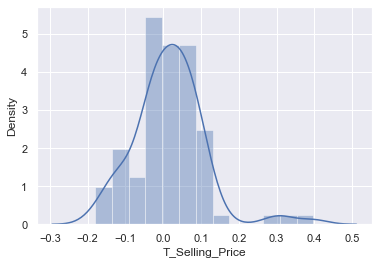

In [110]:
sns.distplot(y_test-predictions)

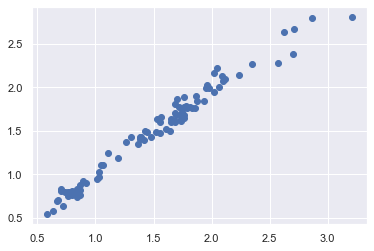

In [111]:
plt.scatter(y_test,predictions)

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.06849587741748414
MSE: 0.00889150584056361
RMSE: 0.09429478161894013


# Using LGBM Regressor

In [90]:
from lightgbm import LGBMRegressor

In [91]:
lb=LGBMRegressor()  

In [92]:
lb.fit(X_train,y_train)

LGBMRegressor()

In [93]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [94]:
lb = RandomizedSearchCV(estimator = lb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [95]:
lb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[Ligh

[CV] END gamma=0.28164410892276964, learning_rate=0.14562495076197482, max_depth=3, n_estimators=101, subsample=0.8736932106048627; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873; total time=   0.0s
[LightGBM] [Warning] Unknown parameter: gamma
[CV] END gamma=

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=1,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020BD01A2640>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020BD017DD90>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020BD0208D60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020BD9AAE730>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020BD017DCD0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [96]:
lb.best_params_

{'gamma': 0.28164410892276964,
 'learning_rate': 0.14562495076197482,
 'max_depth': 3,
 'n_estimators': 101,
 'subsample': 0.8736932106048627}

In [97]:
lb.best_score_

-0.022720820828833557

In [98]:
predictions=lb.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='T_Selling_Price', ylabel='Density'>

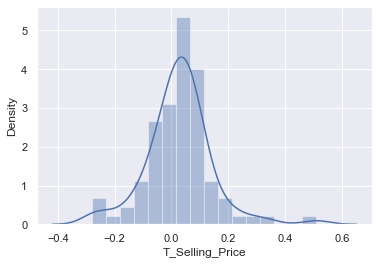

In [99]:
sns.distplot(y_test-predictions)

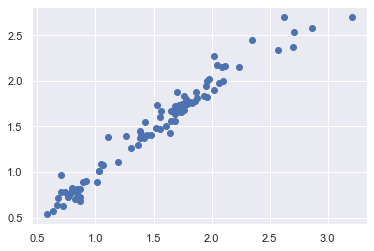

In [100]:
plt.scatter(y_test,predictions)

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.08407473270736317
MSE: 0.013995442122183812
RMSE: 0.11830233354496357


In [115]:
value = cb_model.predict([0.284040,0.308863,0,0.266667,0,1,1])
value

1.556011686185539

In [119]:
cb_model.save_model('BasePriceModel')

### Results
<b> After scalling and tranformation of data <b>

In [ ]:
#####   Random Forest    #####
# MAE:  0.08420470831169619
# MSE:  0.017779223812429037
# RMSE: 0.1333387558530116

#####   XGBoost         #####
# MAE:  0.07987864894797056
# MSE:  0.013162324795882158
# RMSE: 0.11472717548986447

#####   Catboost        #####
# MAE:  0.07303229015609736
# MSE:  0.010622017658703745
# RMSE: 0.10306317314493933

######  LGBM           #####
# MAE:  0.0828317085788424
# MSE:  0.013181132848173668
# RMSE: 0.11480911483054675

<b> After selective drop of columns after one hot</b>

In [ ]:
#####   Random Forest    #####
# MAE: 0.08104483052347815
# MSE: 0.016202605850670477
# RMSE: 0.1272894569501751

#####   XGBoost         #####
# MAE: 0.07948923662324435
# MSE: 0.013268711910252147
# RMSE: 0.11518989500061257

#####   Catboost        #####
# MAE: 0.07741818711447432
# MSE: 0.012976164273099668
# RMSE: 0.11391296797599326

######  LGBM           #####
# MAE: 0.08159115937028237
# MSE: 0.013150235807573024
# RMSE: 0.11467447757706604

<b> After Removing seller Type<b>

In [ ]:
#####   Random Forest    #####
# MAE:  0.08652003172463243
# MSE:  0.018783091202041247
# RMSE: 0.13705141809569593

#####   XGBoost         #####
# MAE:  0.07996345233088357
# MSE:  0.013534961925223967
# RMSE: 0.1163398552742093

#####   Catboost        #####
# MAE:  0.06849587741748414
# MSE:  0.00889150584056361
# RMSE: 0.09429478161894013

######  LGBM           #####
# MAE:  0.08407473270736317
# MSE:  0.013995442122183812
# RMSE: 0.11830233354496357